In [9]:

from upstox_api.api import *
s = Session ('FNArdow6vk6lkS3okZhER4bbzpH9kt3POMlZF4Dd')
s.set_redirect_uri ('http://127.0.0.1:3000')
s.set_api_secret ('xo2kk27pnj')
print (s.get_login_url())


https://api.upstox.com/index/dialog/authorize?apiKey=FNArdow6vk6lkS3okZhER4bbzpH9kt3POMlZF4Dd&redirect_uri=http%3A%2F%2F127.0.0.1%3A3000&response_type=code


In [10]:
s.set_code ('324594934ee37ce5c62b2d2ef62434d7035bb79e')


In [11]:
access_token = s.retrieve_access_token()
print ('Received access_token: %s' % access_token)



Received access_token: 194cdabe5d0f1c9fc1f1a2d5e6566bcfbaadfbce


In [12]:
u = Upstox ('FNArdow6vk6lkS3okZhER4bbzpH9kt3POMlZF4Dd', access_token)



In [13]:
u.get_master_contract('NSE_EQ') # get contracts for NSE EQ



OrderedDict([(16921,
              Instrument(exchange='NSE_EQ', token=16921, parent_token=None, symbol='20microns', name='20 MICRONS LTD', closing_price=54.1, expiry=None, strike_price=None, tick_size=5.0, lot_size=1, instrument_type='EQUITY', isin='INE144J01027')),
             (11774,
              Instrument(exchange='NSE_EQ', token=11774, parent_token=None, symbol='3iinfotech', name='3I INFOTECH LTD.', closing_price=3.85, expiry=None, strike_price=None, tick_size=5.0, lot_size=1, instrument_type='EQUITY', isin='INE748C01020')),
             (474,
              Instrument(exchange='NSE_EQ', token=474, parent_token=None, symbol='3mindia', name='3M INDIA LIMITED', closing_price=15369.0, expiry=None, strike_price=None, tick_size=5.0, lot_size=1, instrument_type='EQUITY', isin='INE470A01017')),
             (445,
              Instrument(exchange='NSE_EQ', token=445, parent_token=None, symbol='5paisa', name='5PAISA CAPITAL LIMITED', closing_price=250.8, expiry=None, strike_price=None, 

In [14]:
record = u.get_ohlc(u.get_instrument_by_symbol('NSE_EQ', 'TITAN'), OHLCInterval.Minute_10, datetime.strptime('01/09/2017', '%d/%m/%Y').date(), datetime.strptime('06/12/2017', '%d/%m/%Y').date())



In [15]:
import csv
import time

In [16]:
outfile = open("TITAN_13_dec.csv","w")
writer = csv.writer(outfile)
fieldnames = ['close', 'cp', 'high', 'low','open', 'timestamp', 'volume']
writer = csv.DictWriter(outfile, fieldnames=fieldnames,delimiter =',')

writer.writeheader()
for x in range(0,(len(record)-1)):
    record[x]["timestamp"]=time.ctime(record[x]["timestamp"]/1000)
    writer.writerow(record[x])
    #writer.writerow("%s,%s,%s,%s,%s,%s,%s"%(record[x]["close"],record[x]["cp"],record[x]["high"],record[x]["low"],record[x]["open"],record[x]["timestamp"],record[x]["volume"]))


In [17]:
import matplotlib.pyplot as plt

In [18]:
type(record[i]['close'])

float

In [19]:
x1 = []
x2 = []

    

In [20]:
for i in range(0,len(record)-1):
    x1.append(record[i]['close'])
    x2.append(i)
    #x1[i]=record[i]['close']
    #x2[i]=i

In [21]:
plt.scatter(x2,x1)

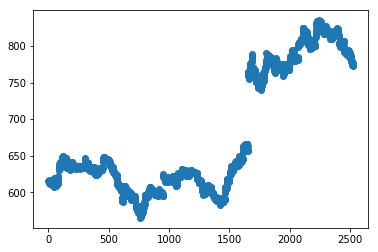

In [22]:
plt.show()

In [24]:
plt.title("Stock Data of Titan Company")

Text(0.5,1,'Stock Data of Titan Company')

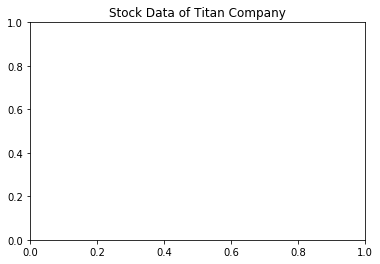

In [25]:
plt.show()


In [26]:
plt.close()

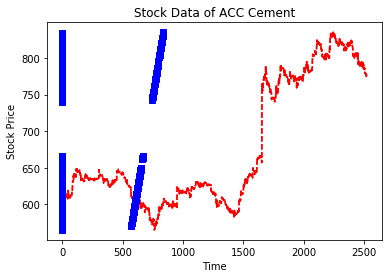

In [86]:
x3 = []
x3.append(0)
for i in range(0,len(record)-1):
    if(i>0 and i<len(record)-2):
        if(record[i]['close']>record[i-1]['close'] and record[i]['close']>record[i+1]['close']):
            x3.append(record[i]['close'])
        else:
            x3.append(0)
x3.append(0)
#plt.scatter(x2,x1,s=5,c='red',marker='^')

plt.plot(x2,x1,'r--',x3,x1,'bs')
#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.title("Stock Data of ACC Cement")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.figure(figsize=(15, 3))

plt.show()

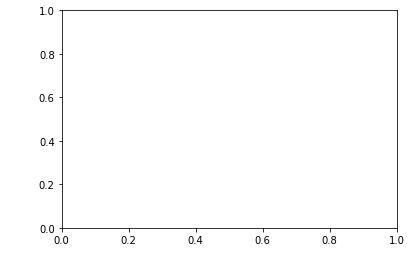

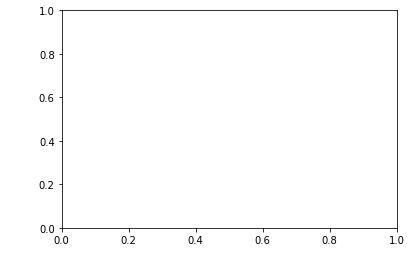

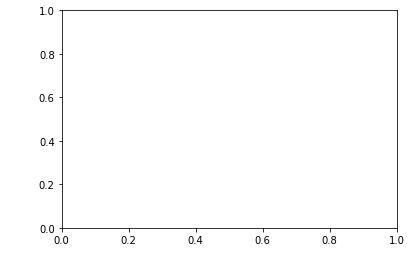

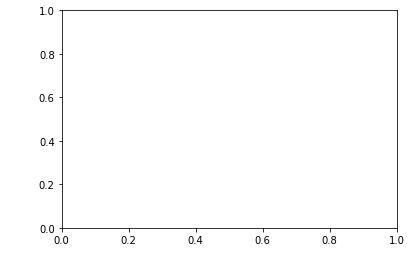

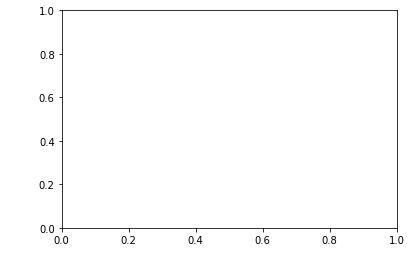

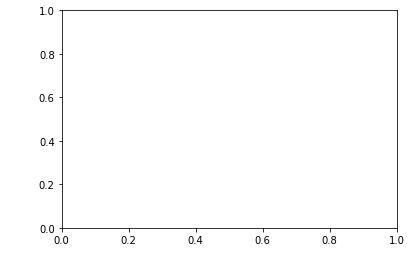

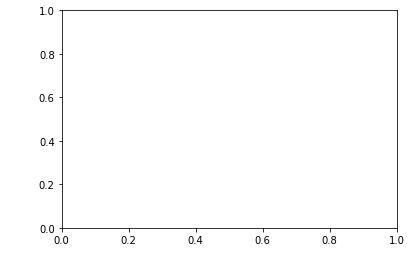

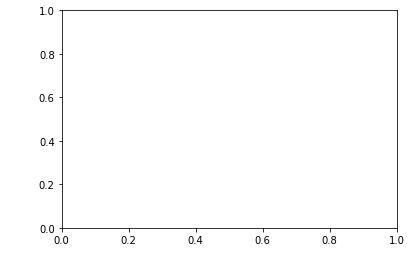

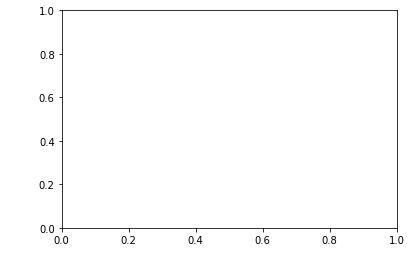

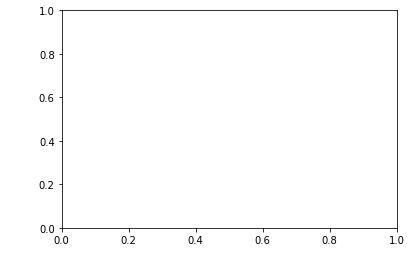

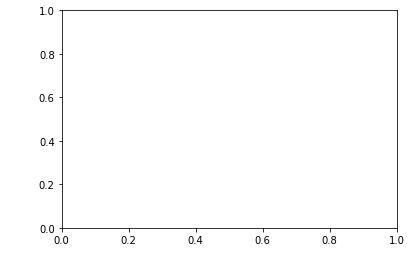

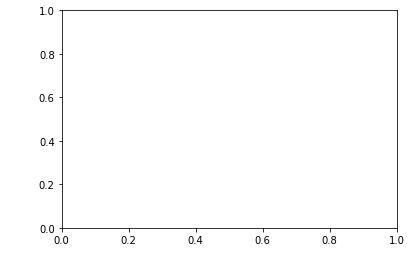

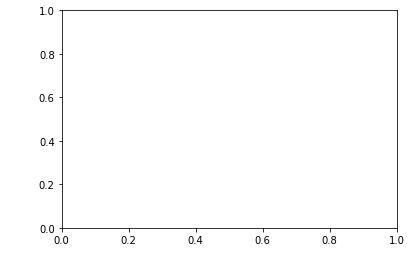

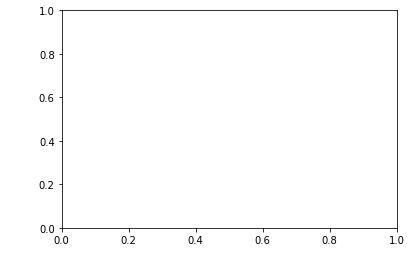

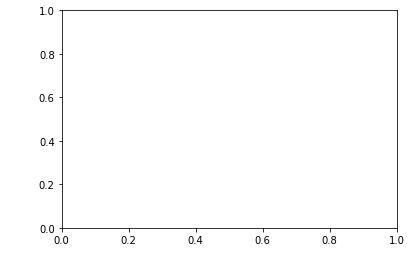

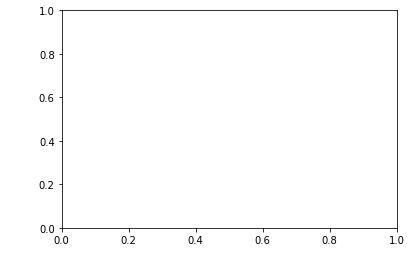

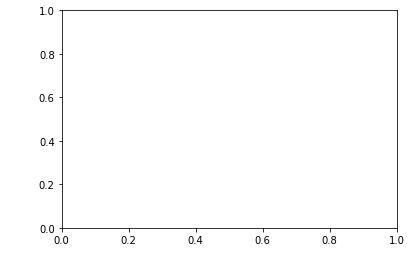

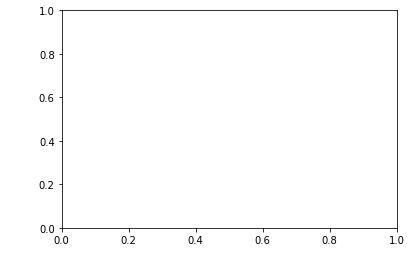

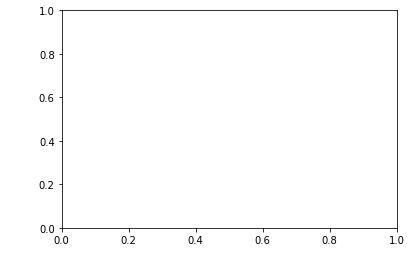

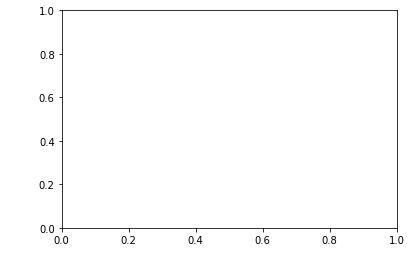

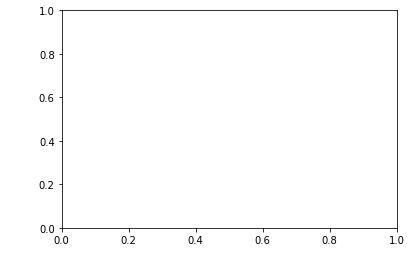

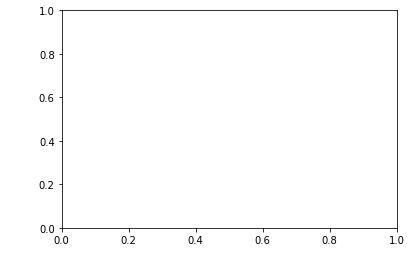

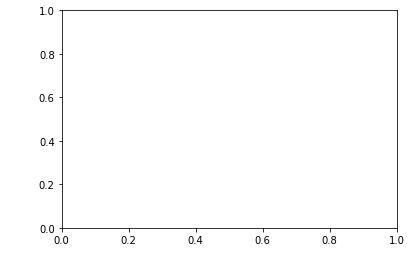

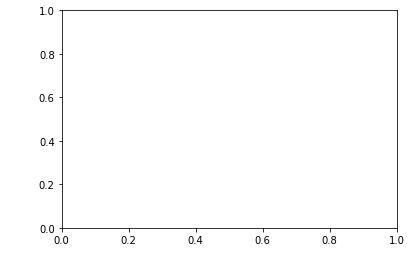

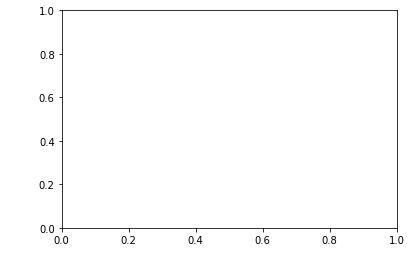

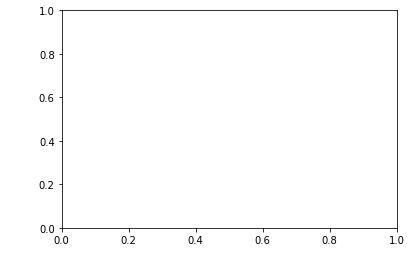

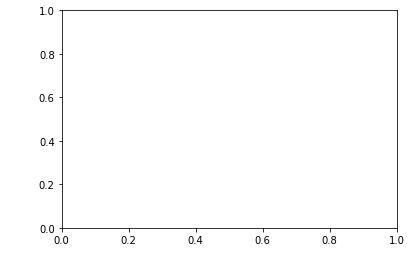

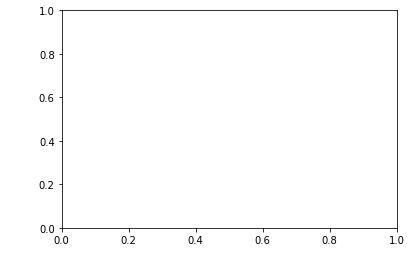

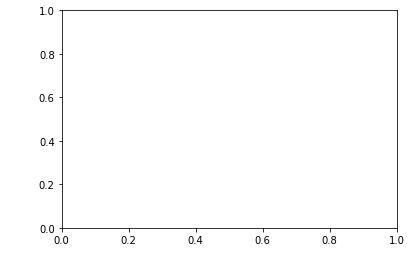

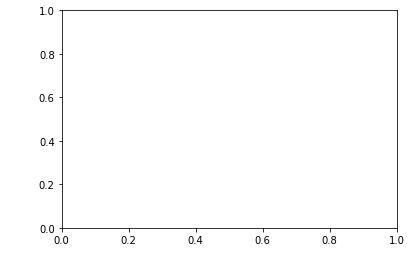

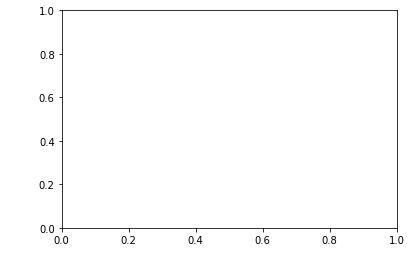

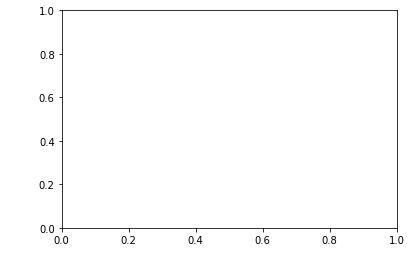

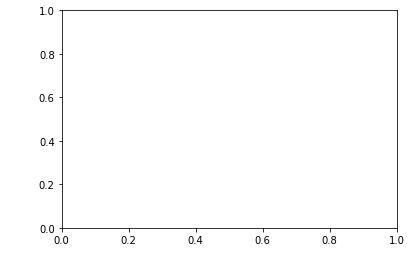

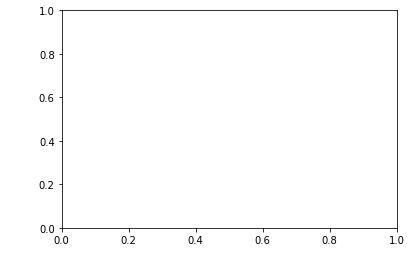

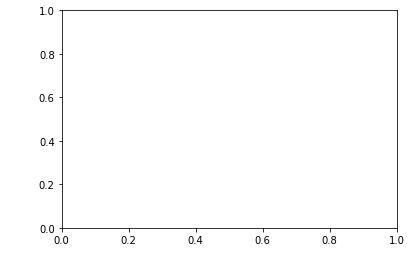

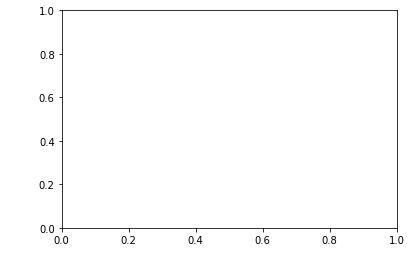

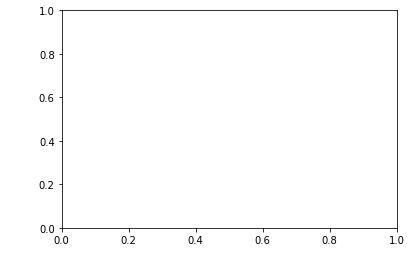

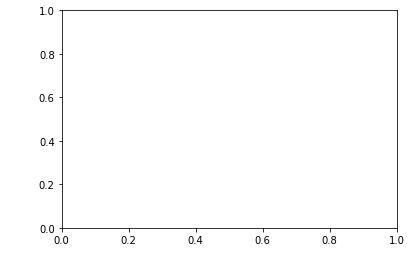

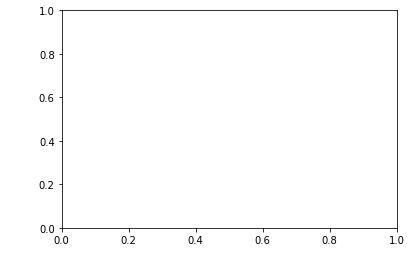

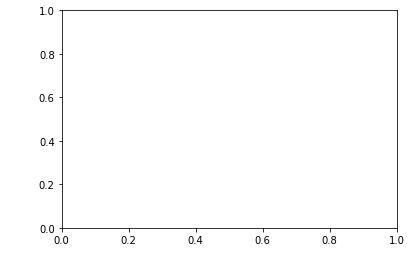

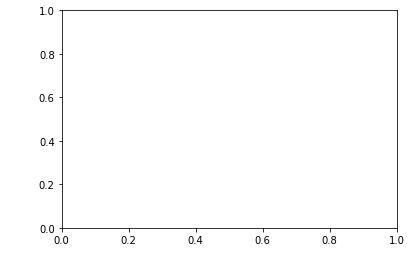

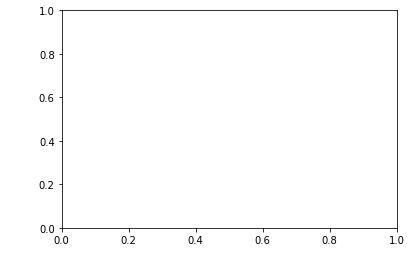

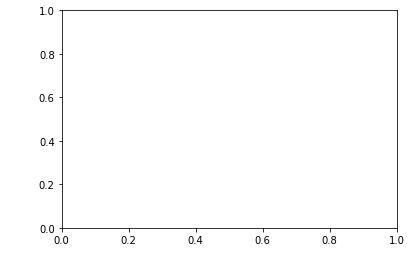

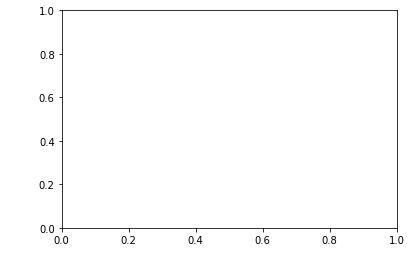

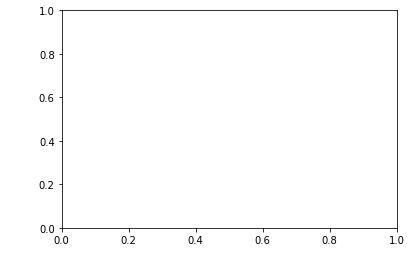

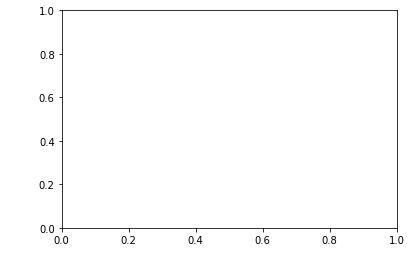

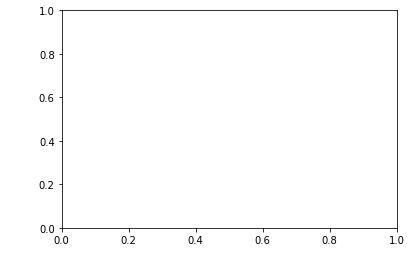

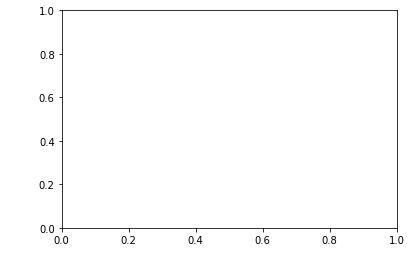

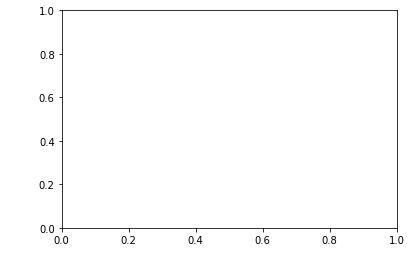

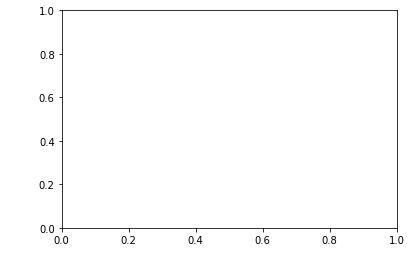

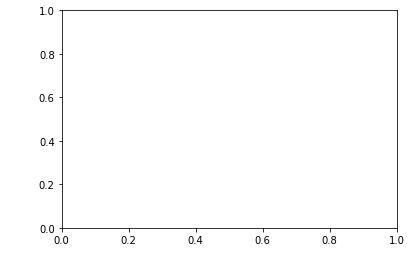

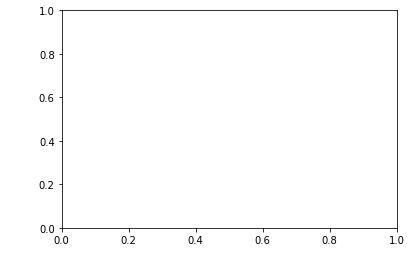

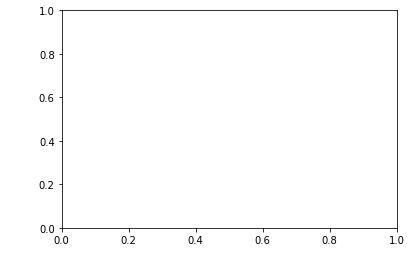

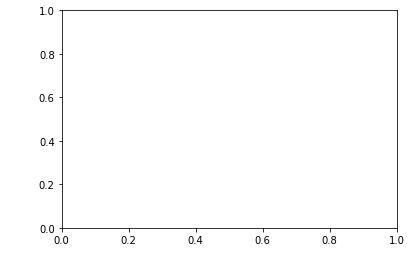

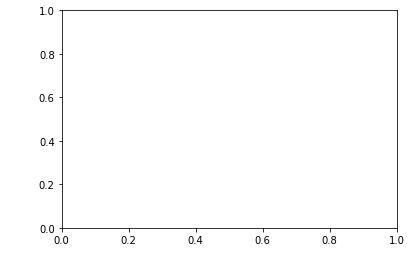

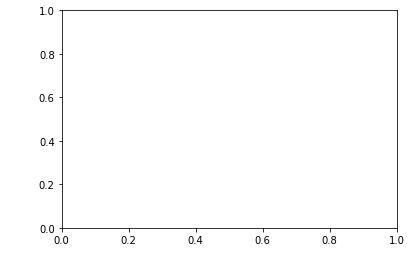

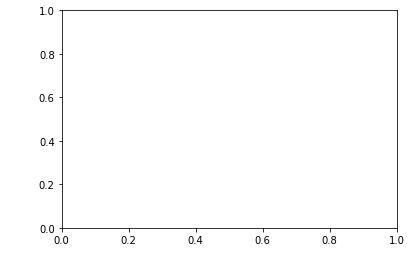

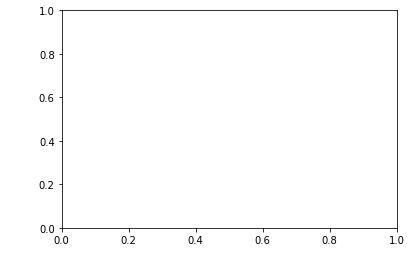

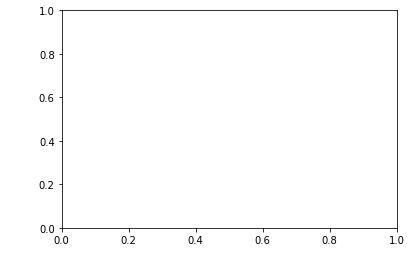

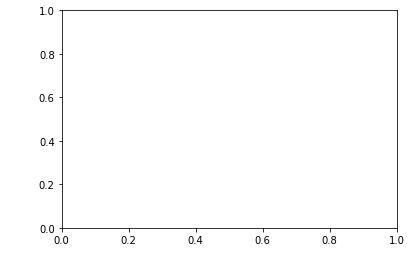

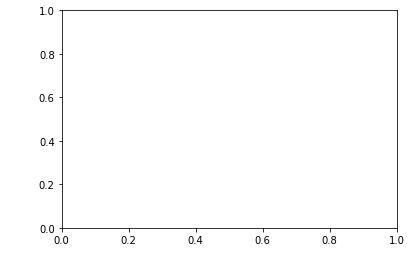

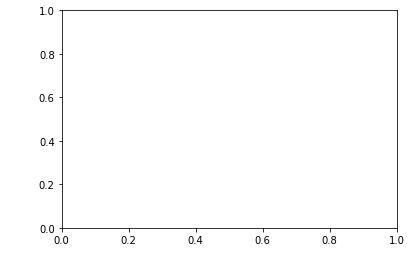

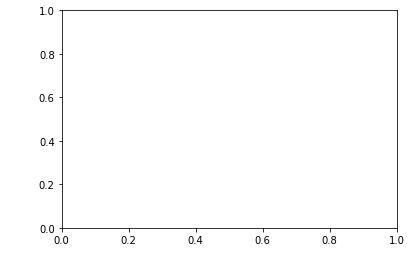

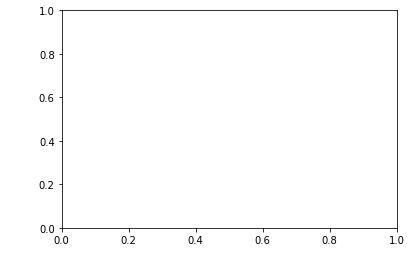

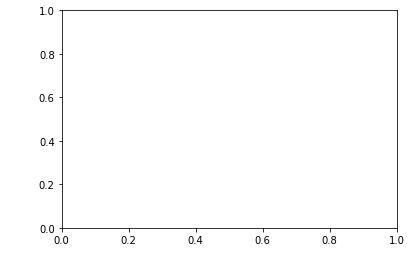

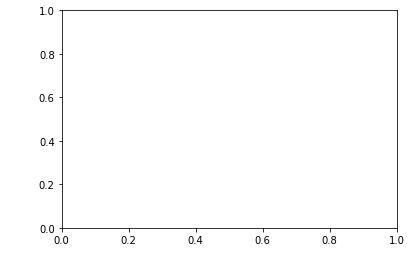

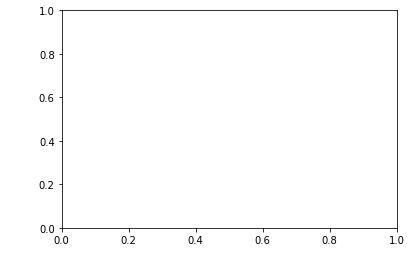

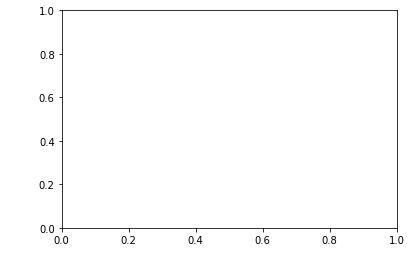

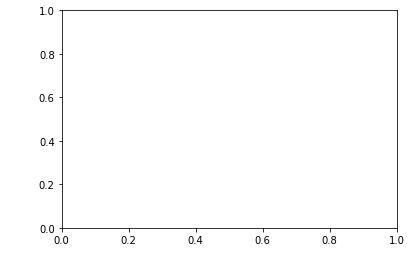

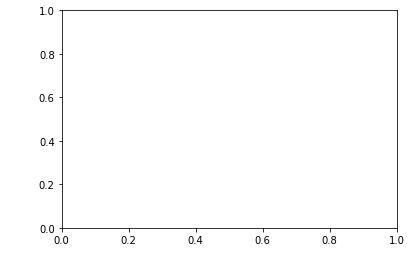

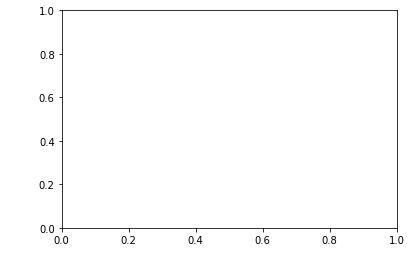

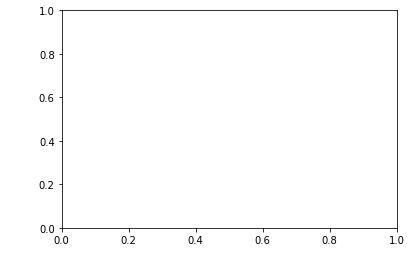

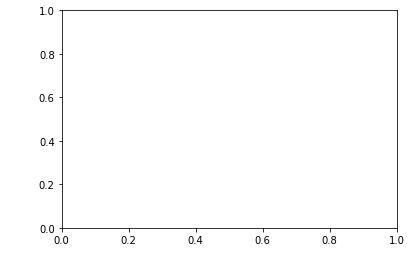

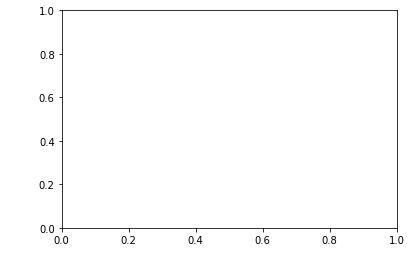

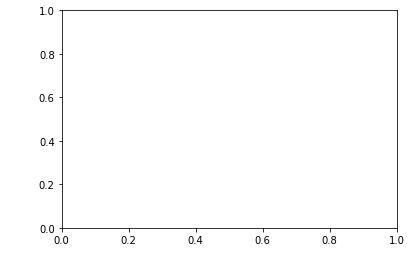

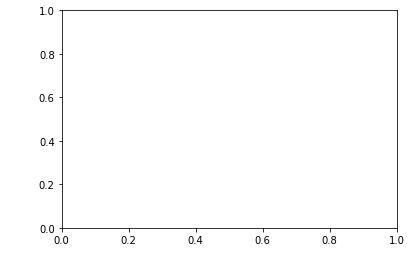

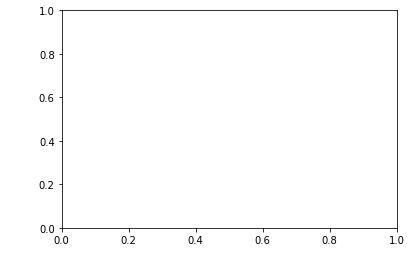

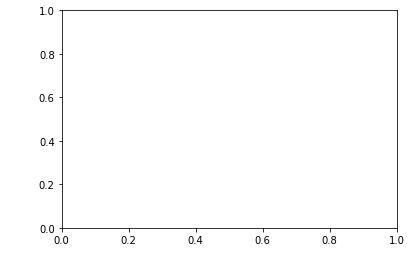

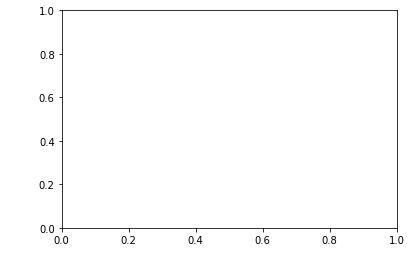

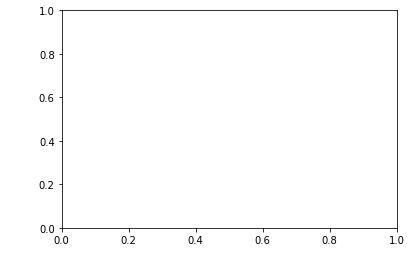

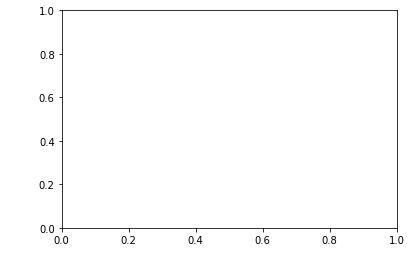

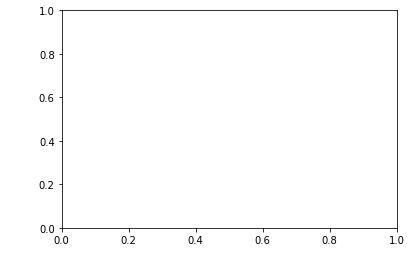

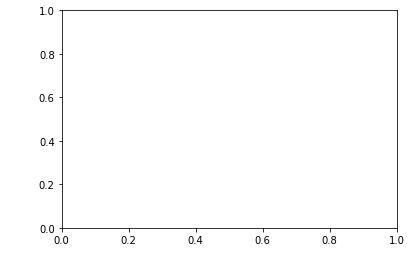

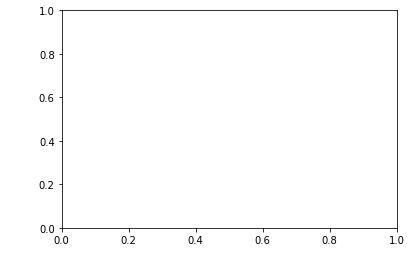

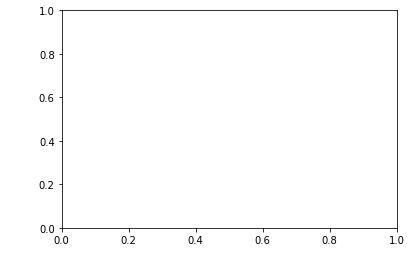

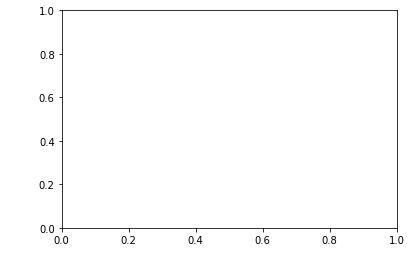

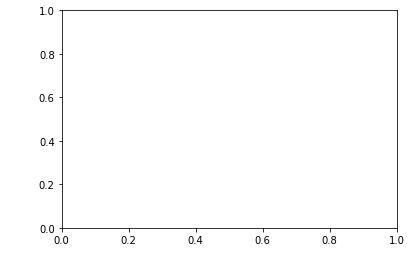

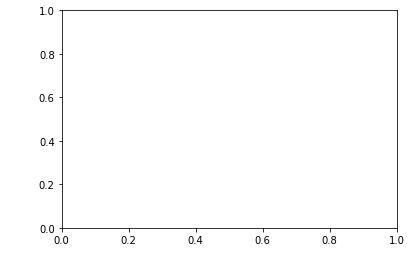

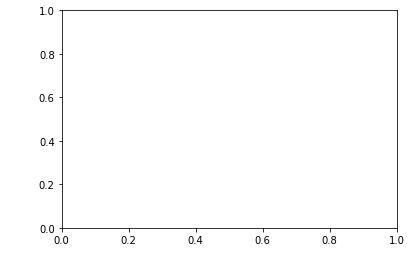

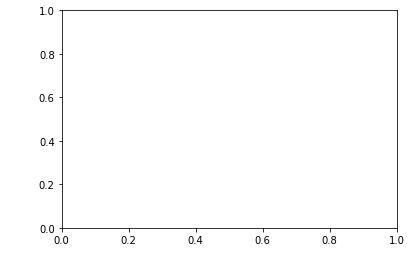

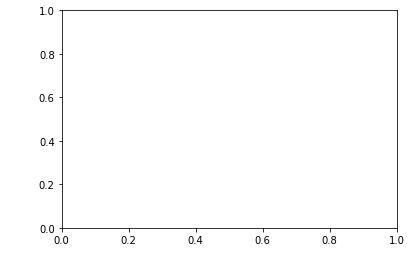

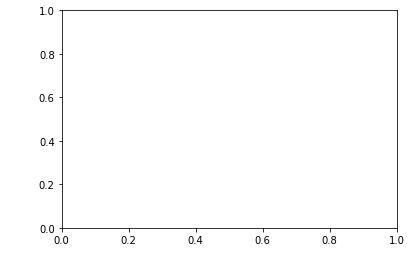

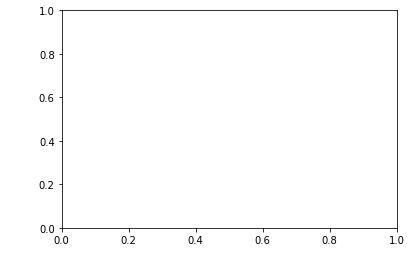

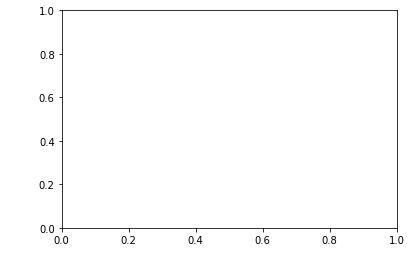

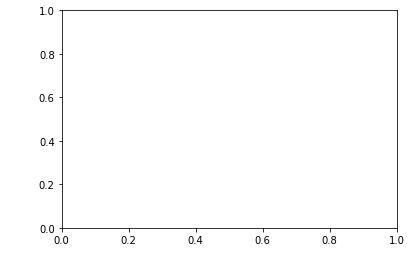

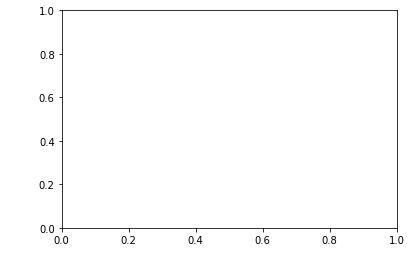

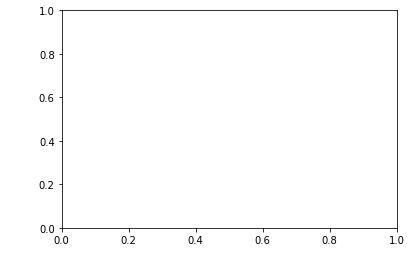

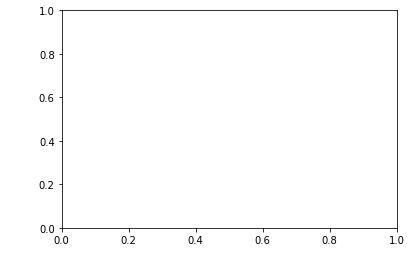

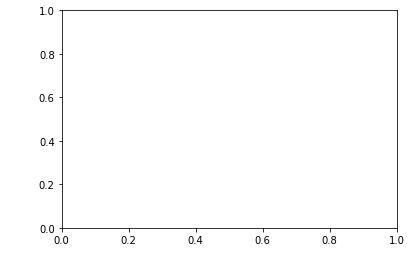

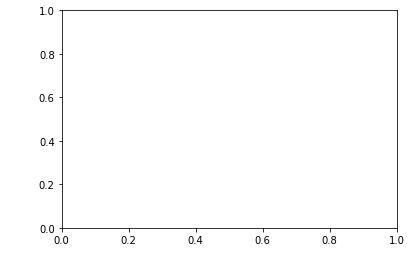

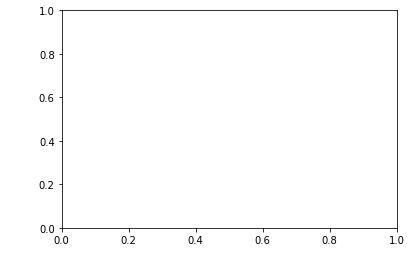

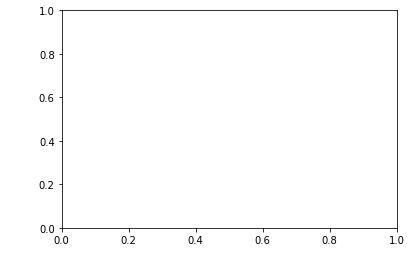

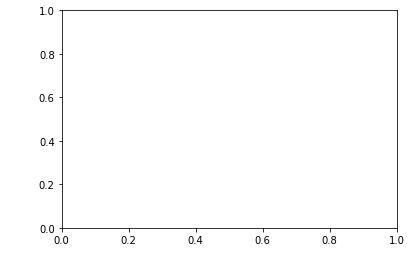

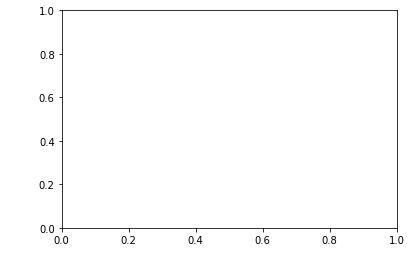

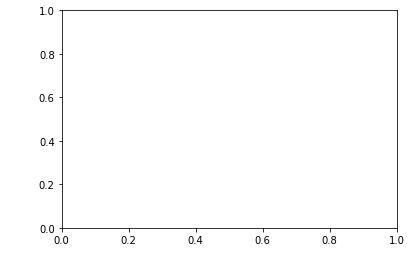

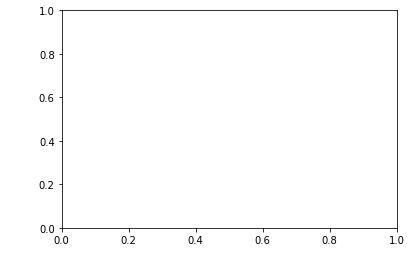

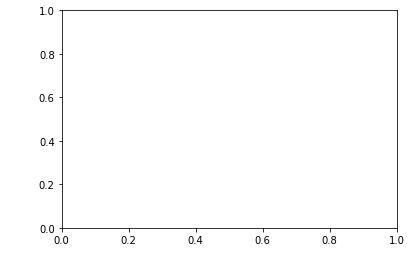

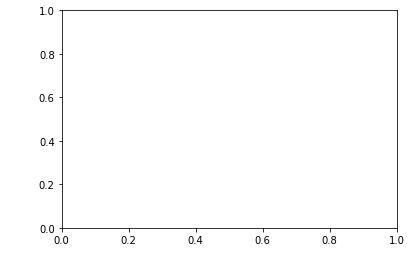

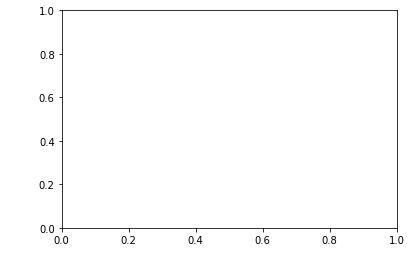

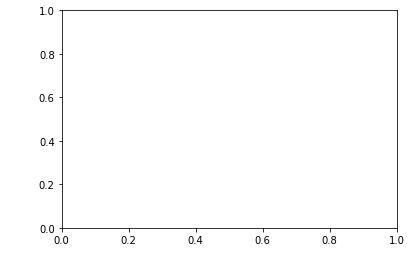

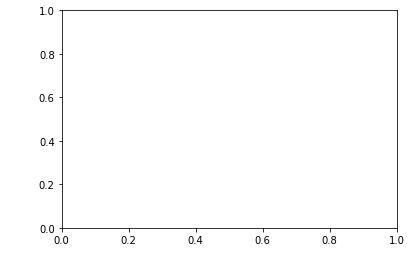

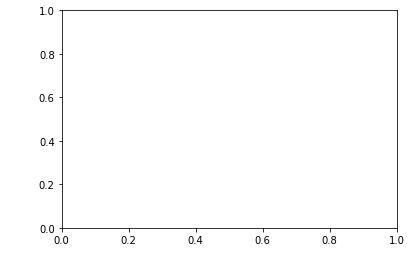

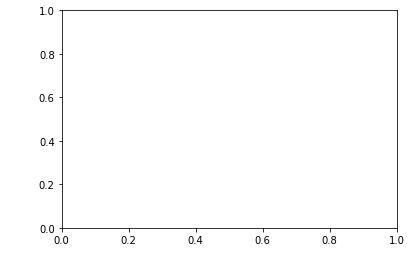

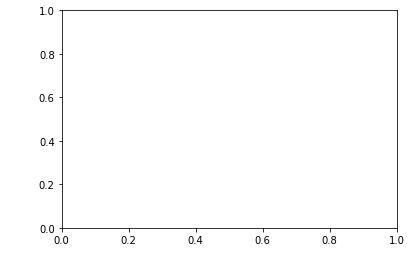

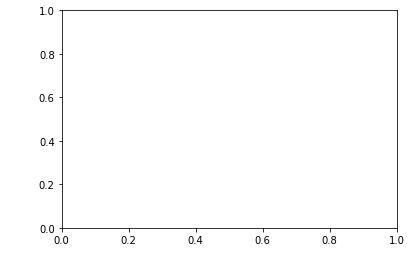

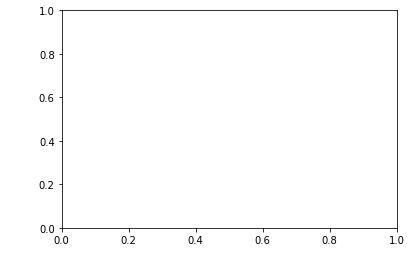

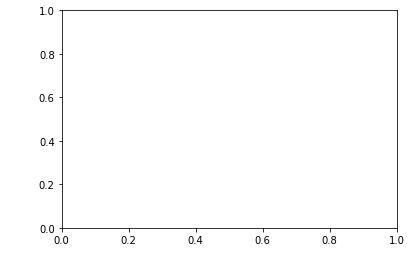

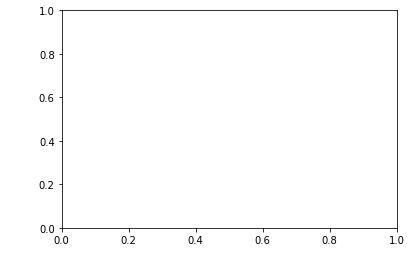

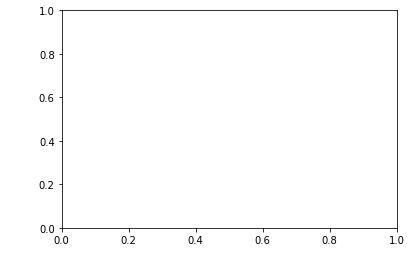

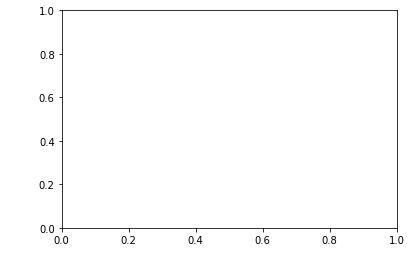

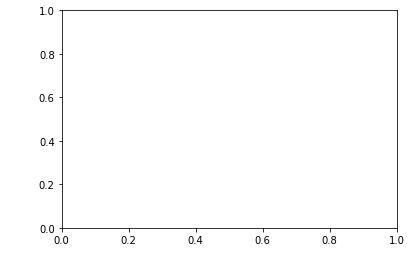

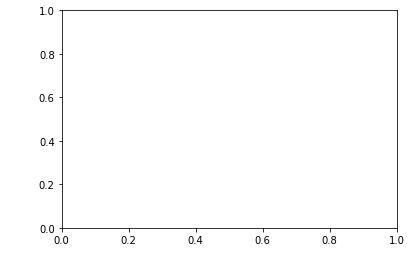

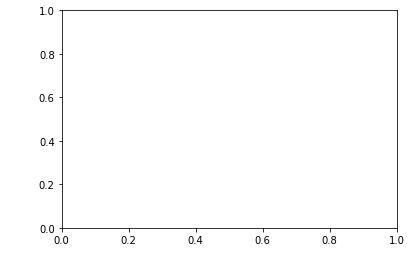

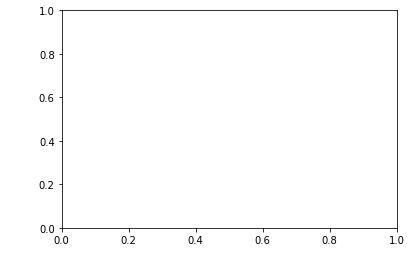

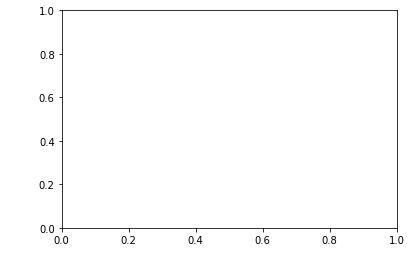

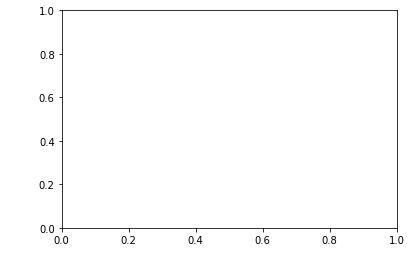

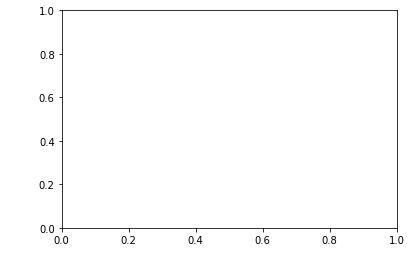

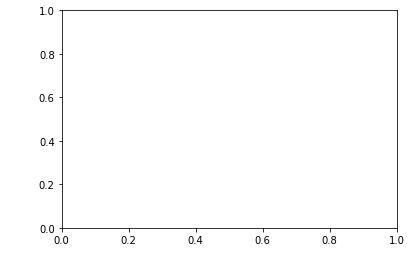

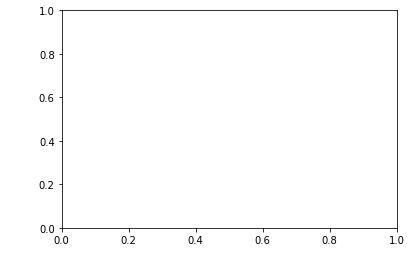

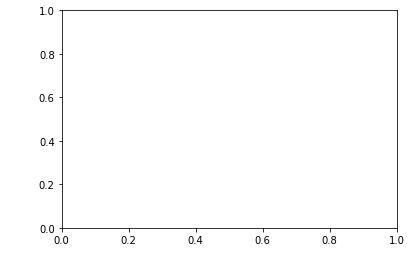

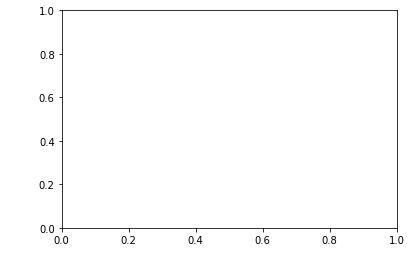

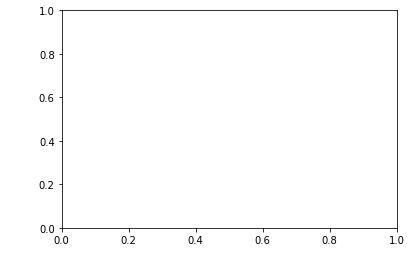

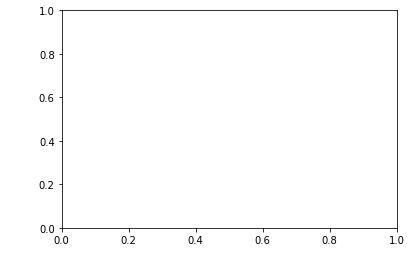

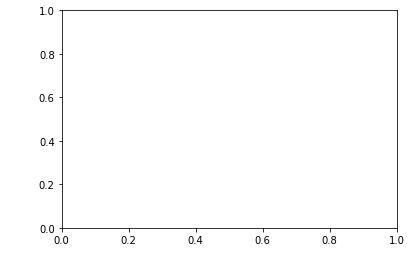

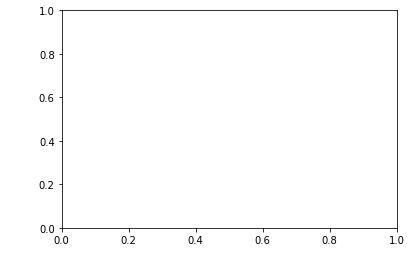

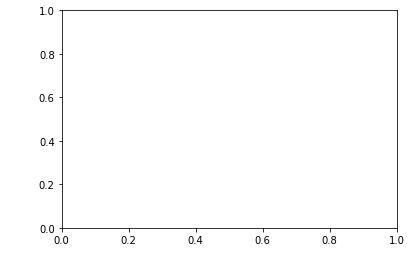

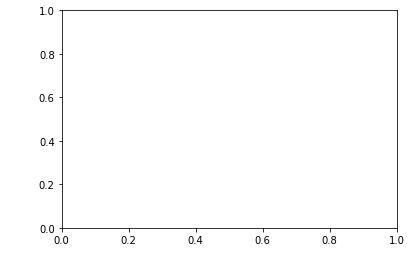

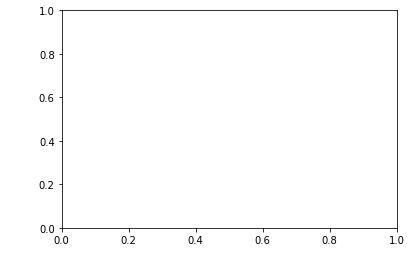

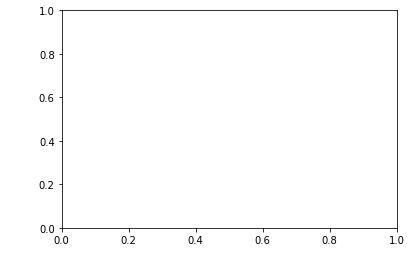

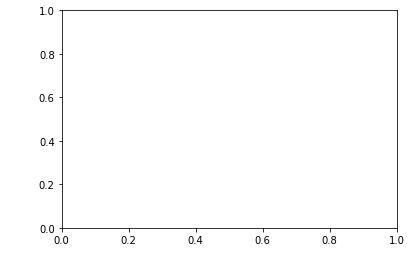

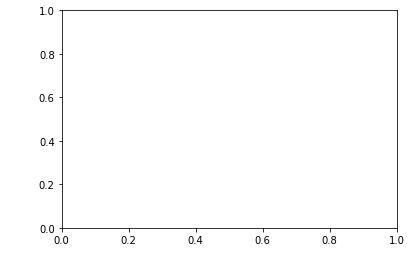

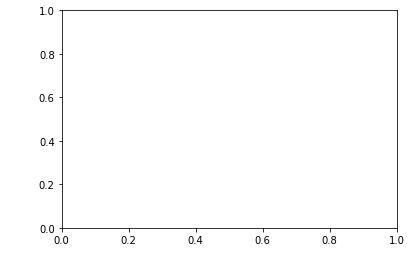

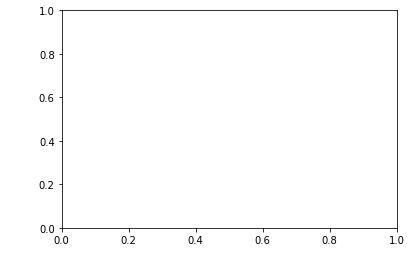

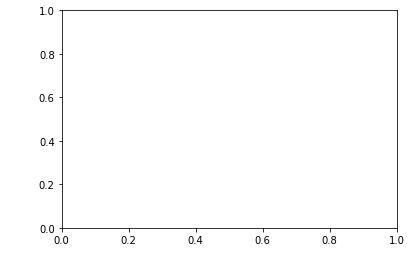

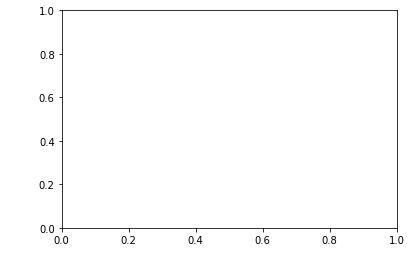

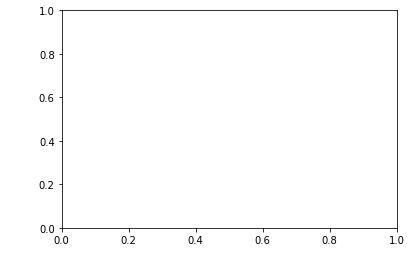

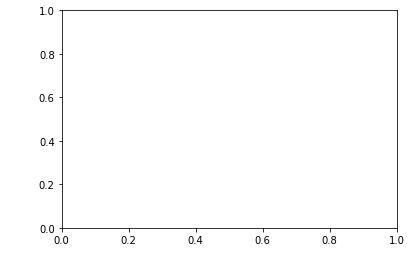

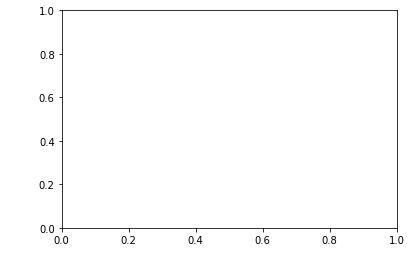

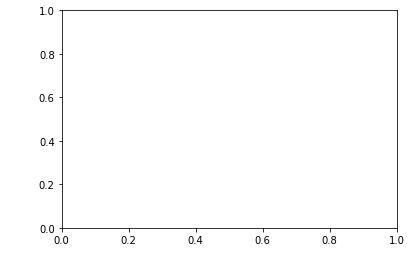

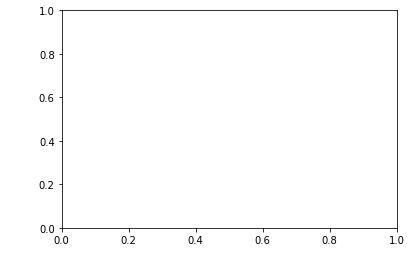

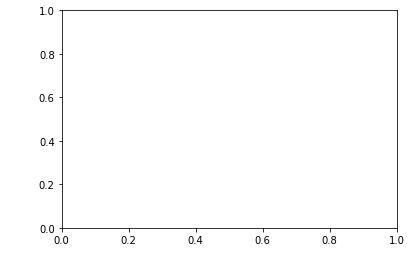

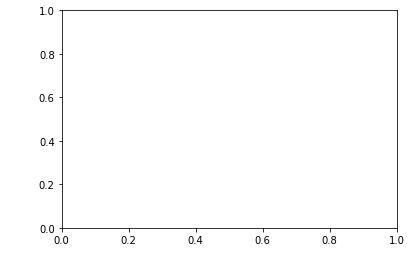

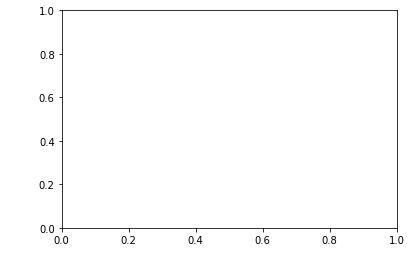

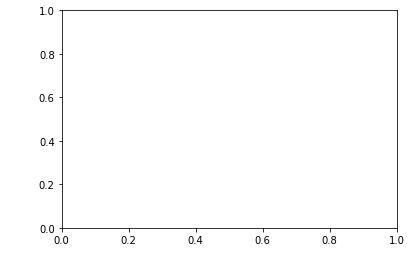

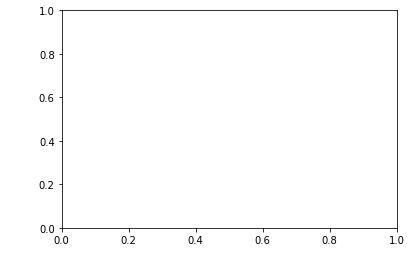

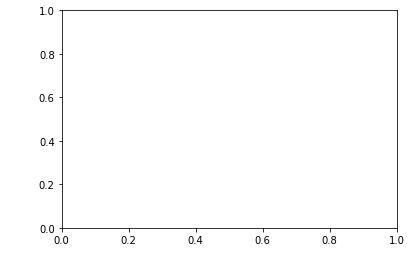

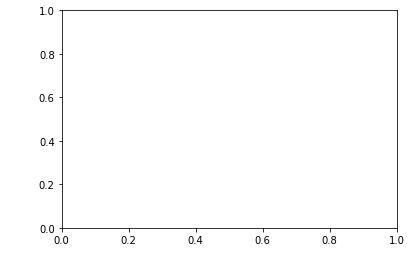

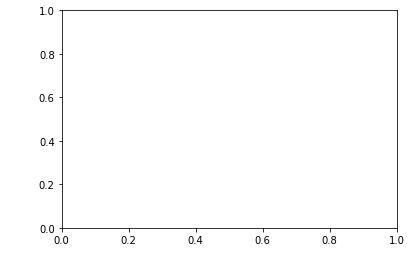

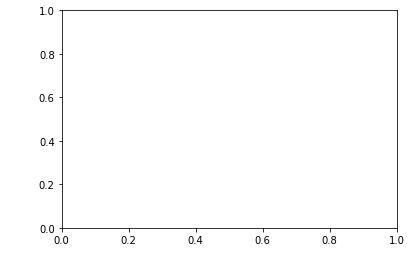

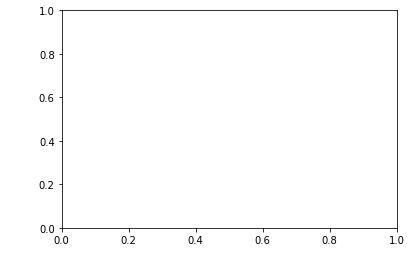

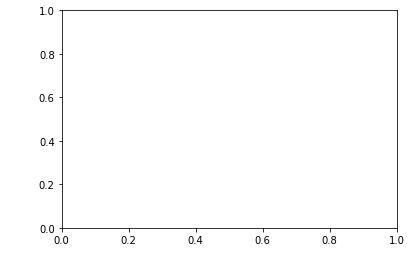

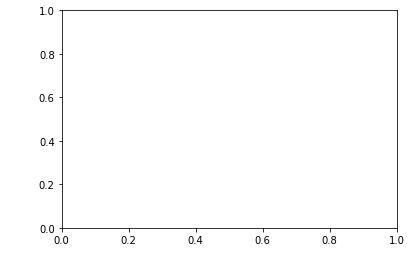

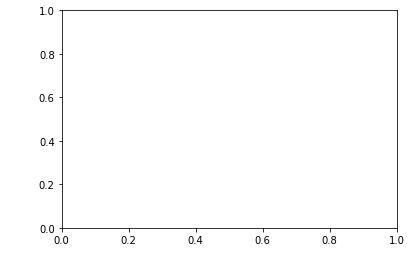

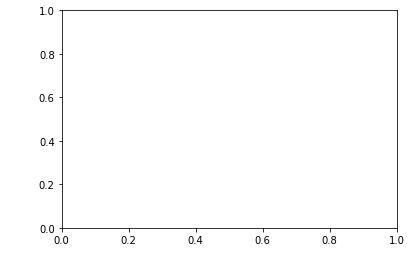

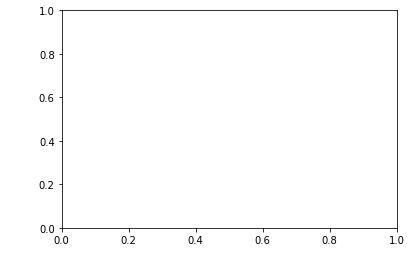

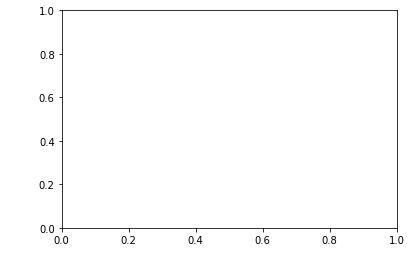

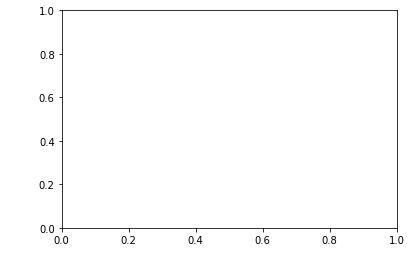

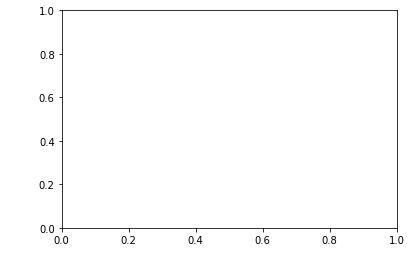

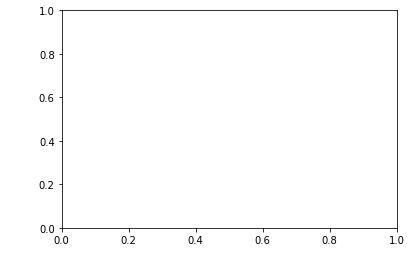

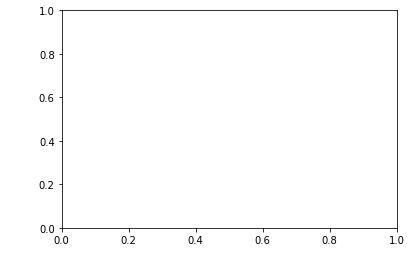

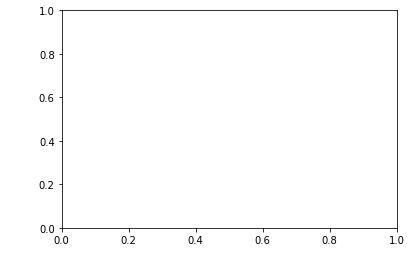

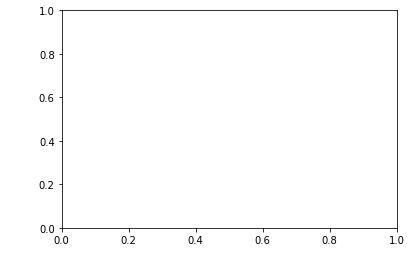

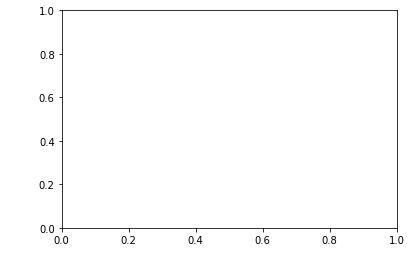

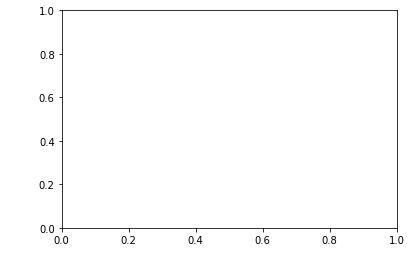

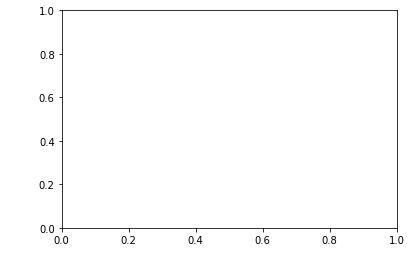

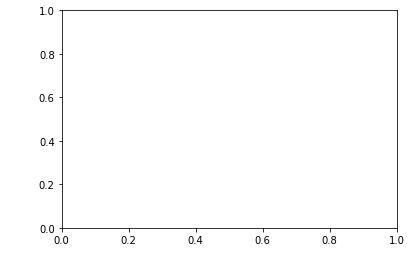

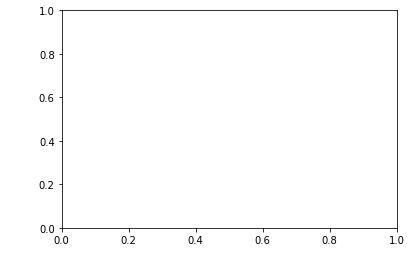

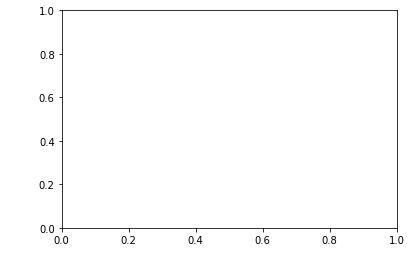

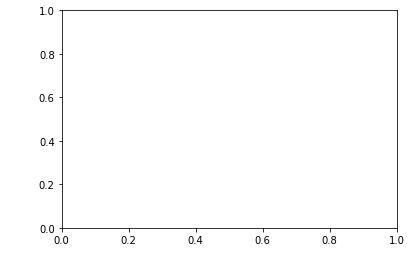

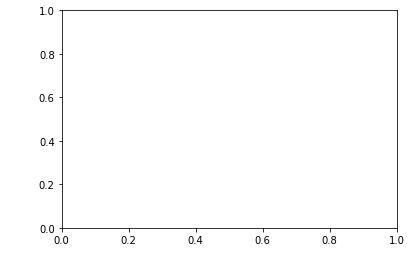

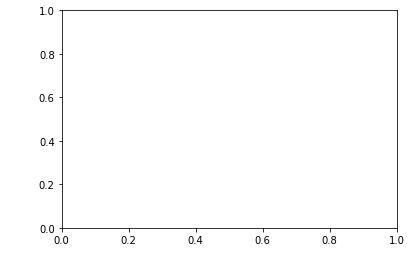

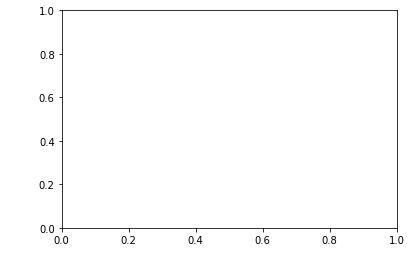

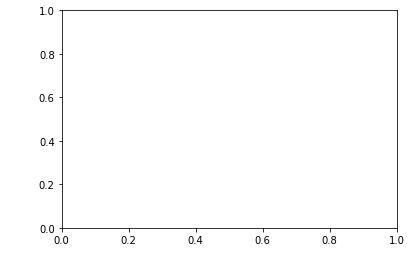

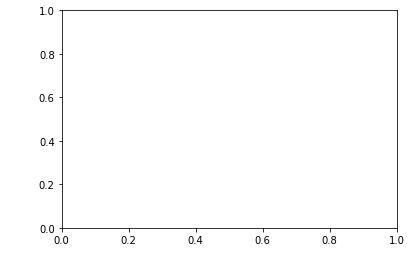

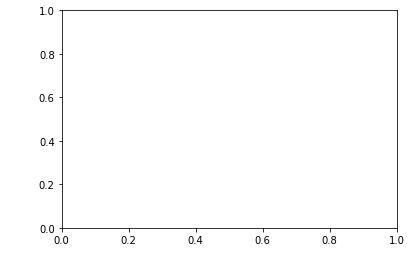

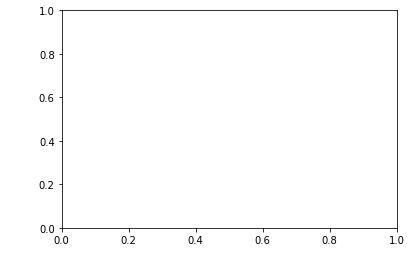

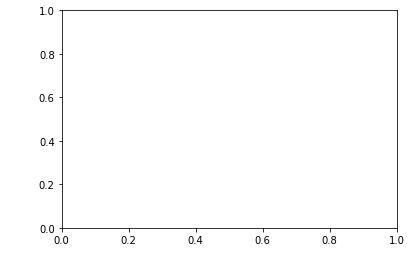

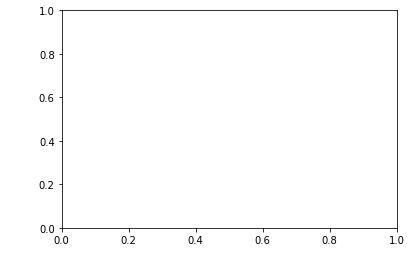

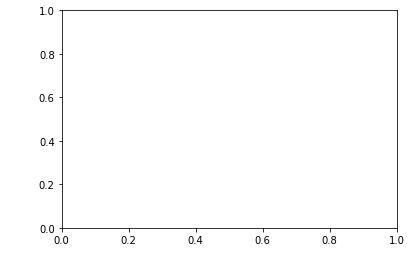

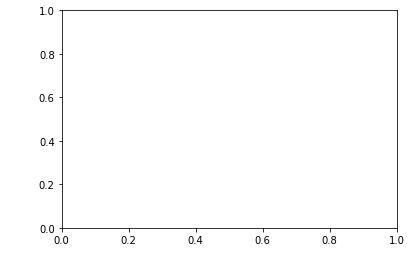

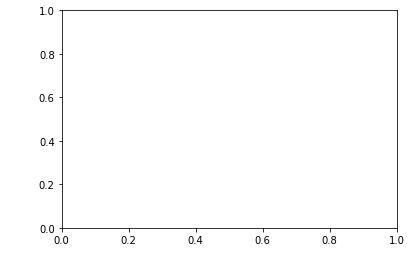

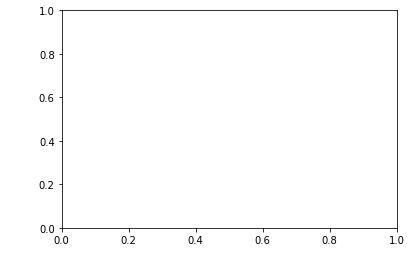

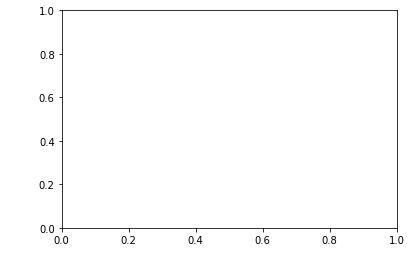

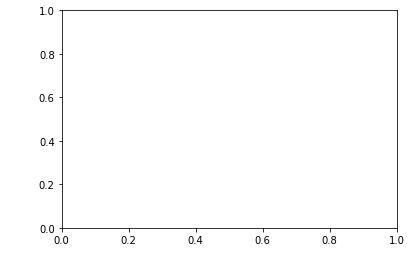

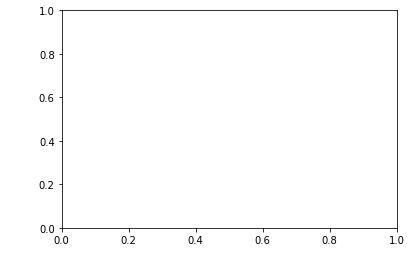

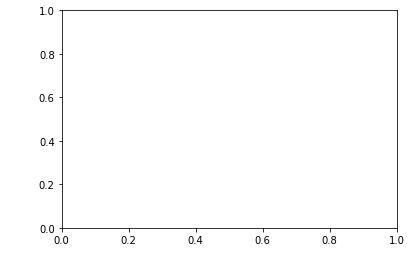

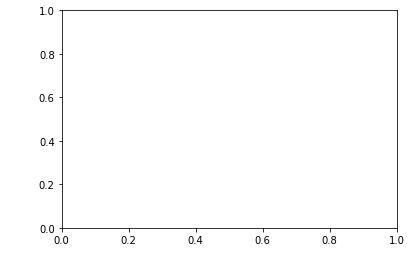

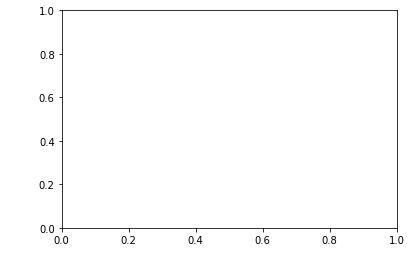

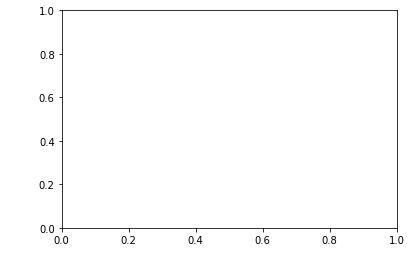

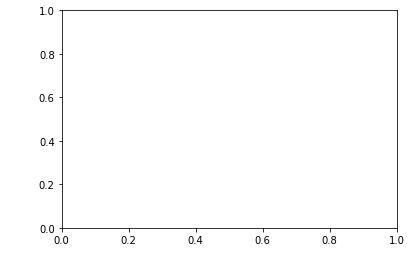

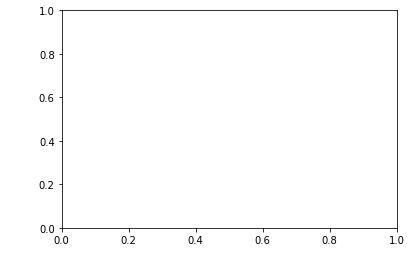

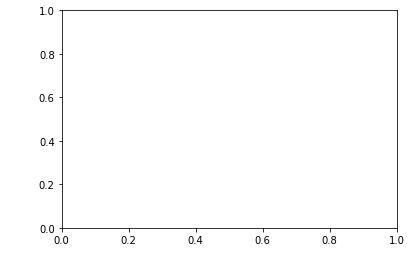

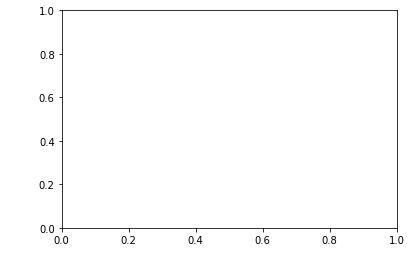

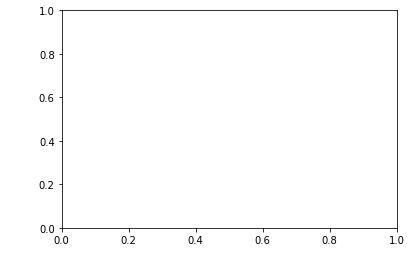

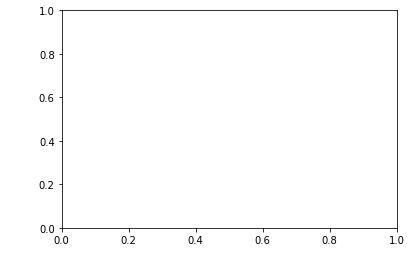

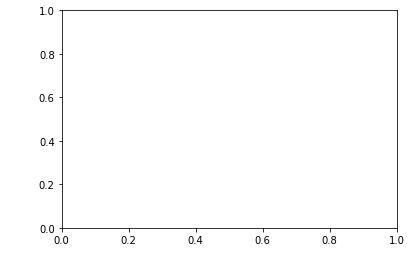

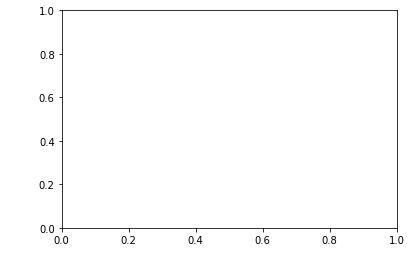

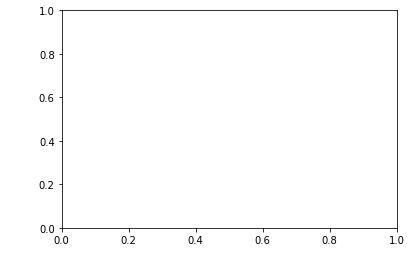

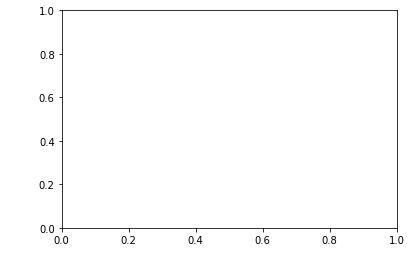

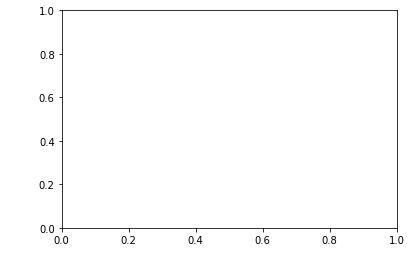

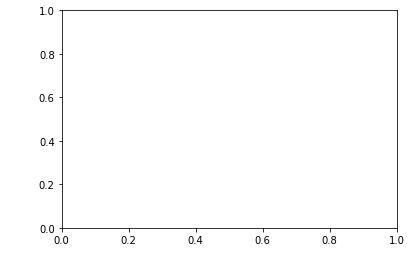

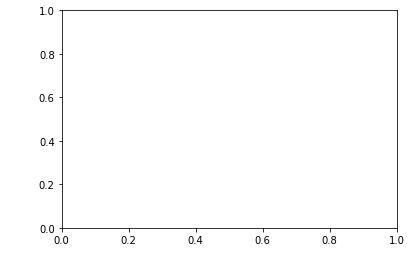

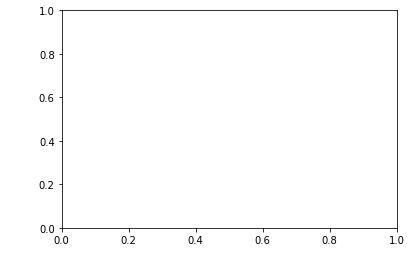

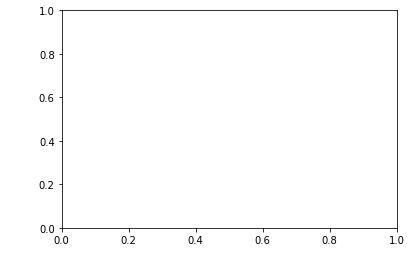

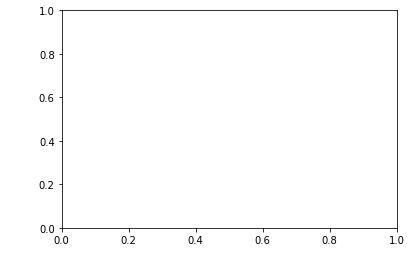

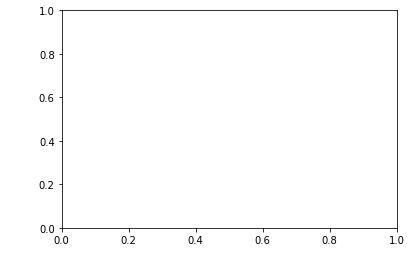

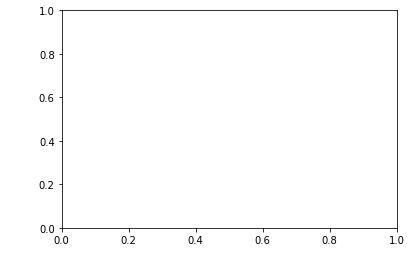

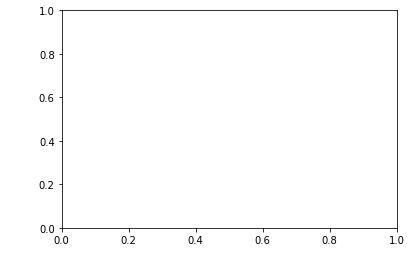

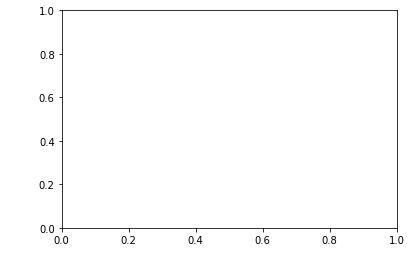

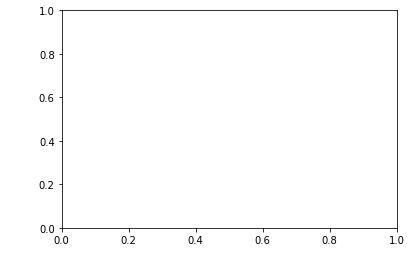

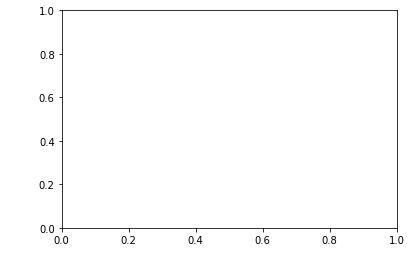

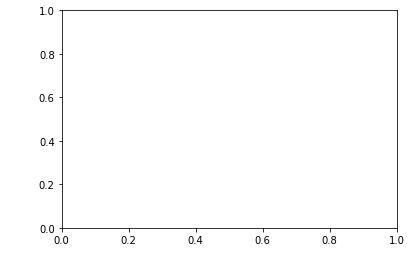

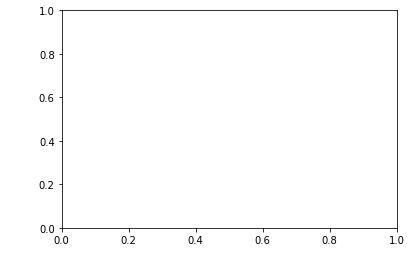

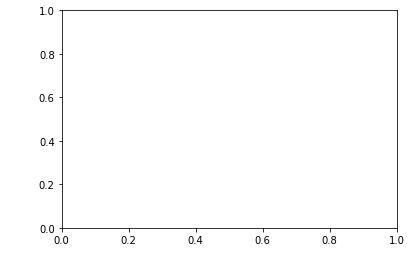

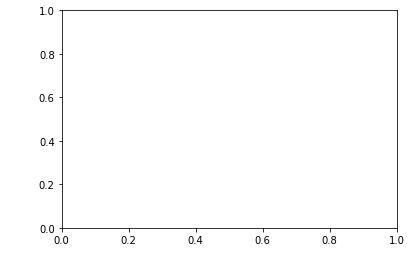

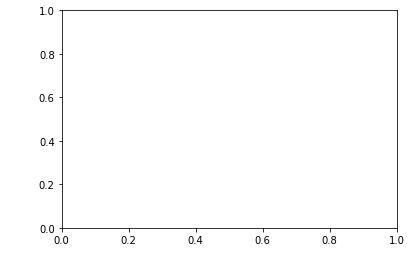

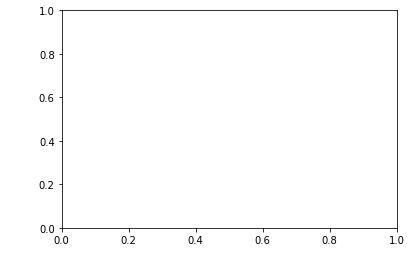

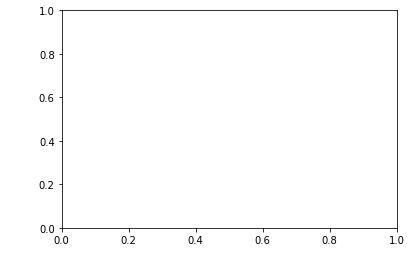

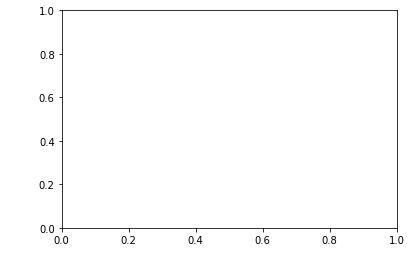

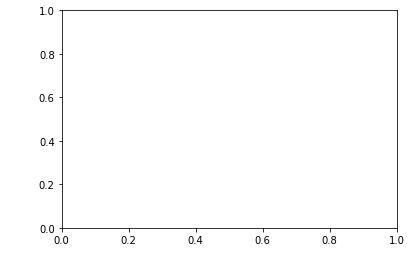

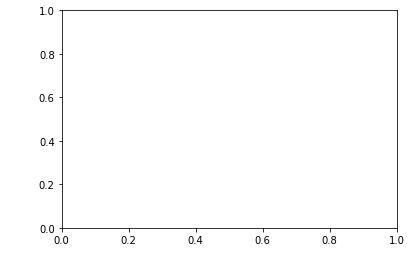

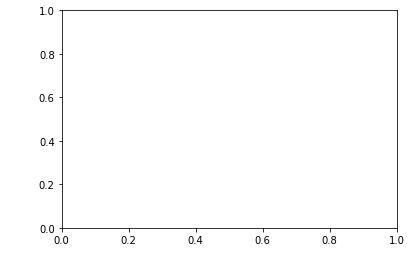

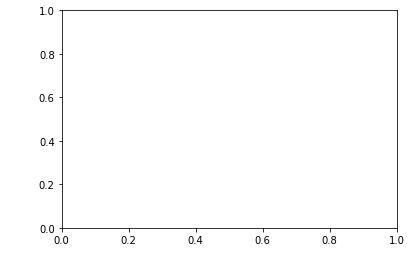

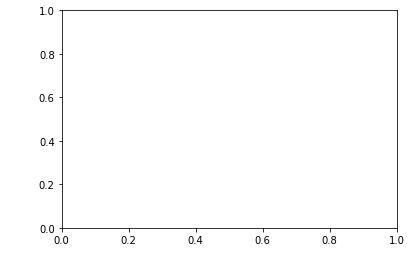

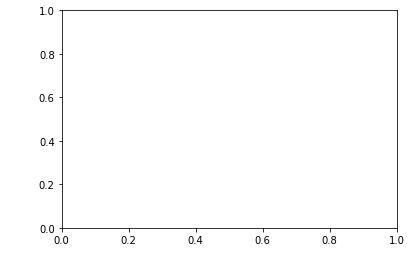

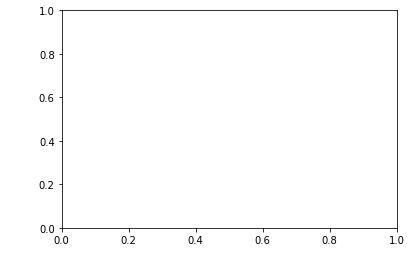

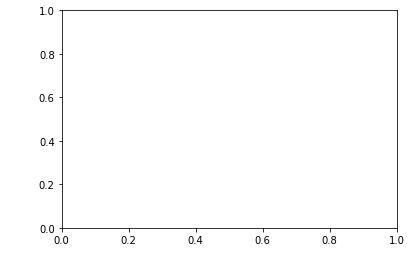

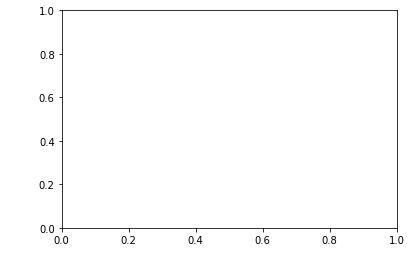

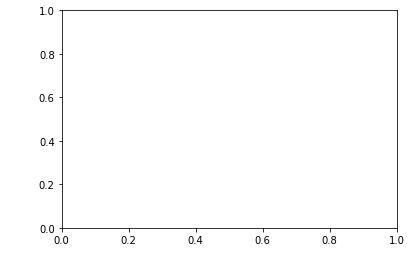

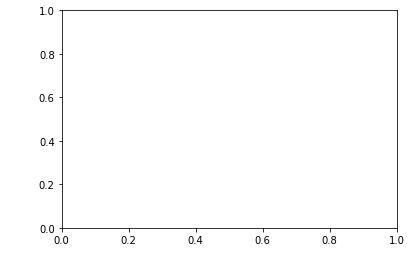

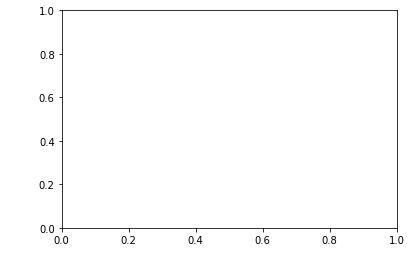

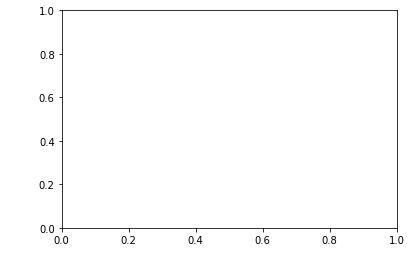

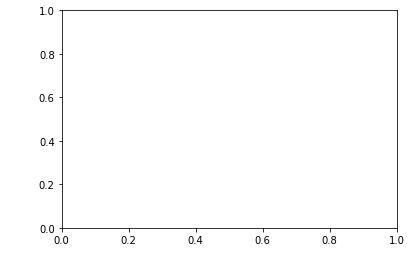

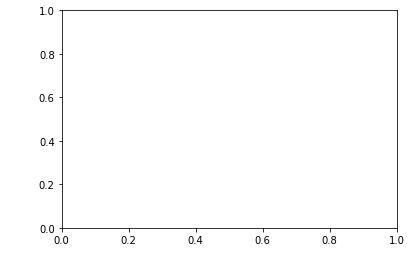

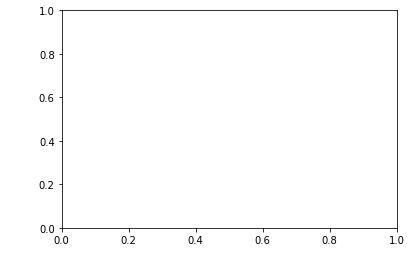

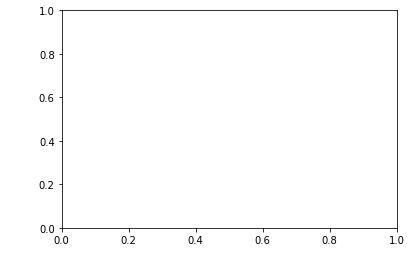

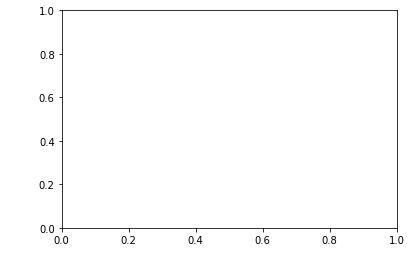

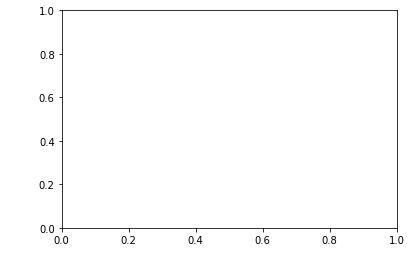

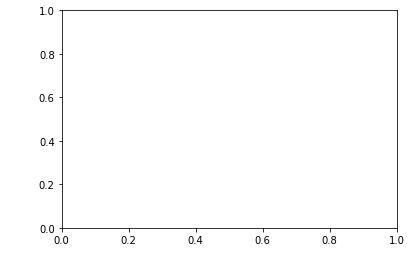

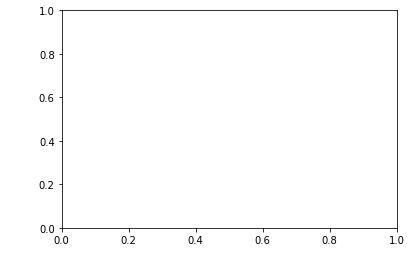

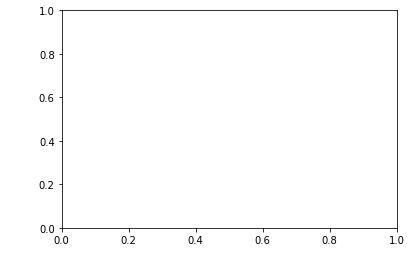

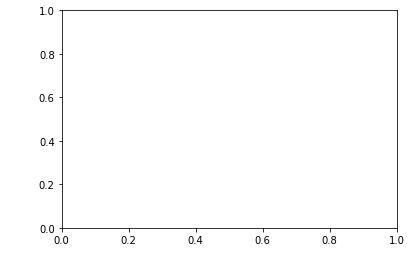

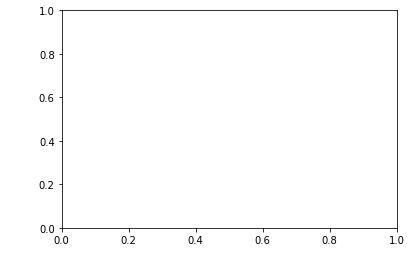

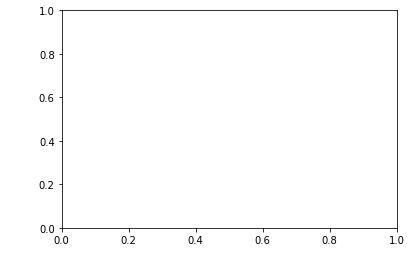

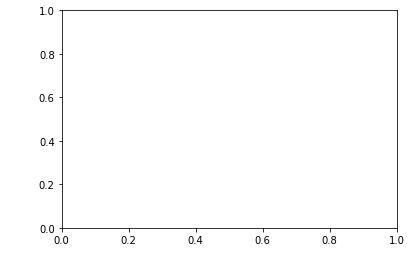

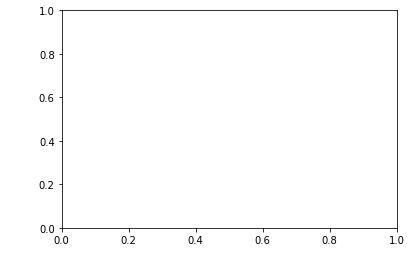

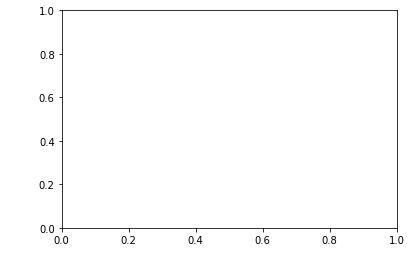

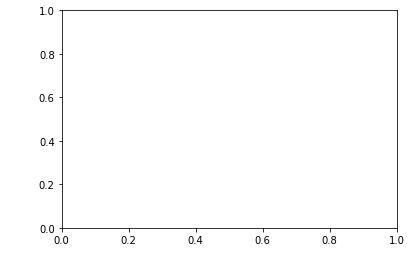

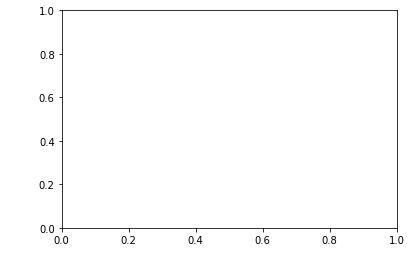

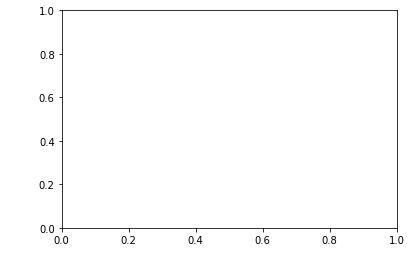

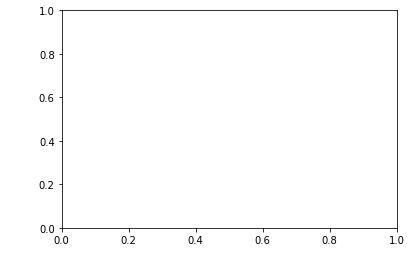

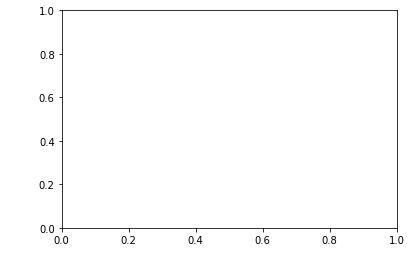

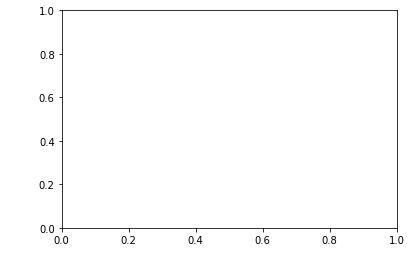

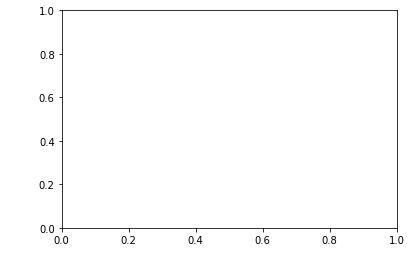

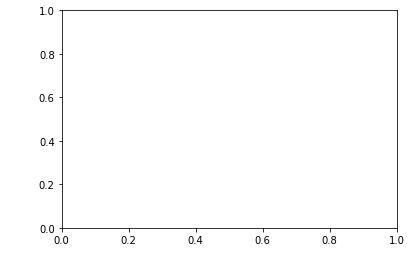

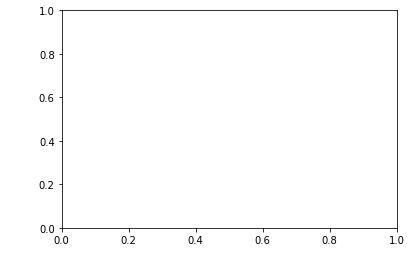

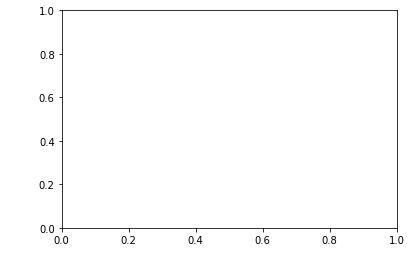

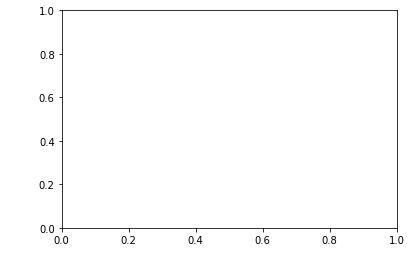

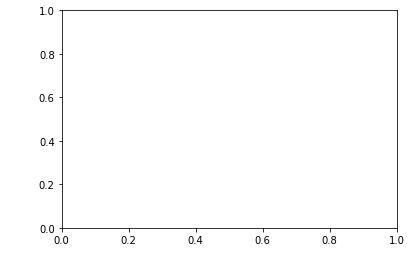

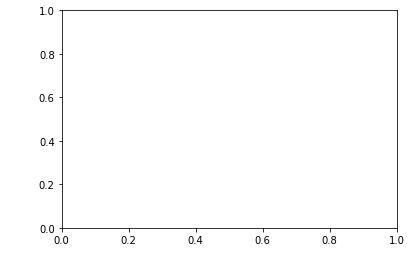

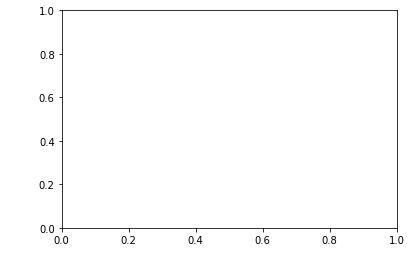

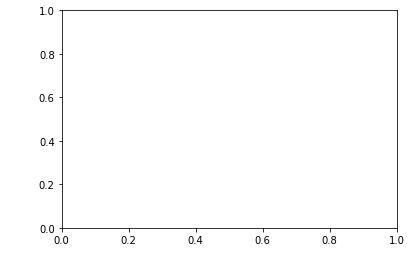

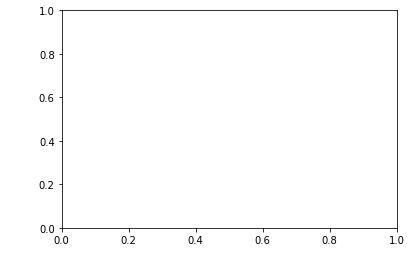

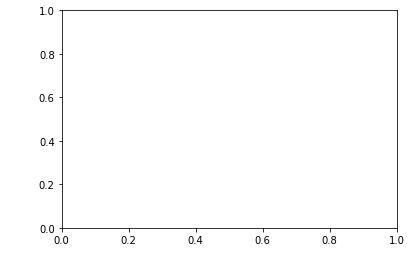

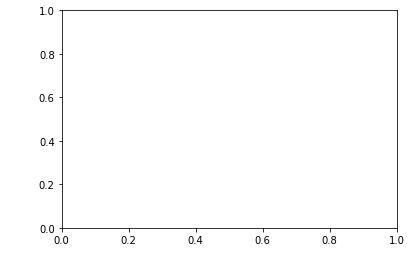

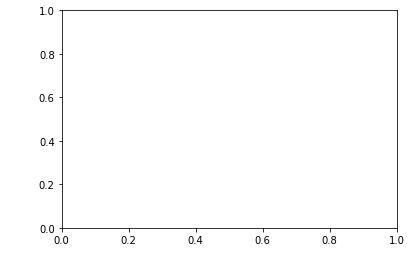

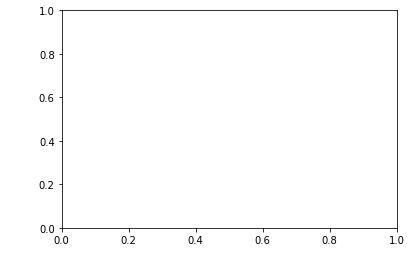

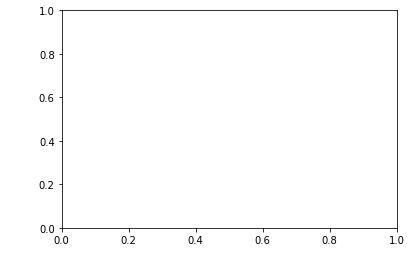

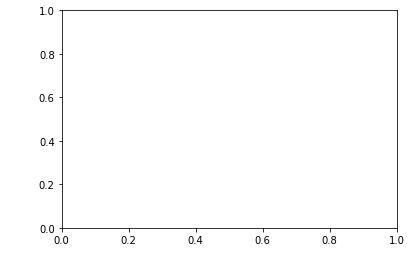

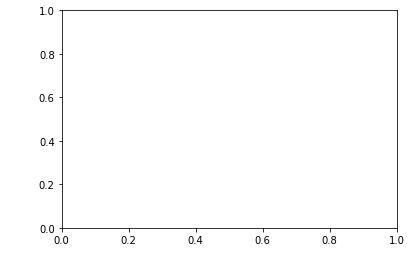

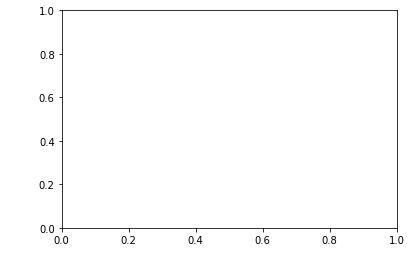

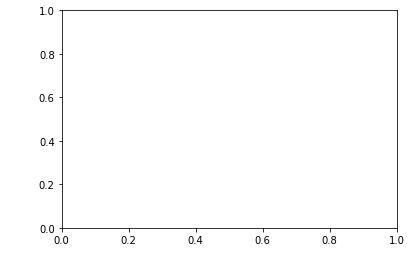

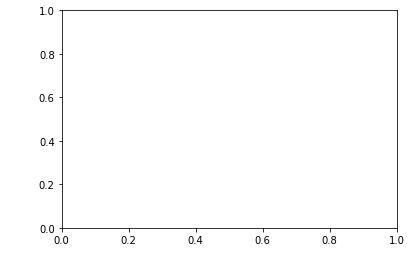

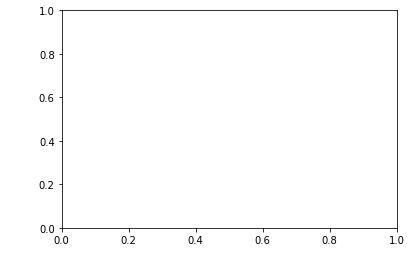

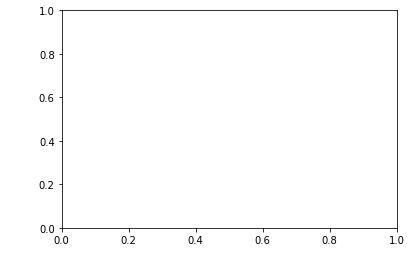

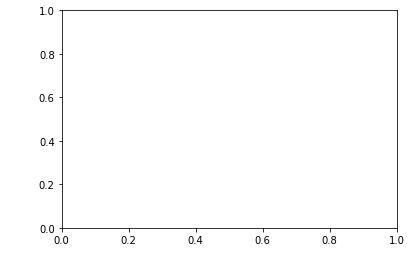

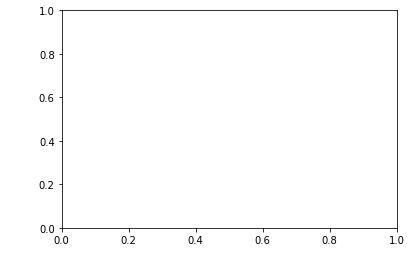

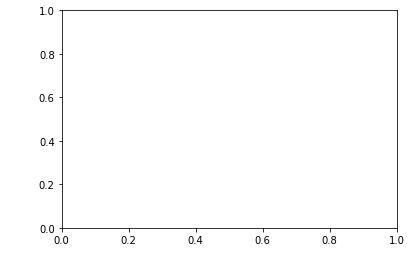

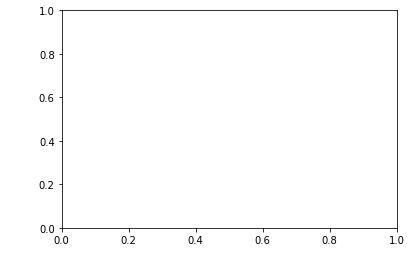

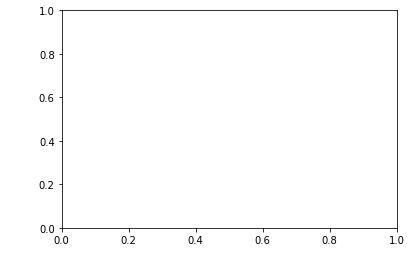

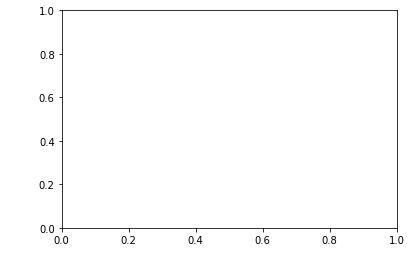

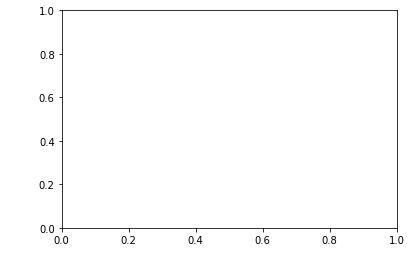

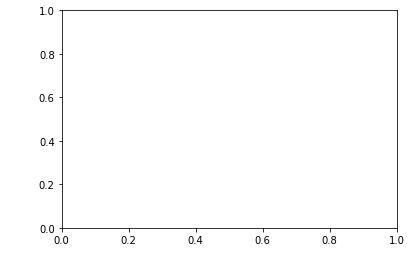

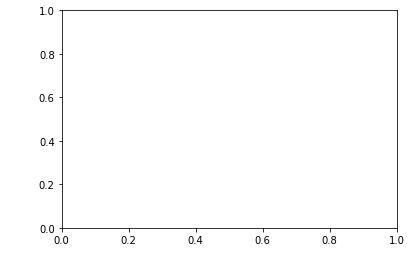

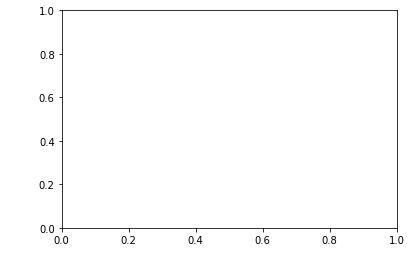

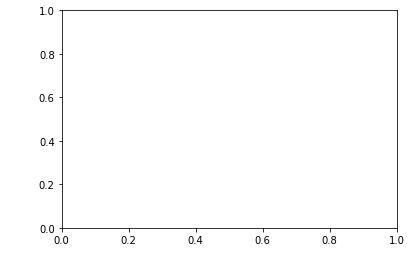

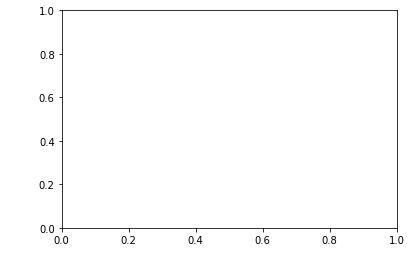

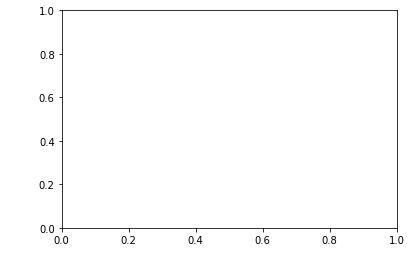

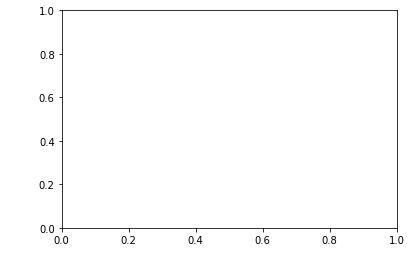

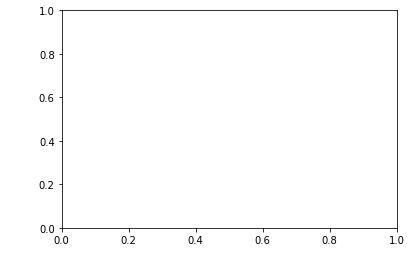

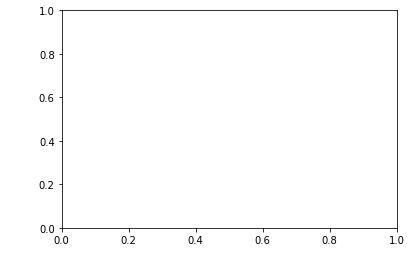

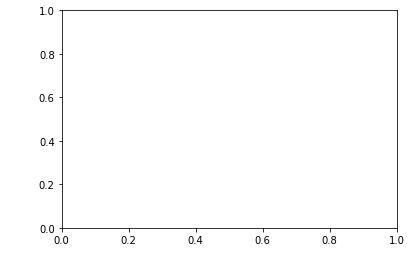

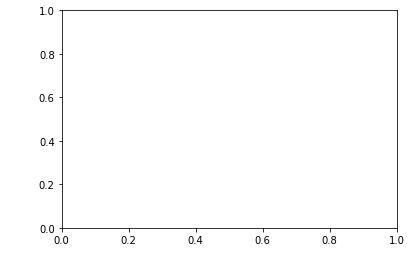

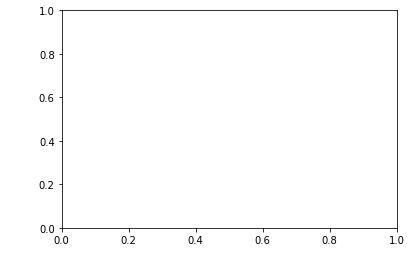

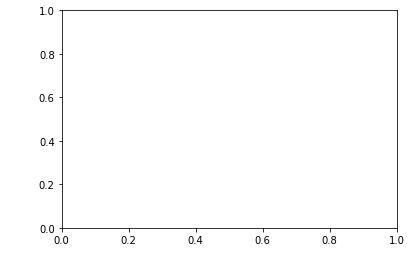

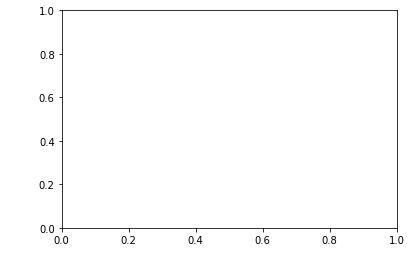

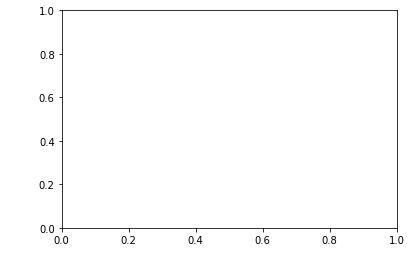

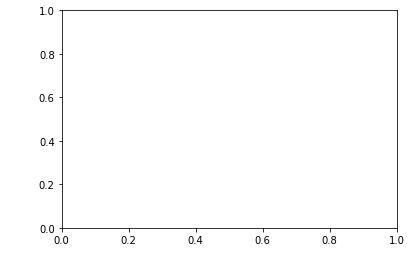

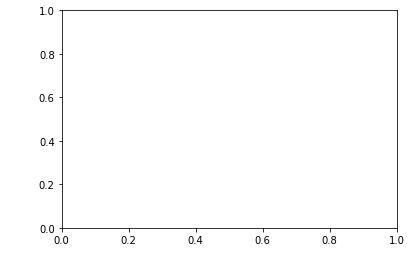

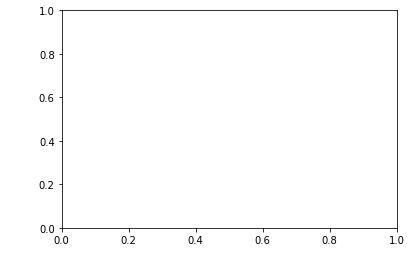

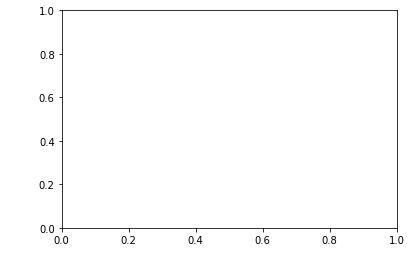

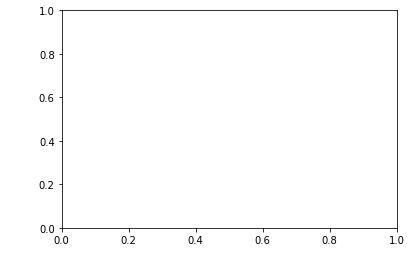

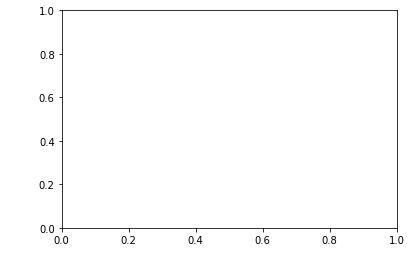

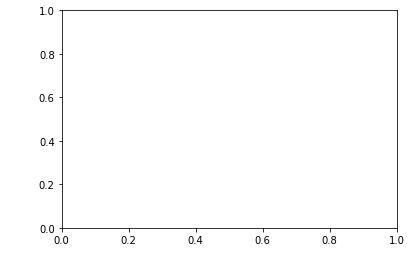

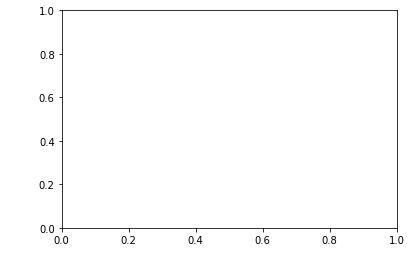

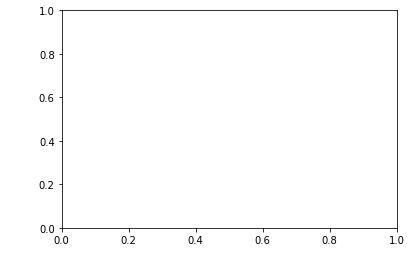

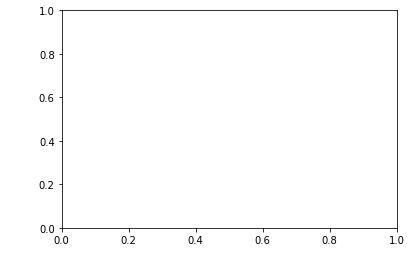

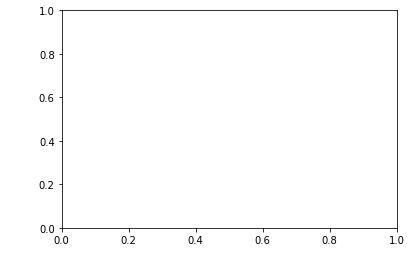

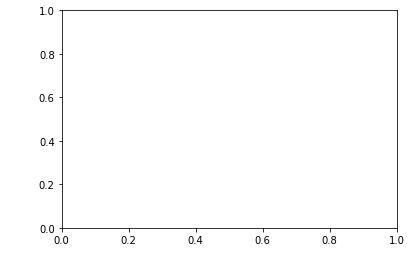

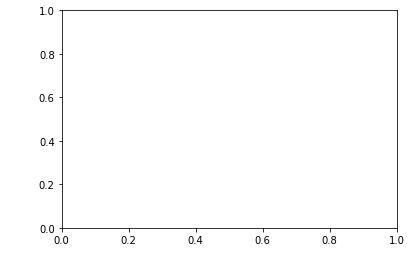

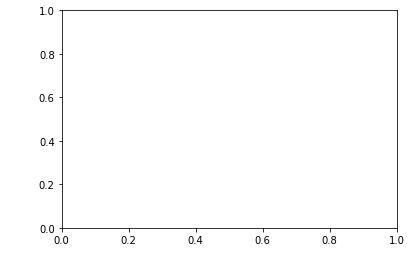

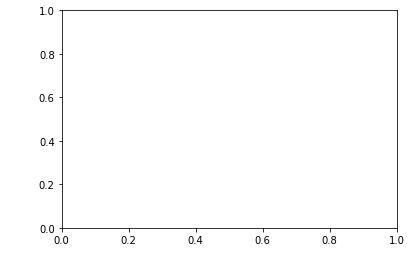

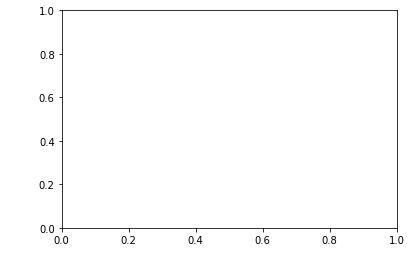

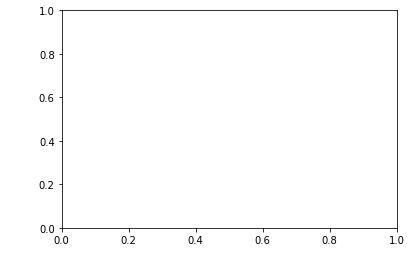

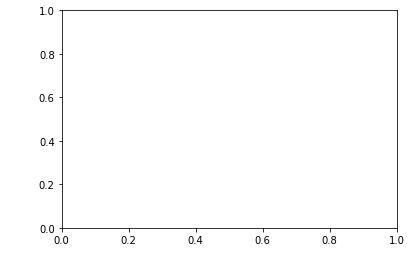

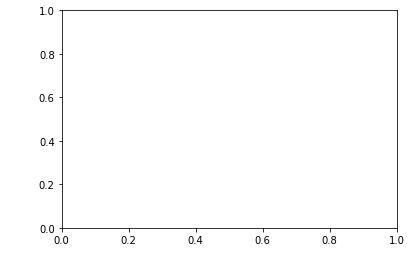

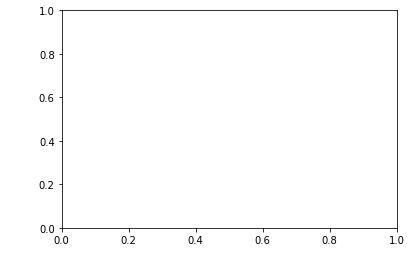

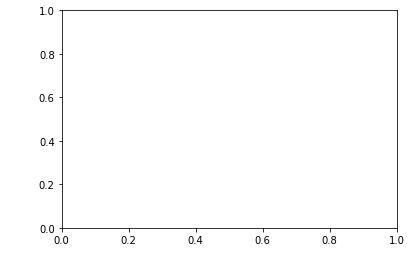

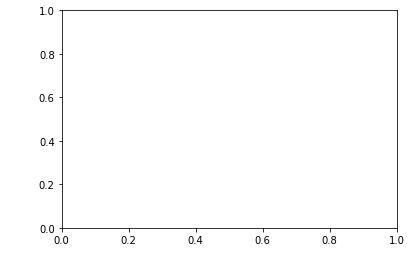

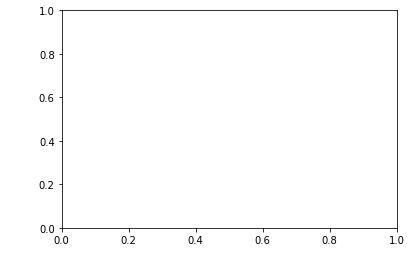

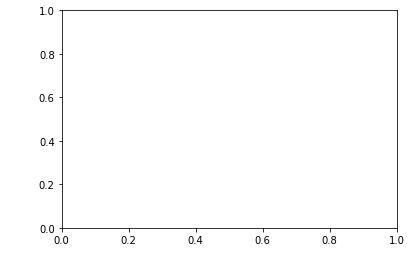

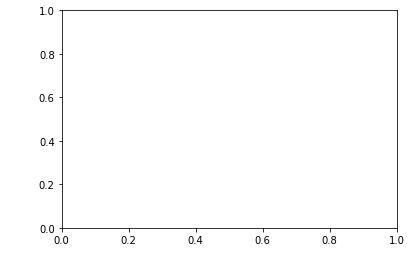

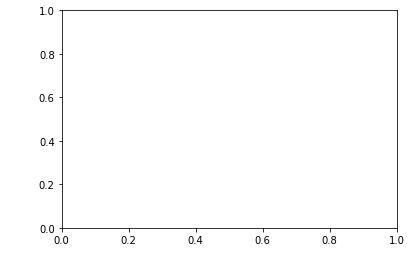

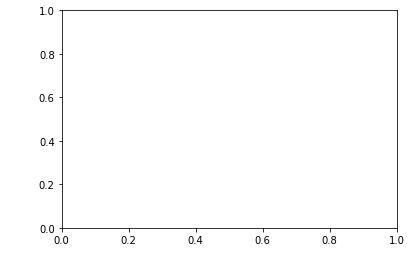

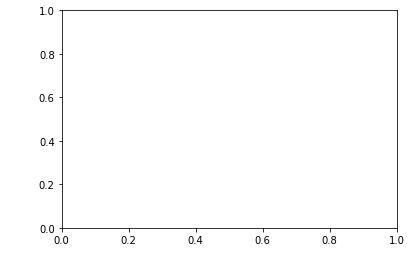

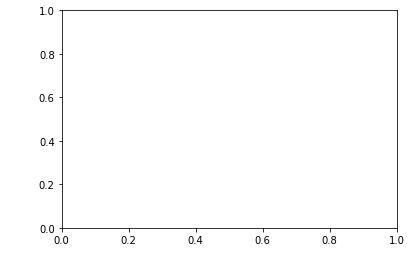

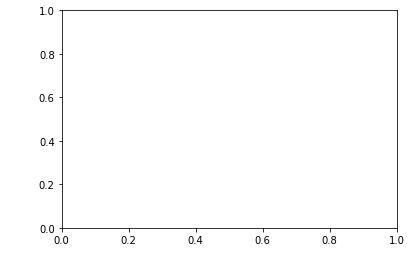

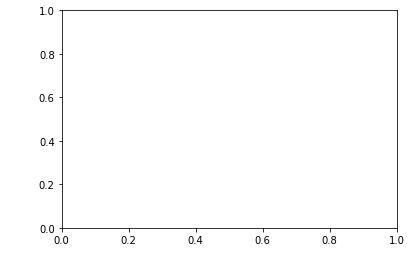

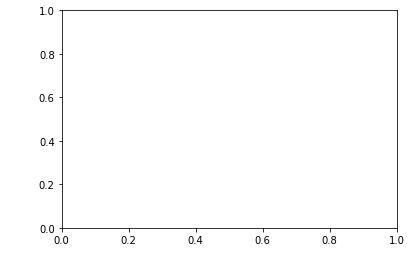

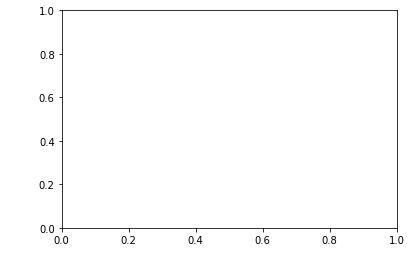

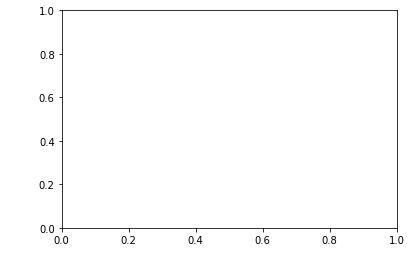

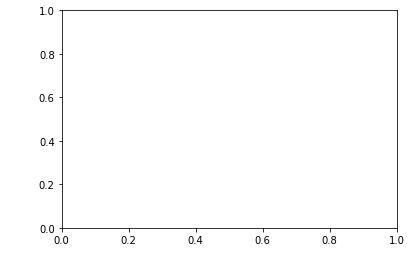

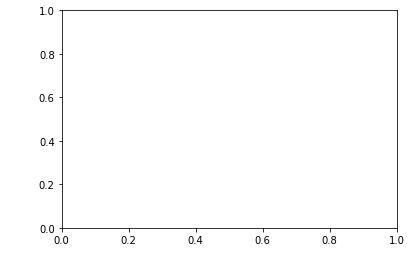

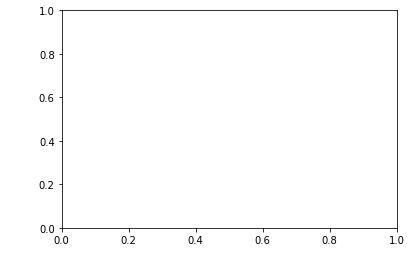

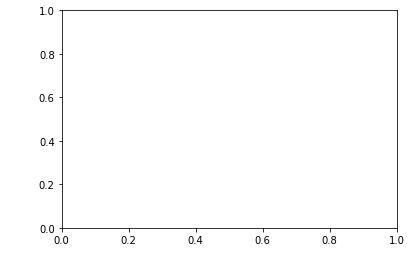

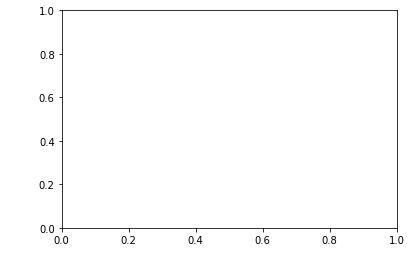

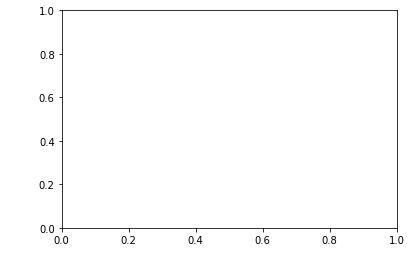

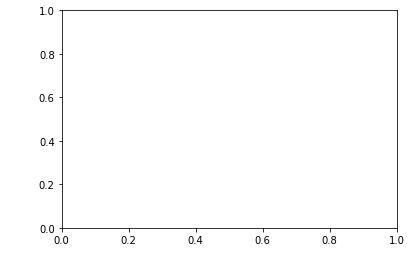

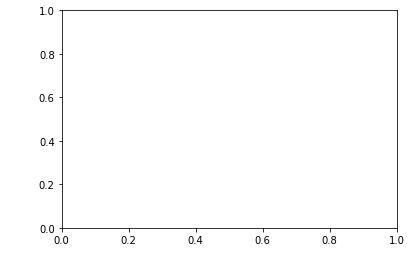

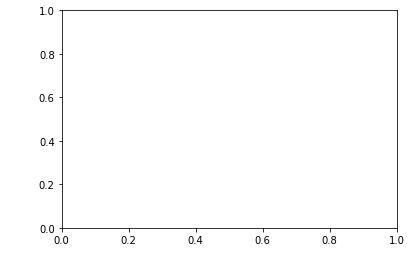

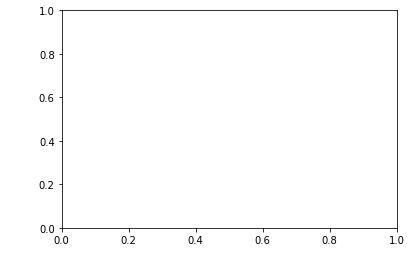

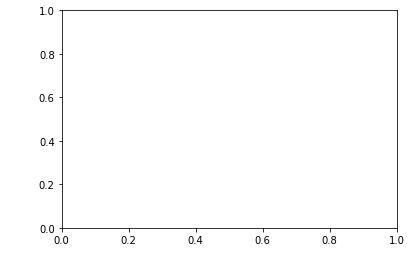

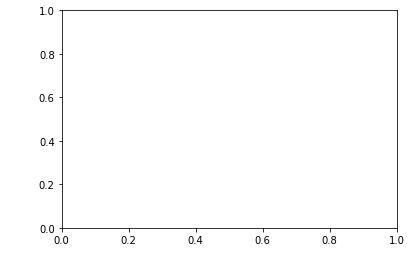

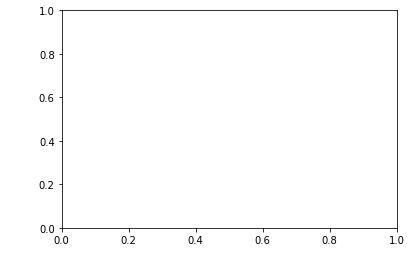

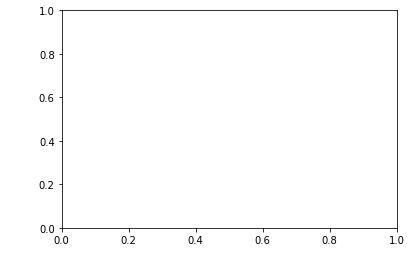

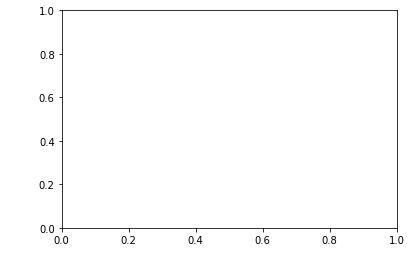

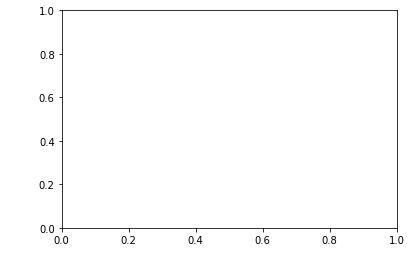

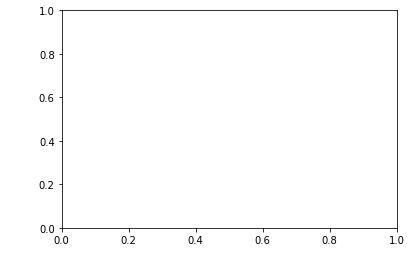

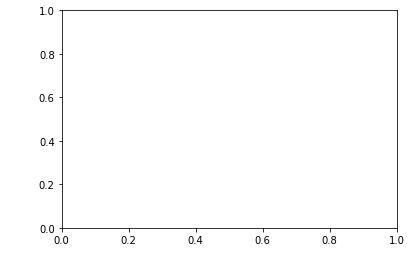

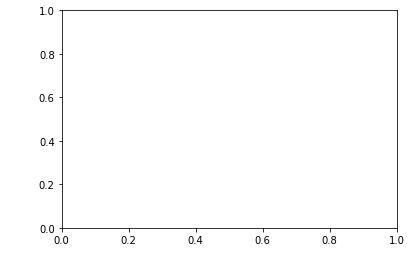

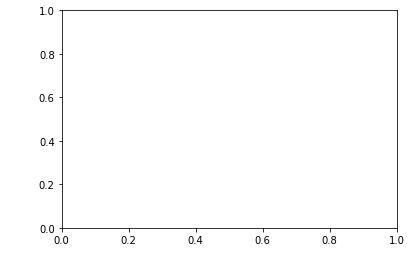

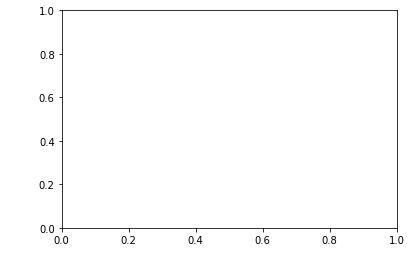

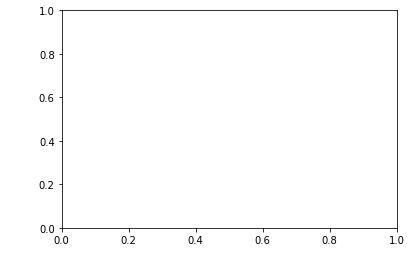

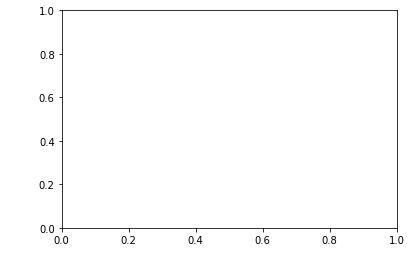

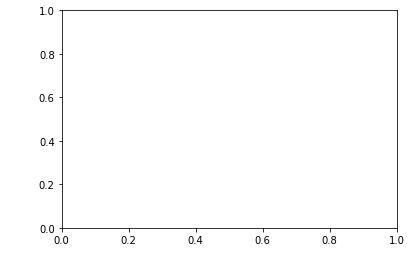

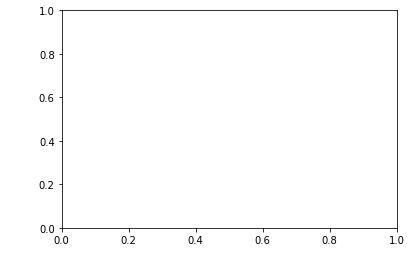

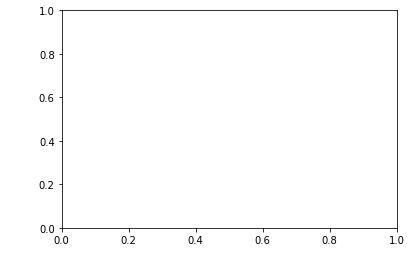

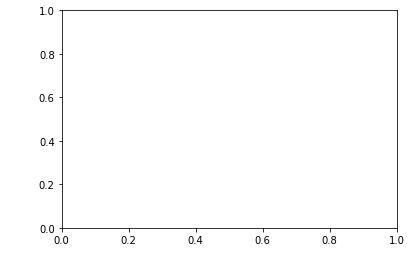

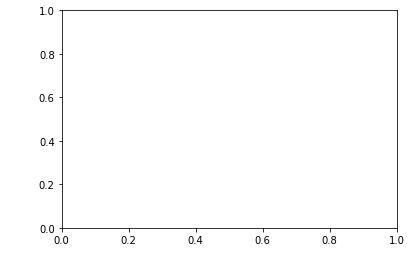

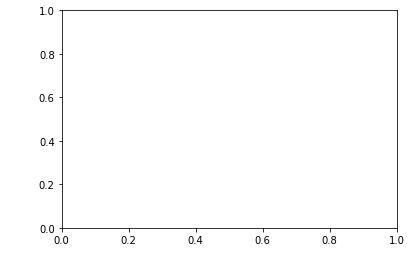

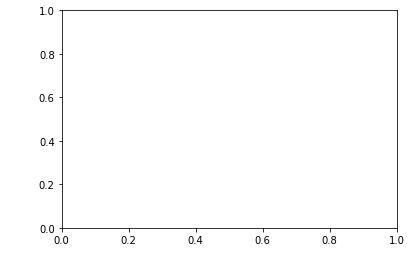

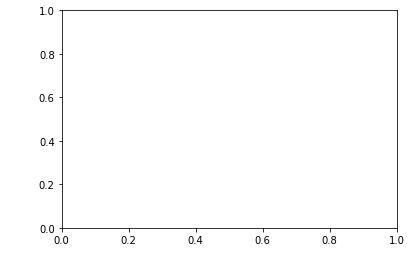

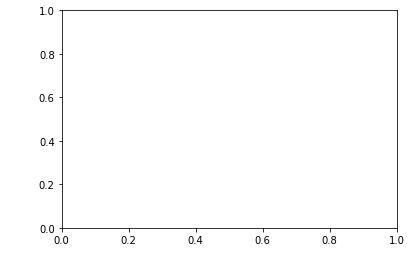

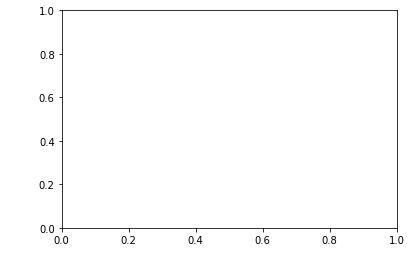

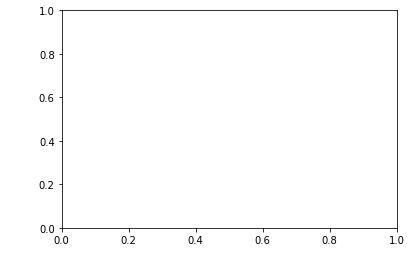

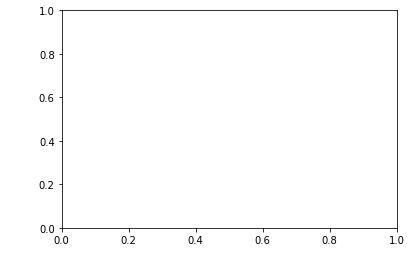

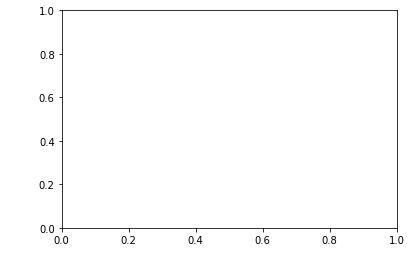

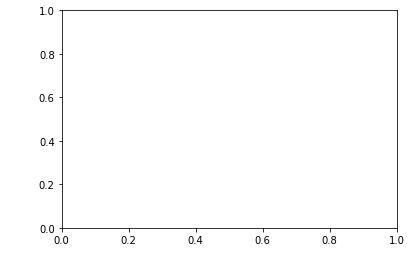

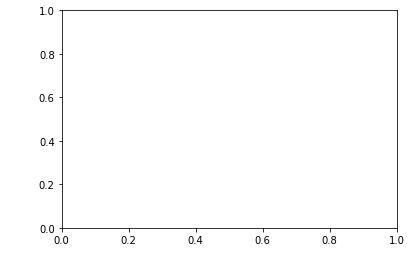

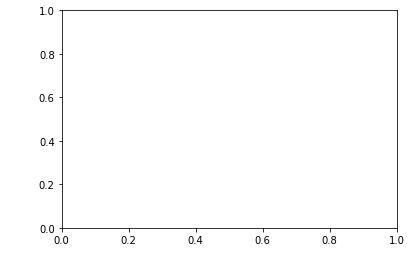

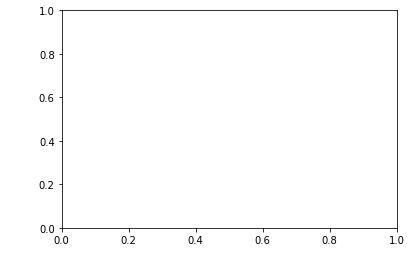

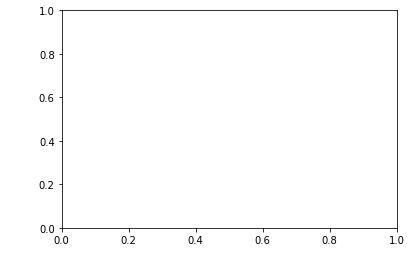

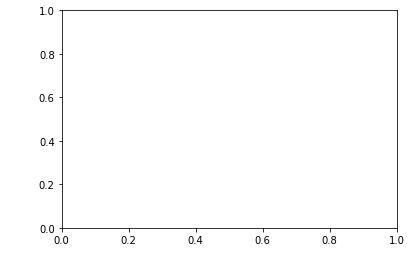

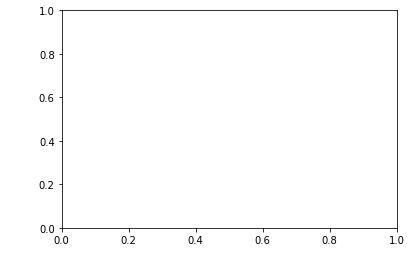

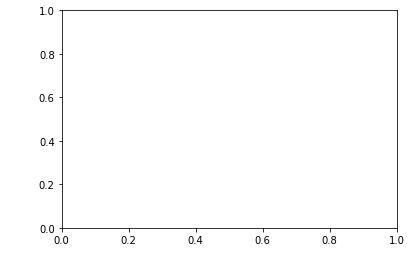

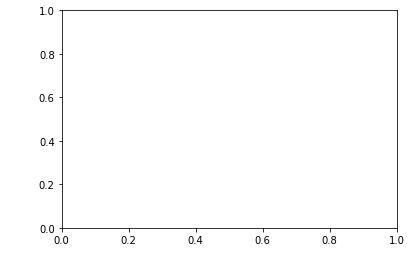

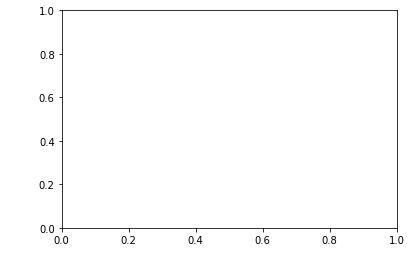

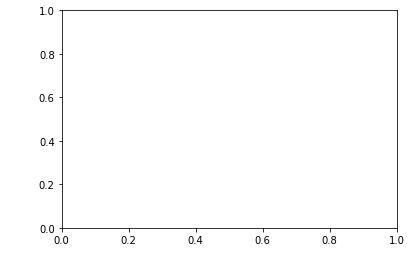

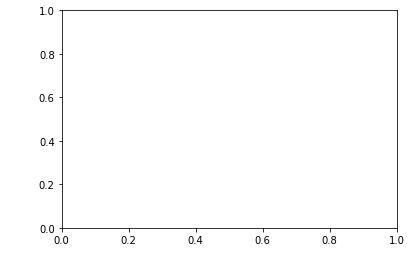

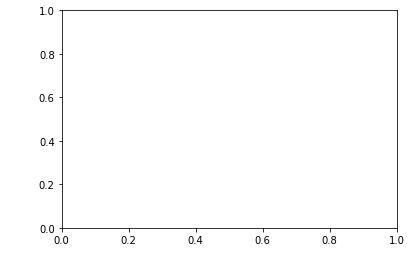

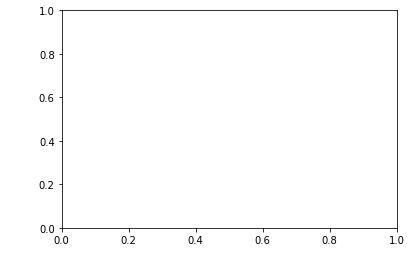

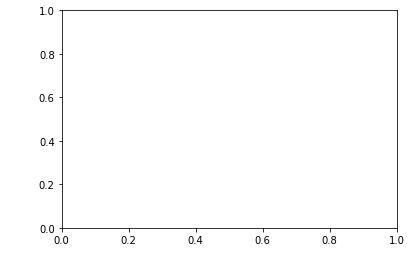

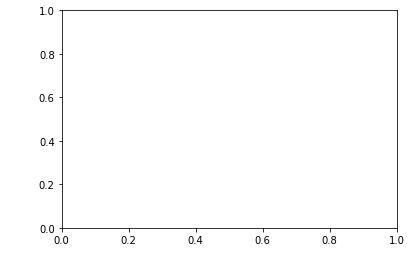

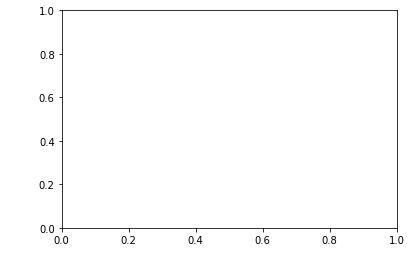

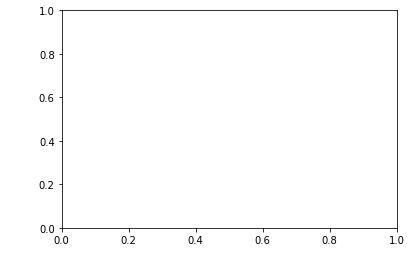

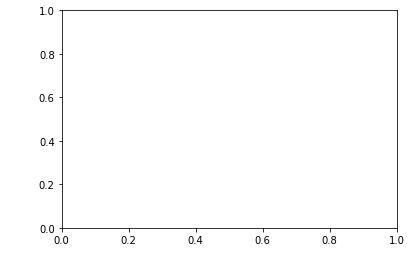

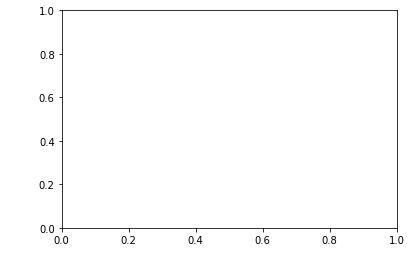

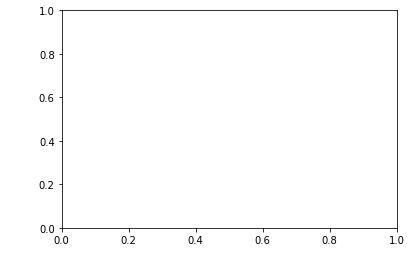

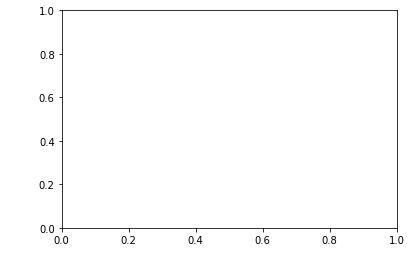

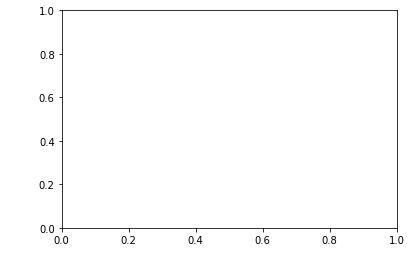

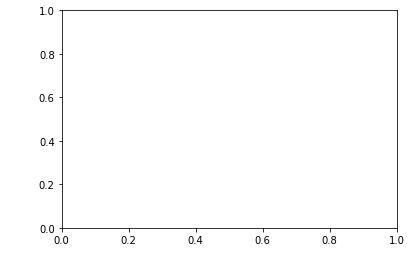

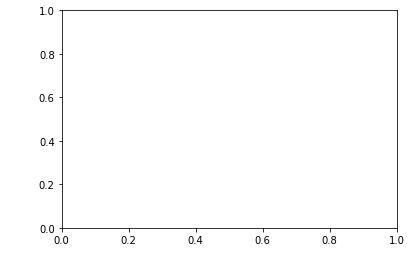

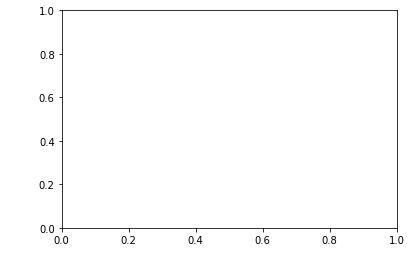

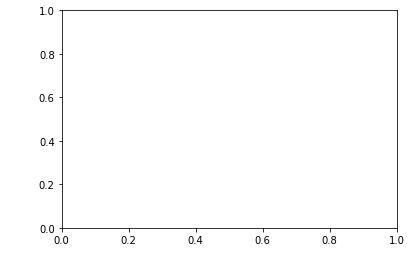

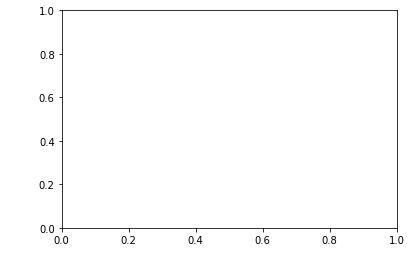

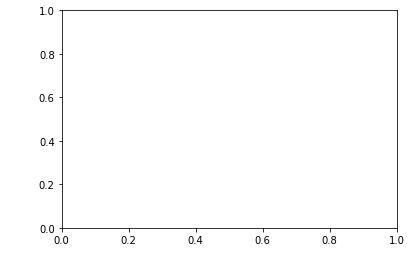

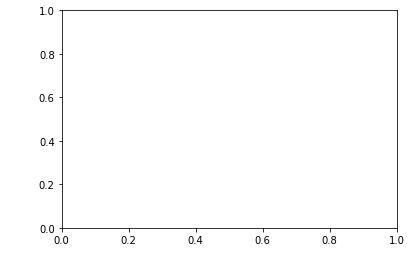

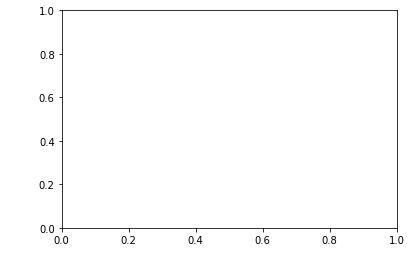

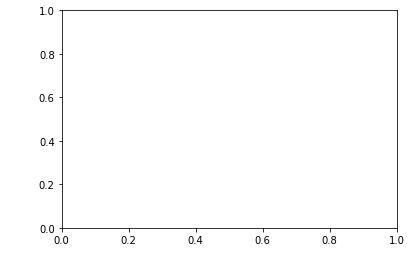

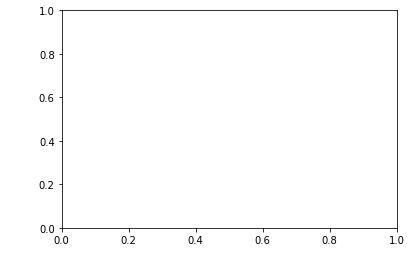

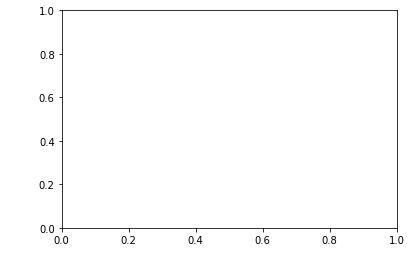

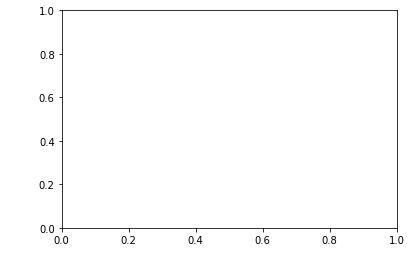

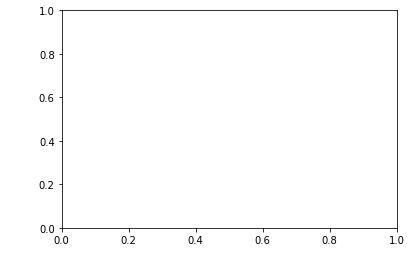

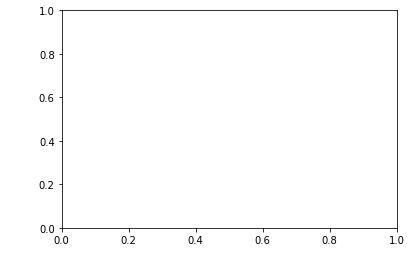

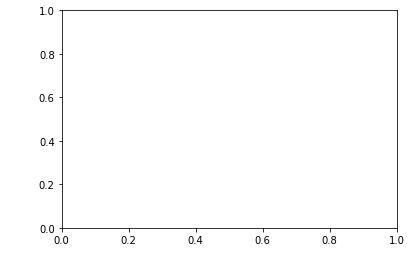

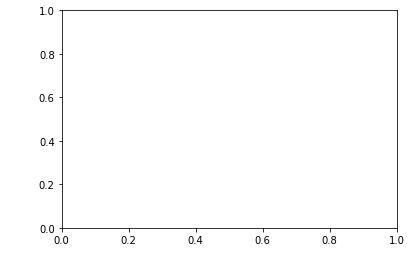

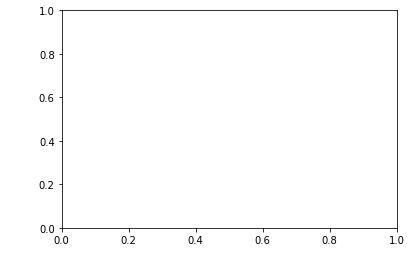

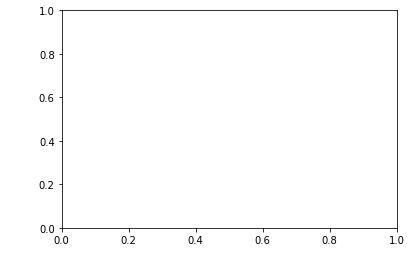

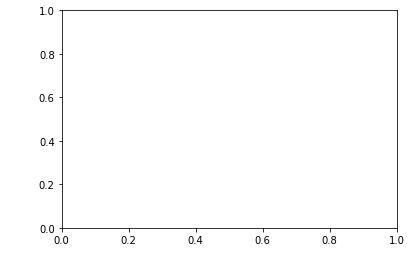

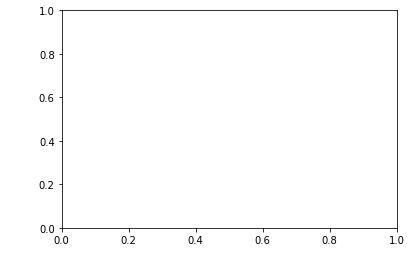

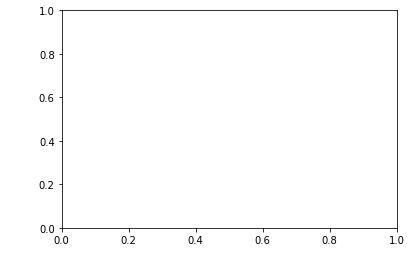

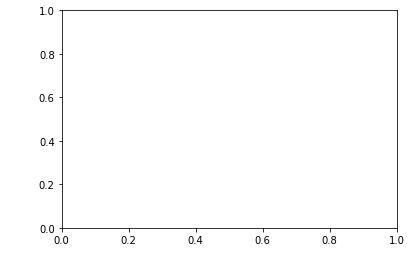

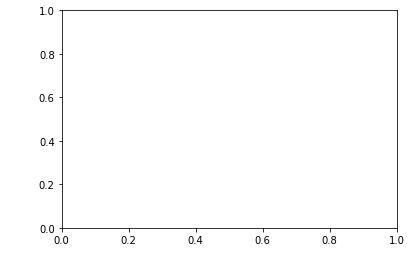

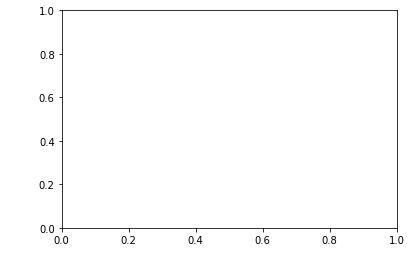

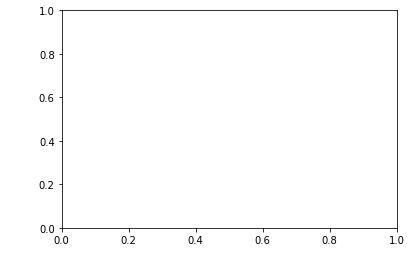

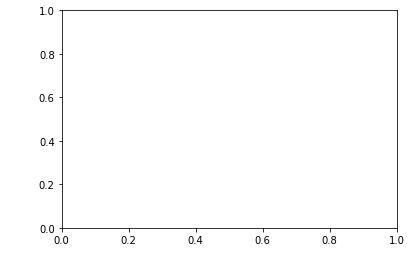

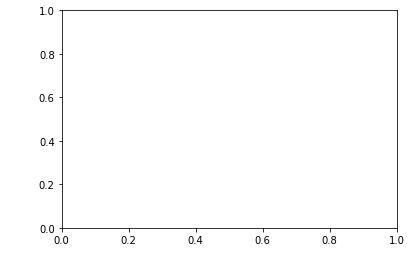

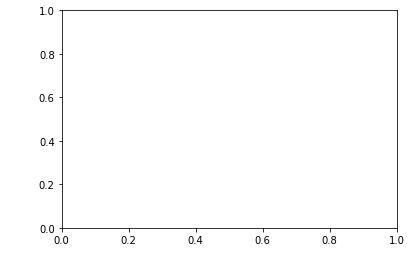

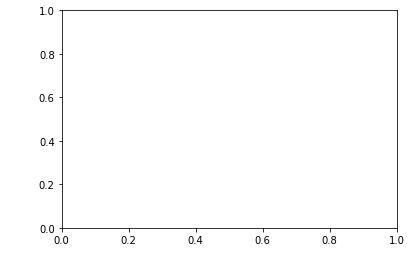

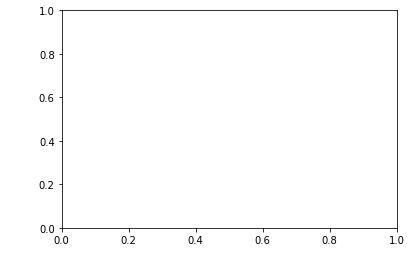

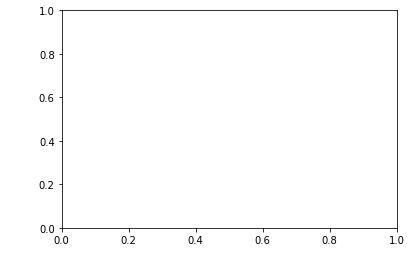

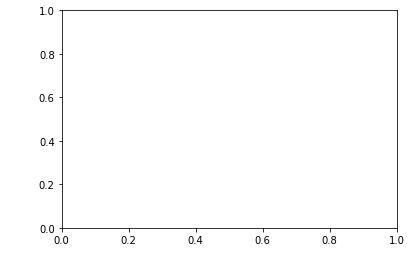

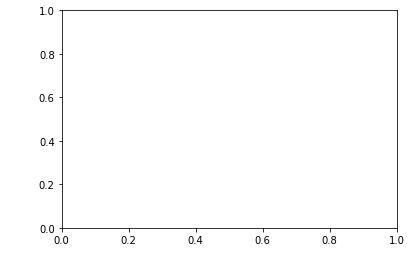

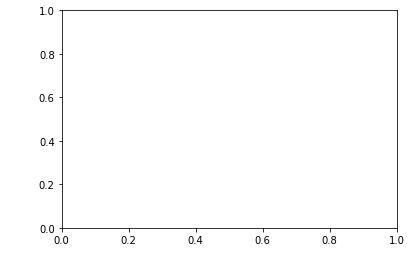

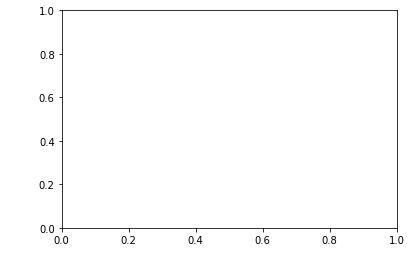

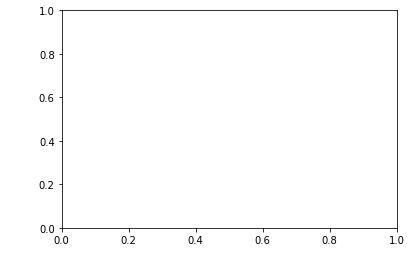

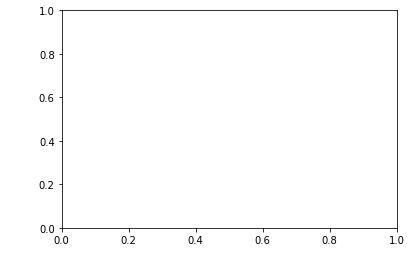

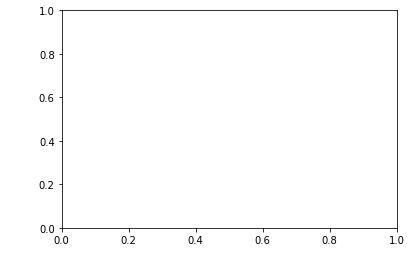

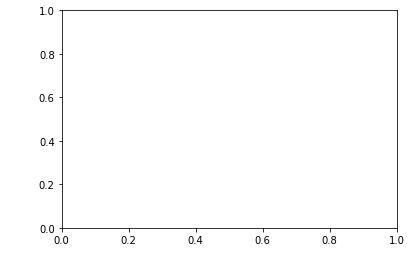

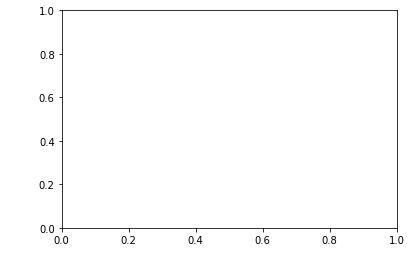

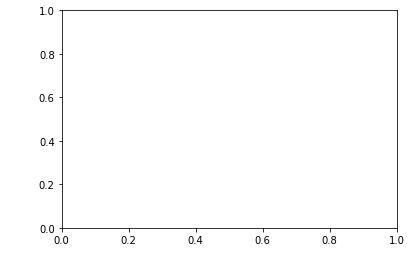

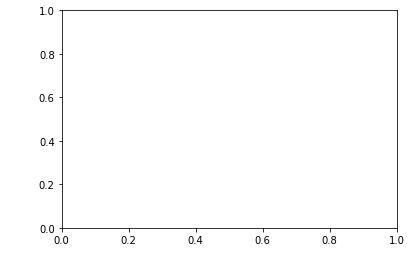

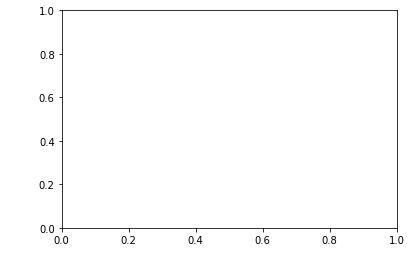

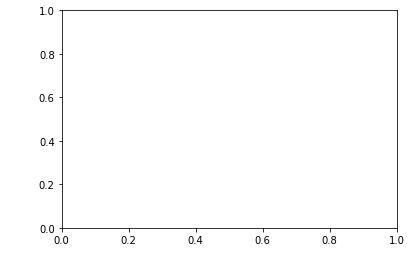

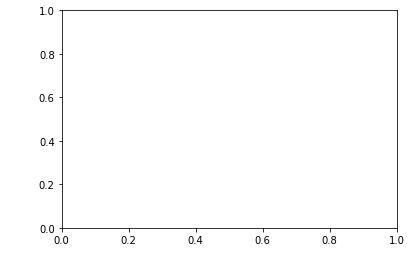

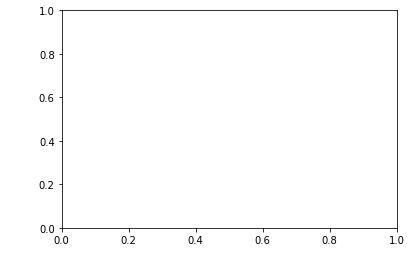

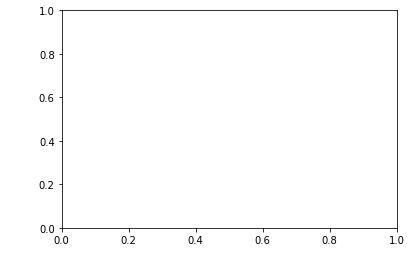

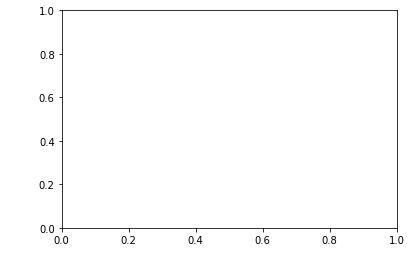

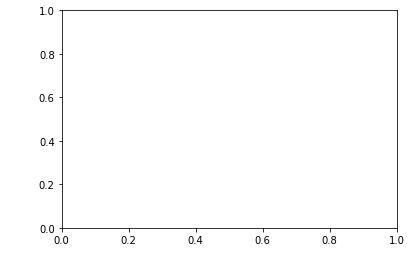

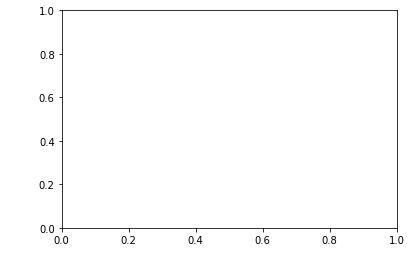

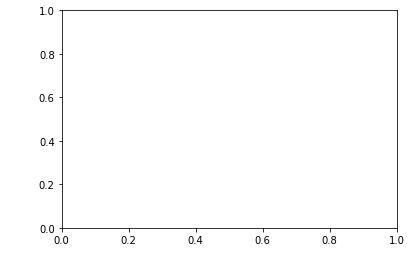

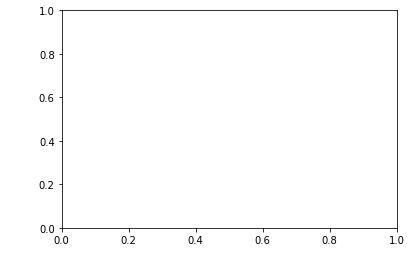

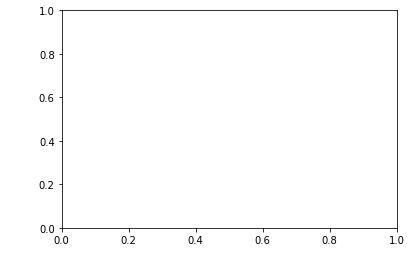

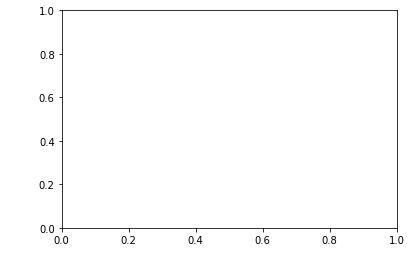

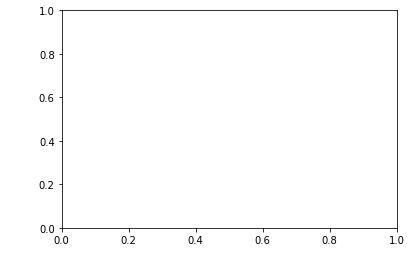

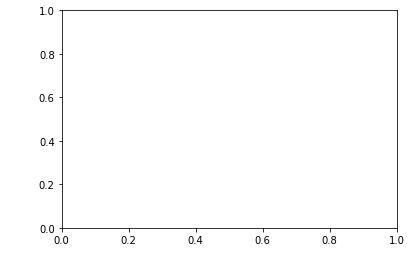

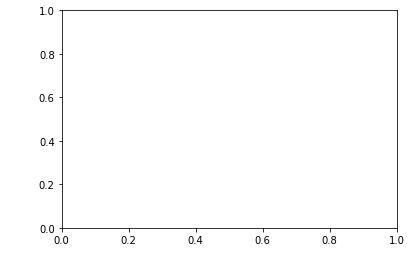

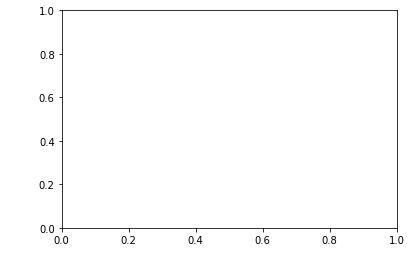

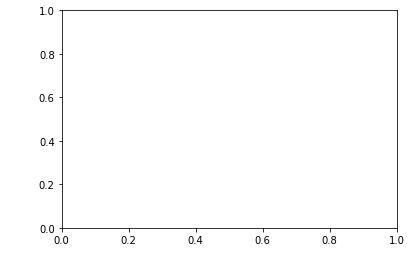

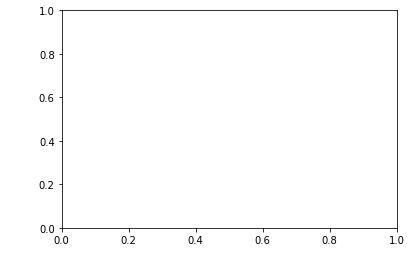

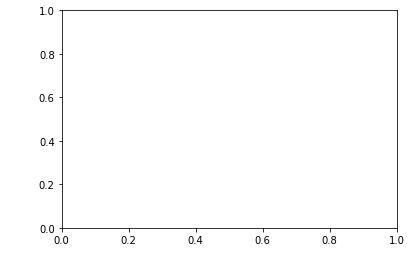

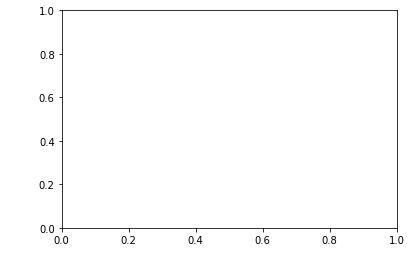

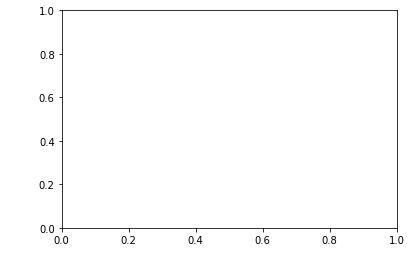

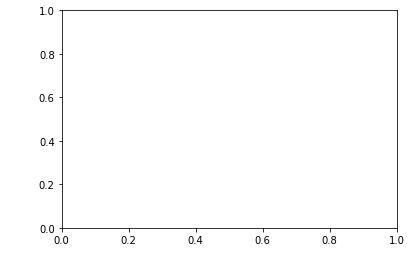

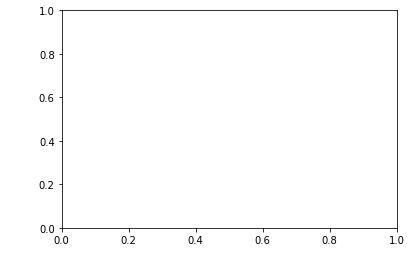

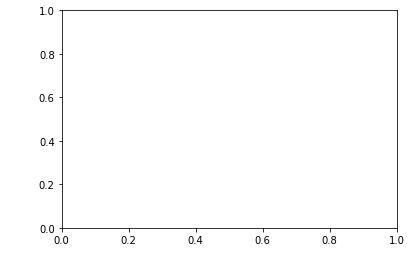

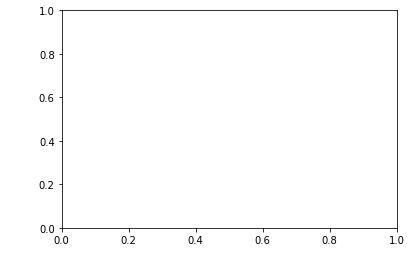

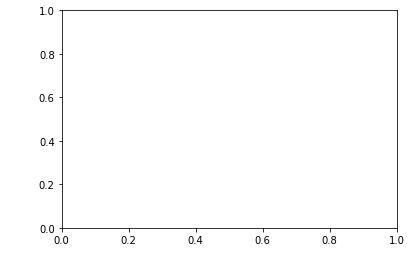

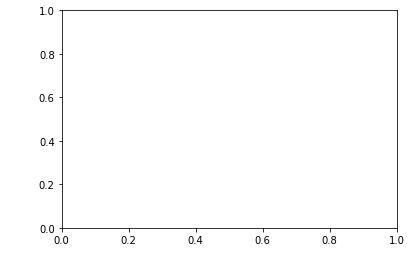

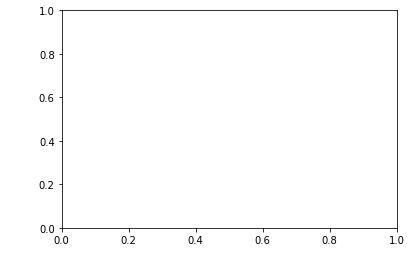

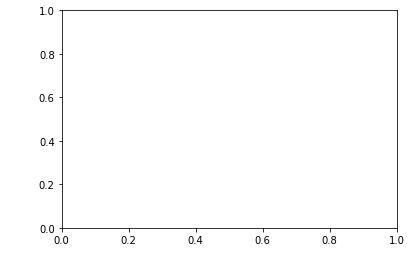

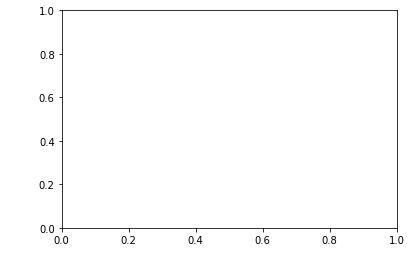

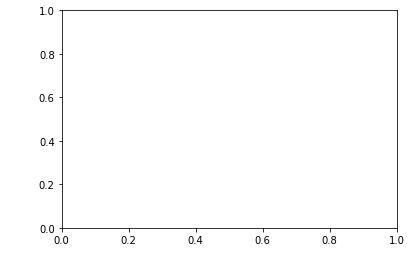

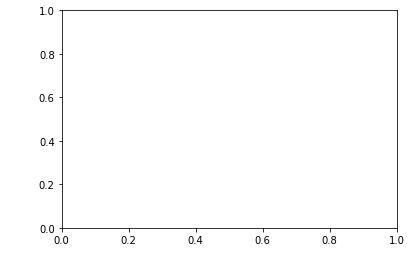

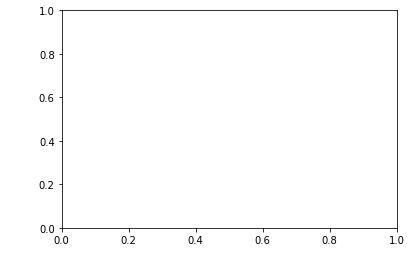

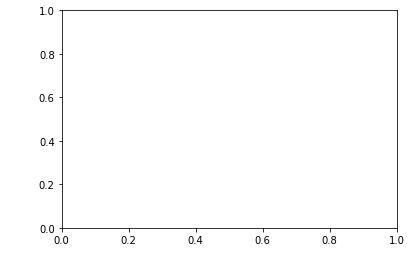

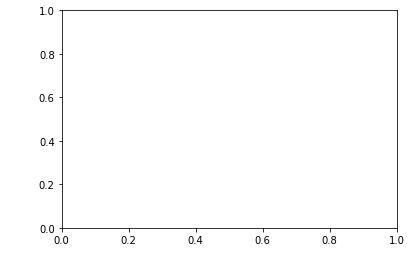

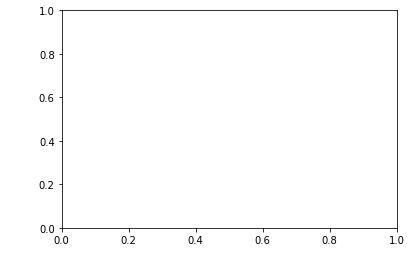

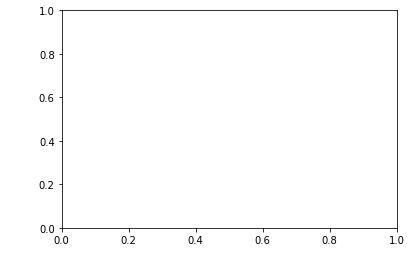

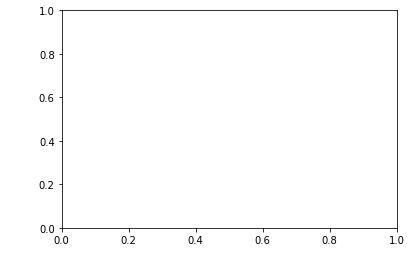

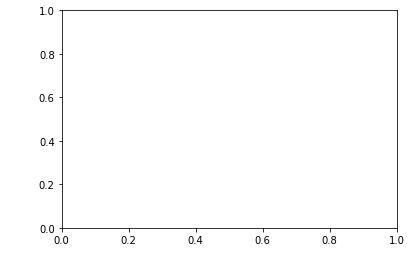

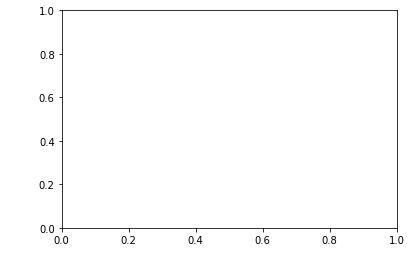

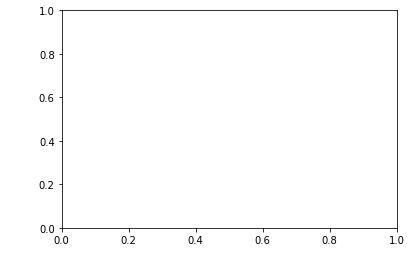

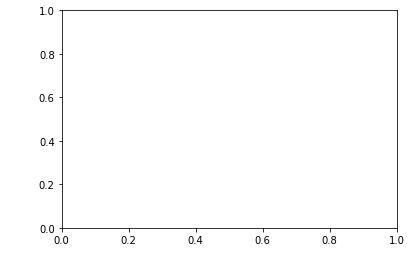

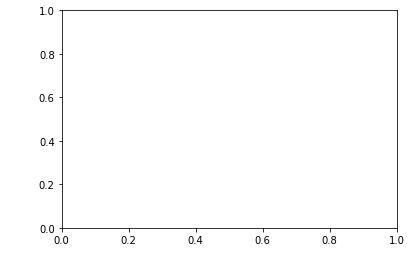

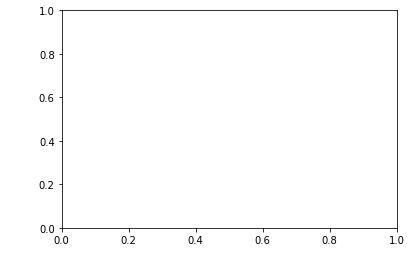

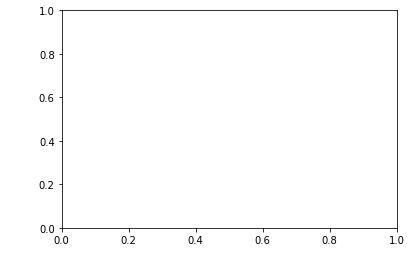

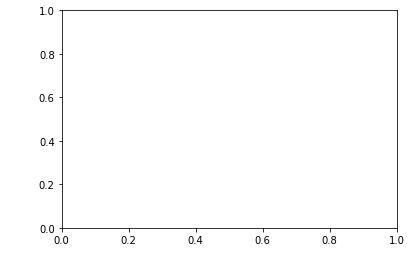

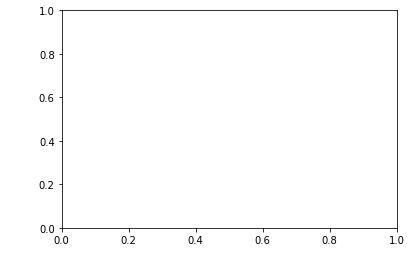

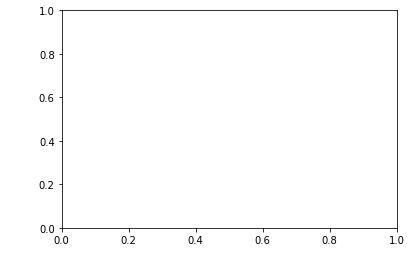

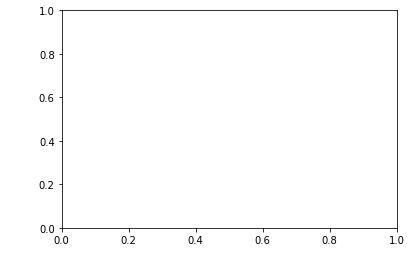

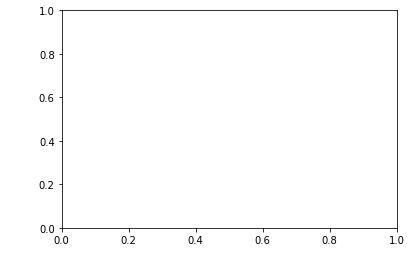

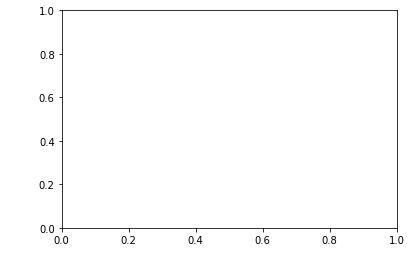

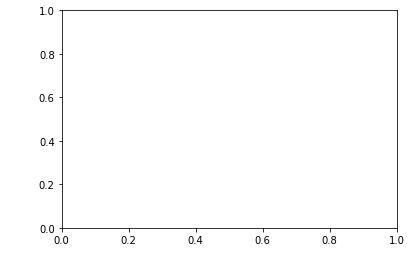

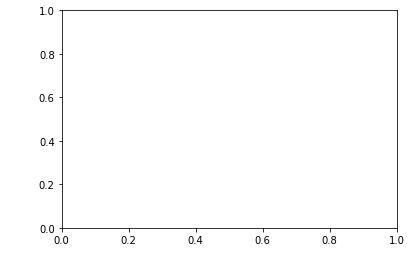

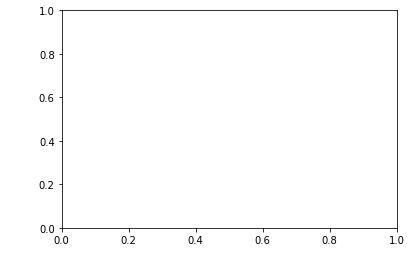

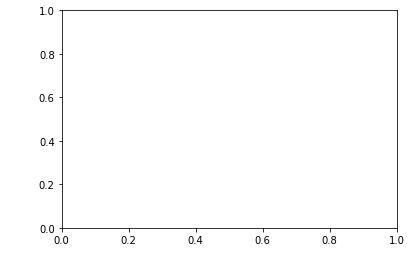

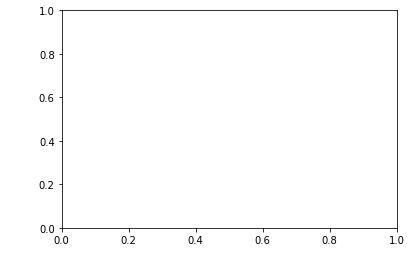

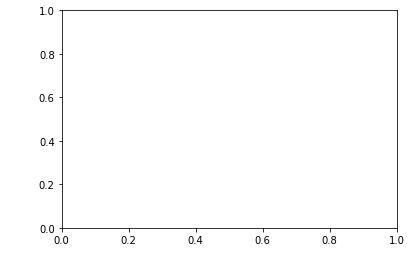

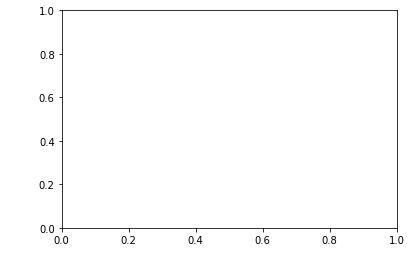

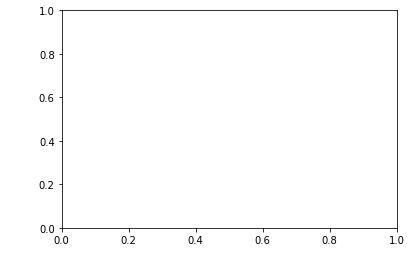

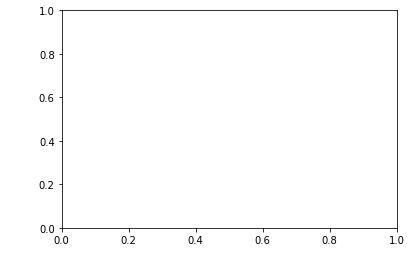

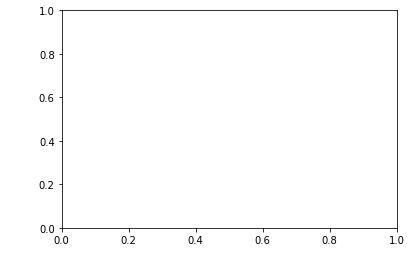

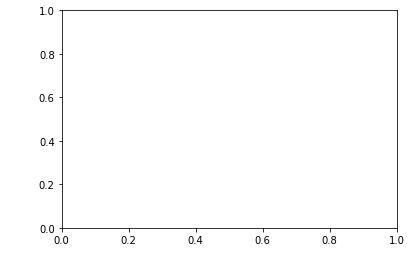

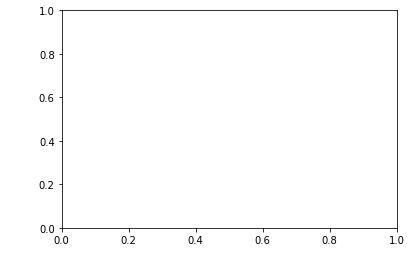

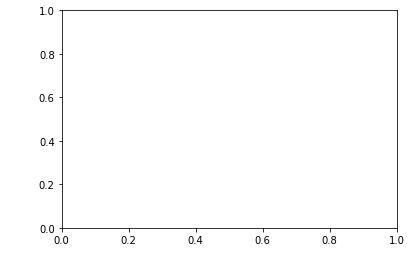

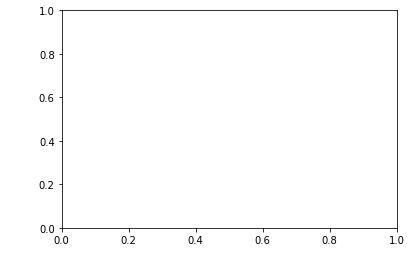

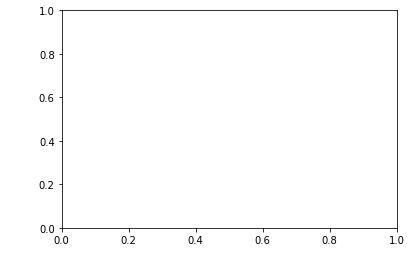

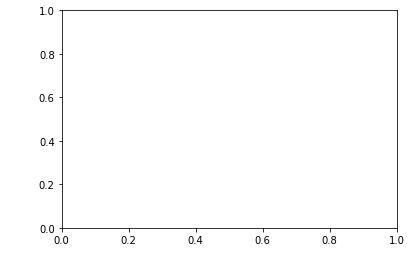

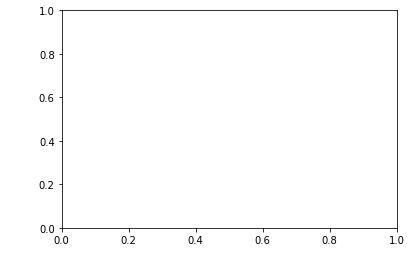

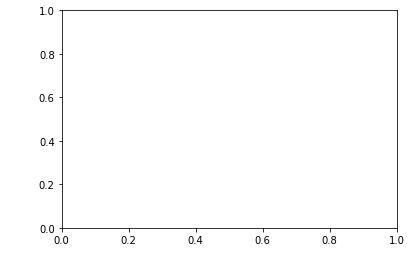

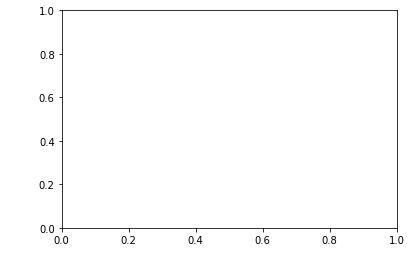

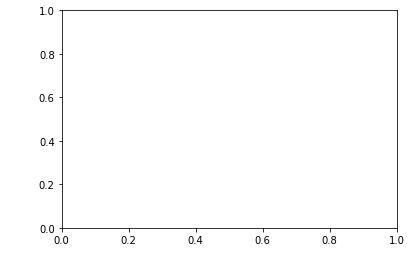

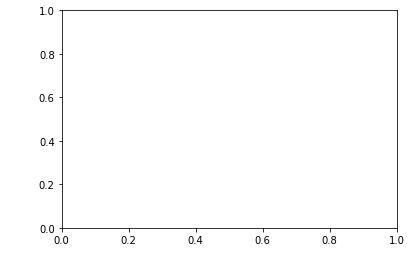

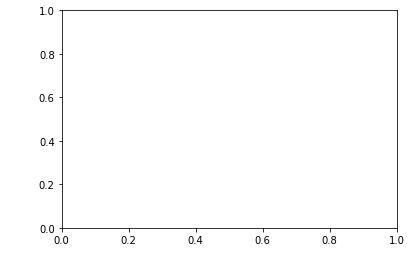

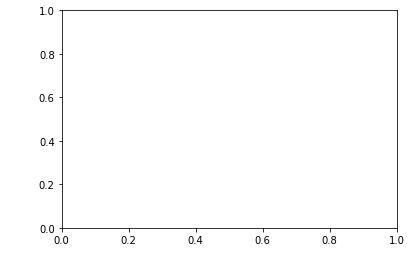

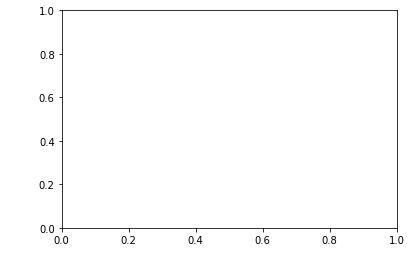

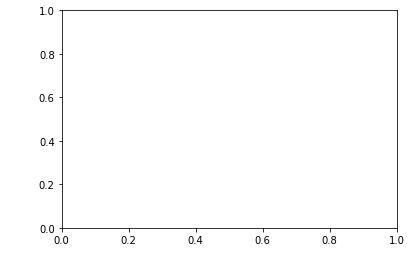

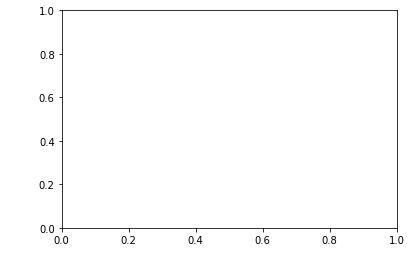

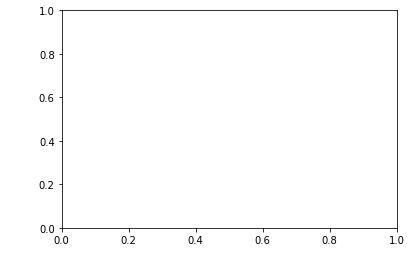

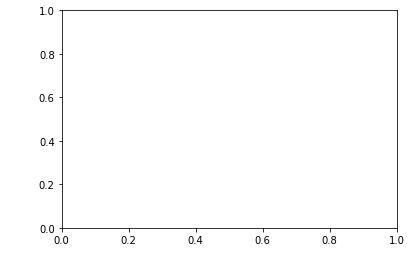

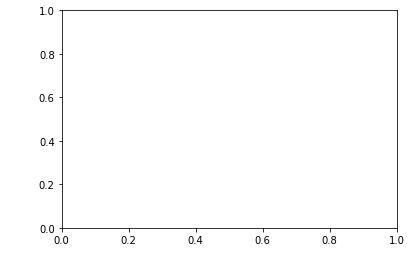

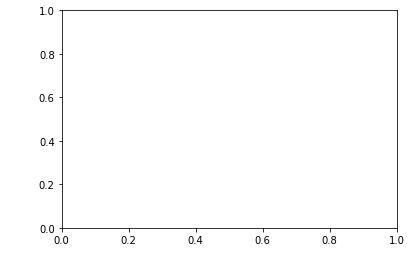

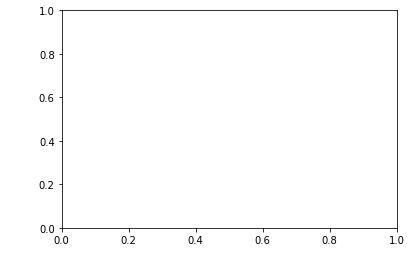

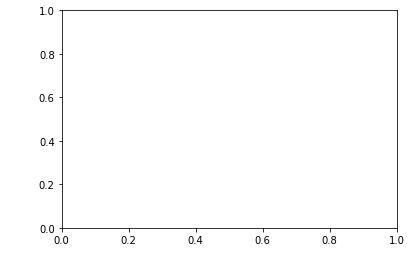

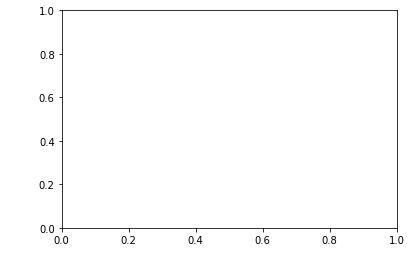

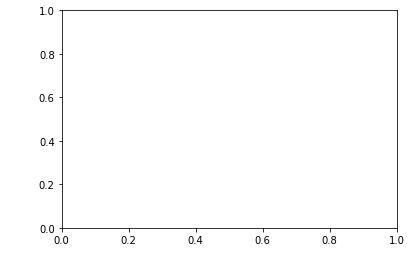

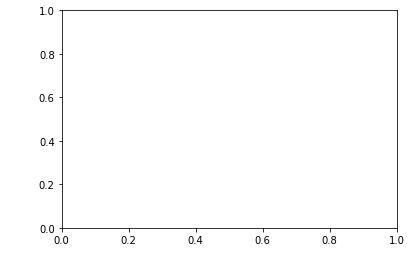

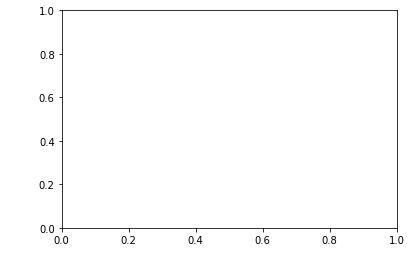

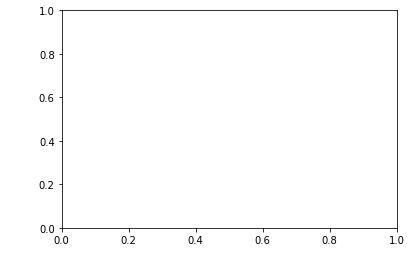

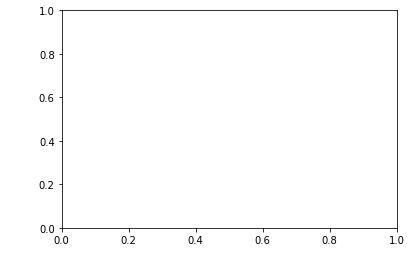

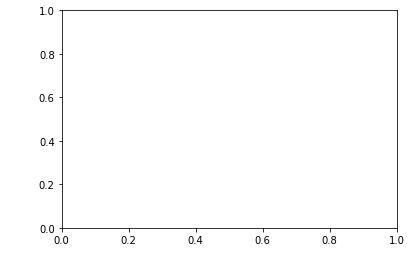

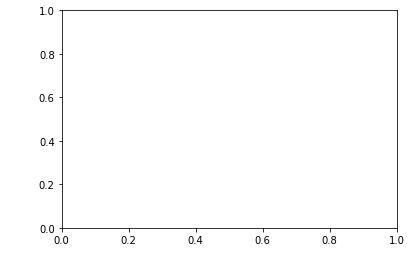

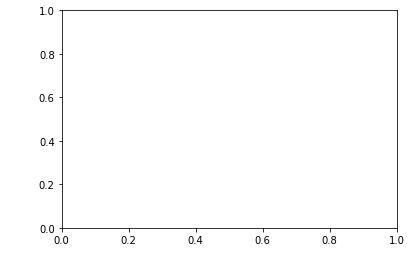

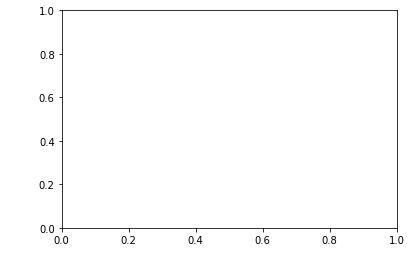

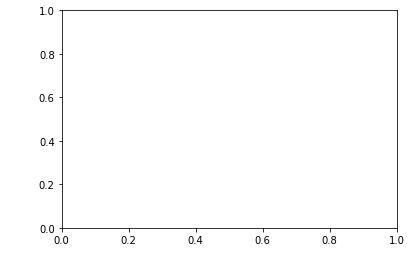

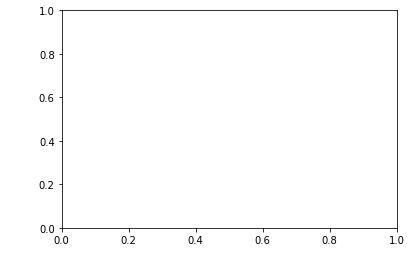

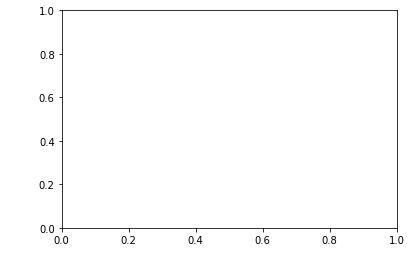

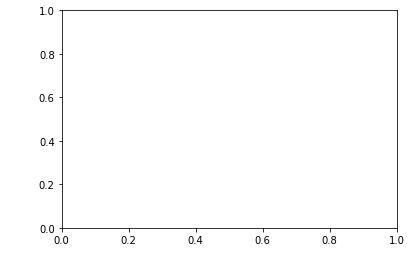

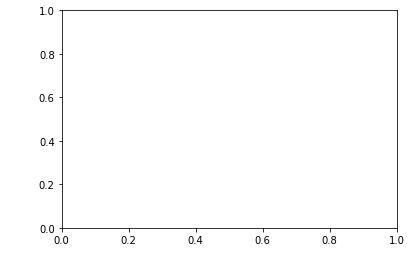

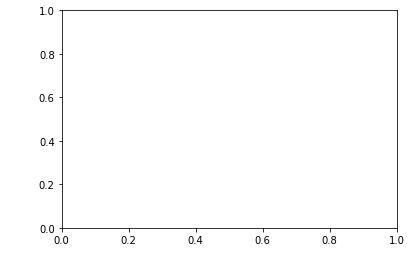

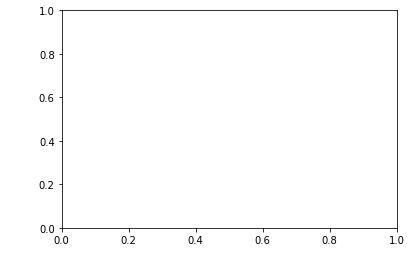

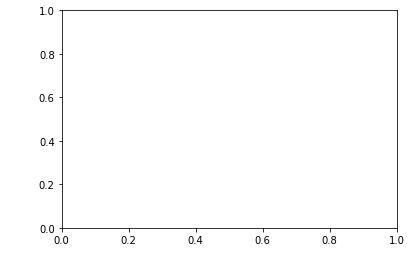

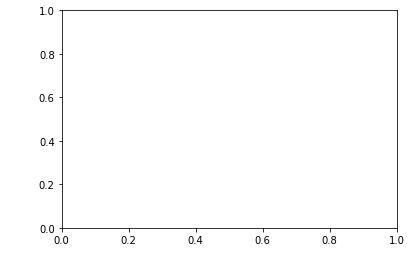

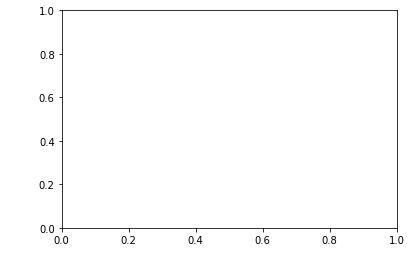

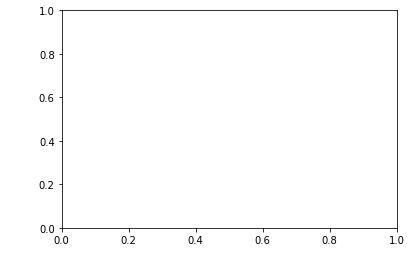

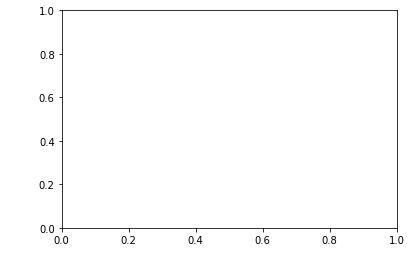

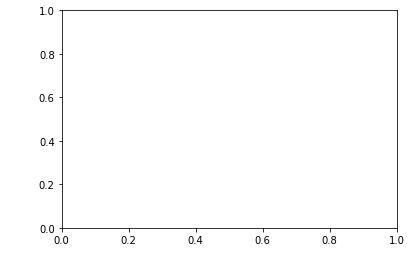

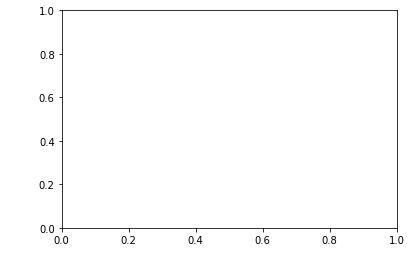

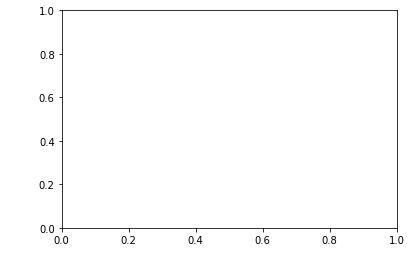

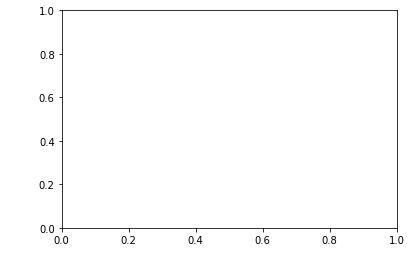

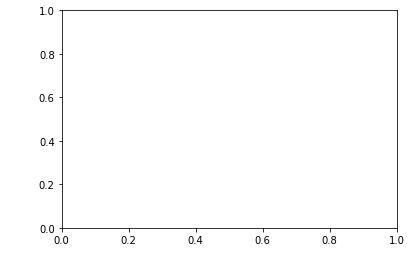

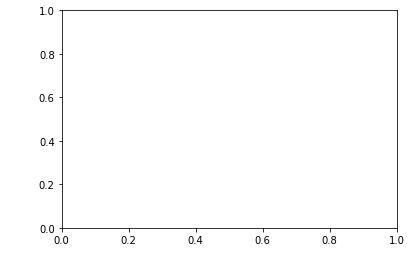

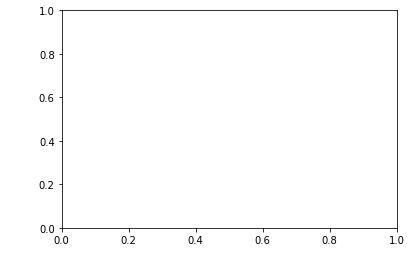

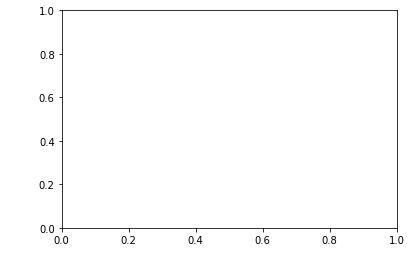

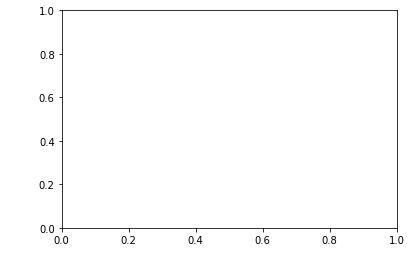

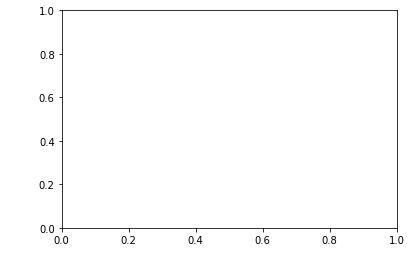

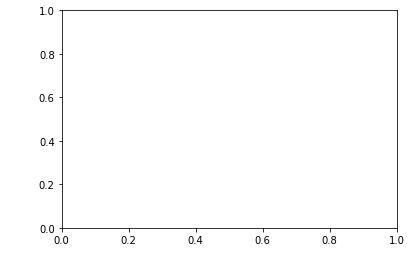

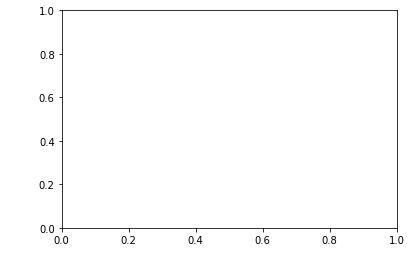

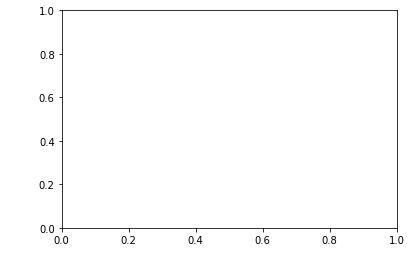

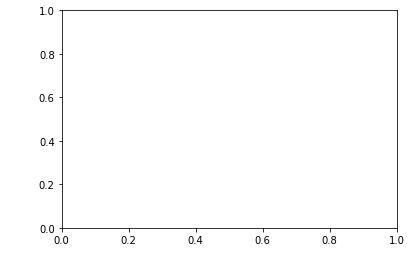

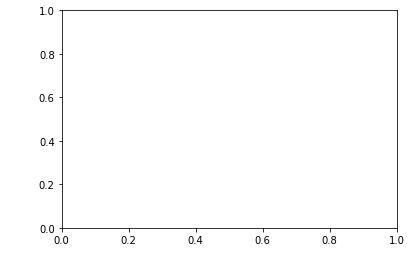

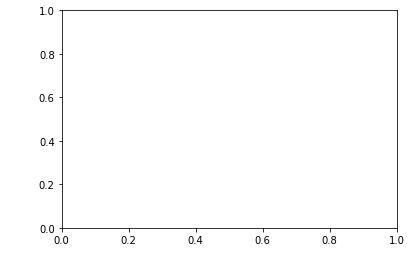

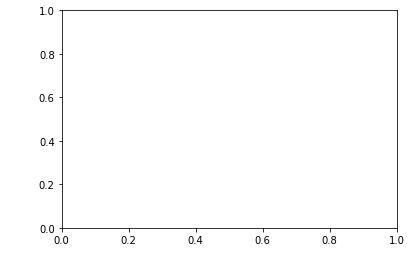

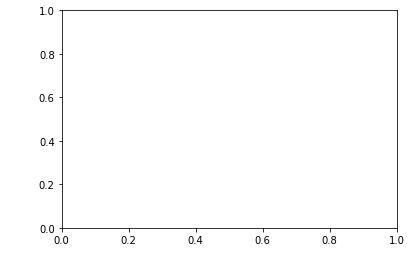

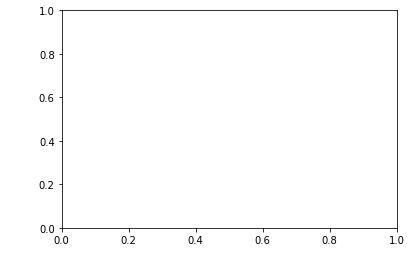

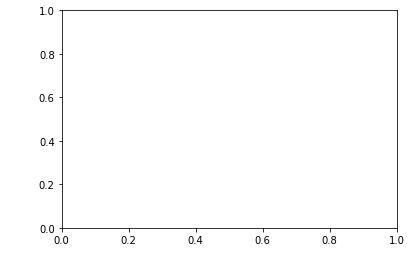

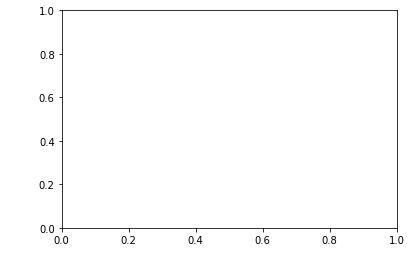

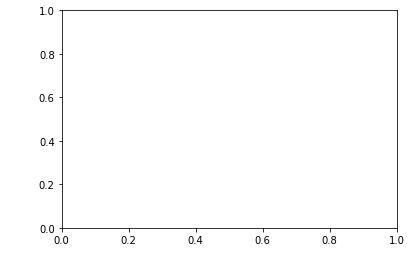

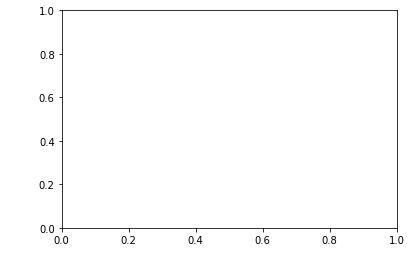

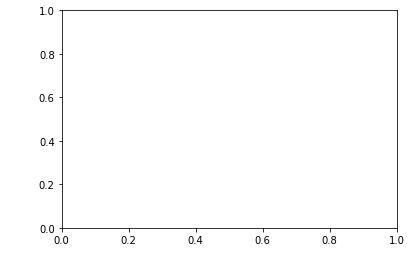

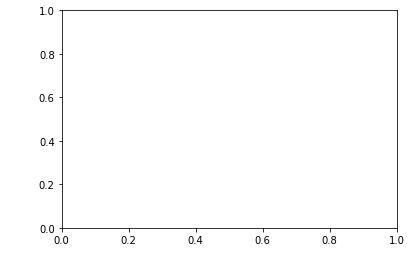

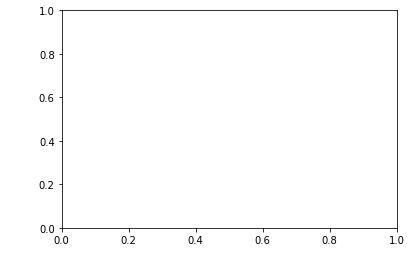

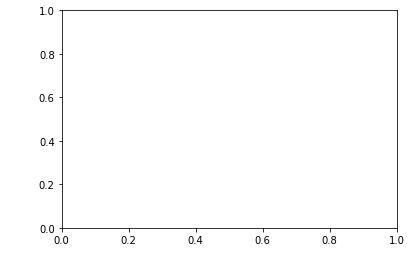

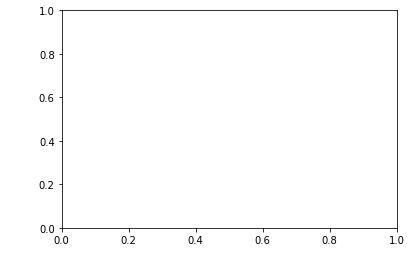

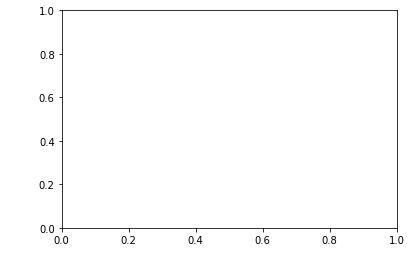

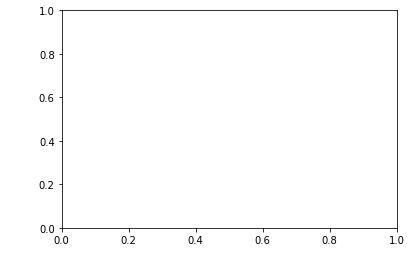

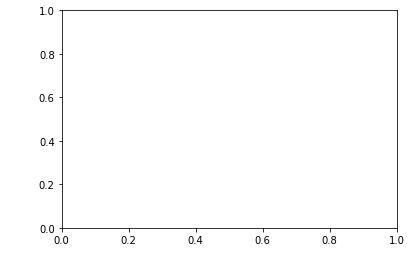

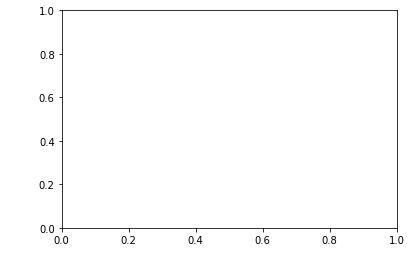

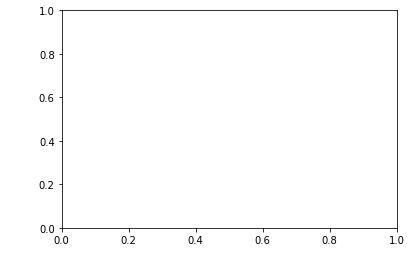

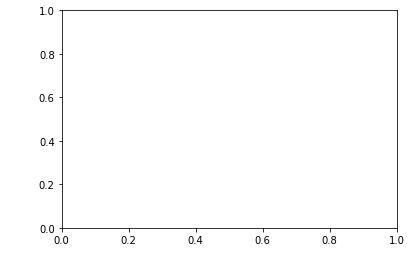

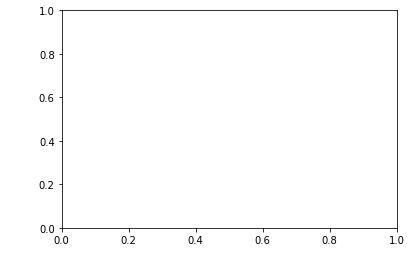

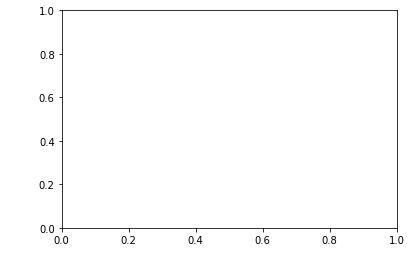

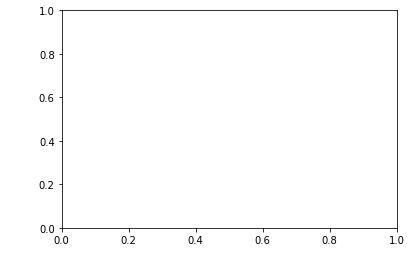

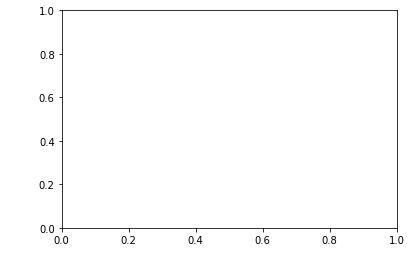

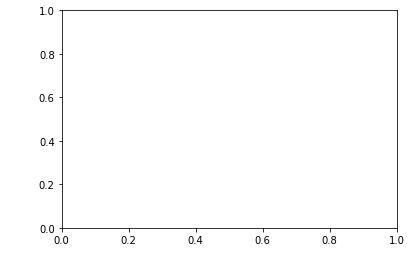

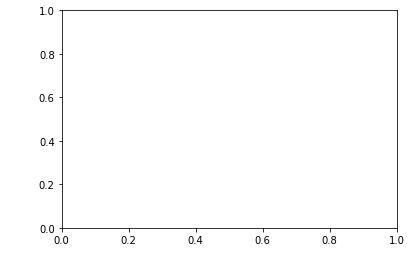

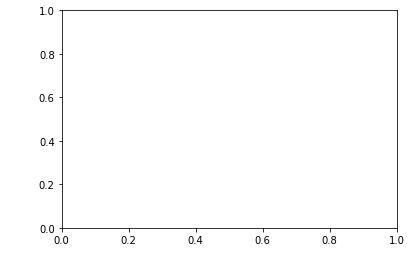

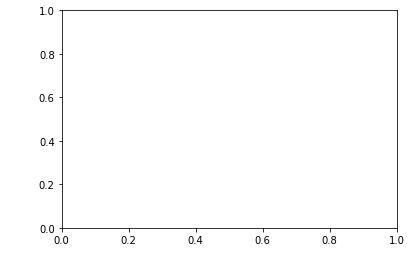

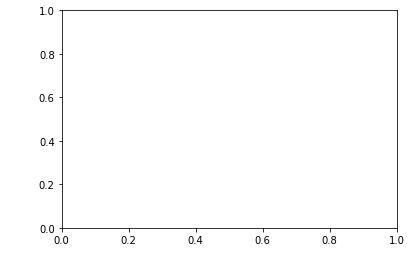

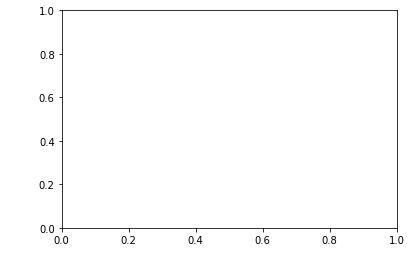

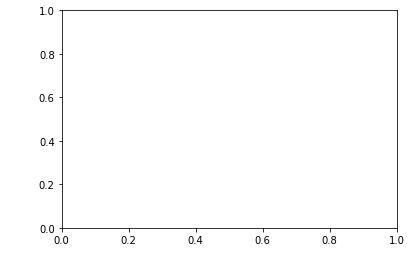

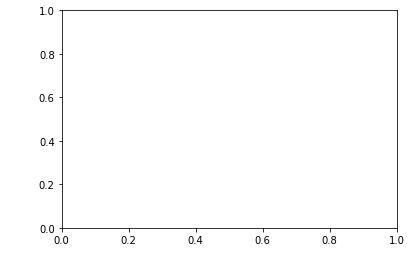

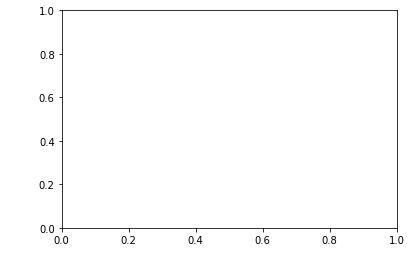

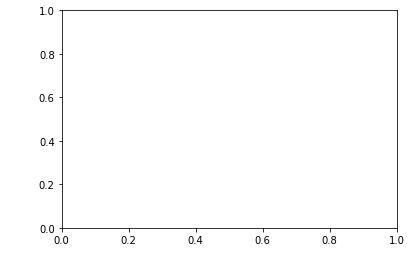

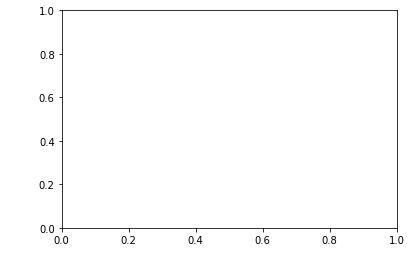

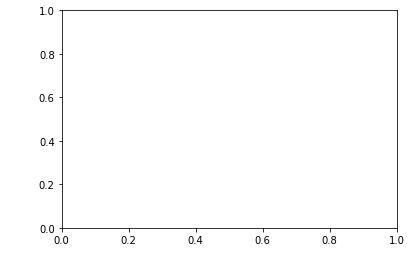

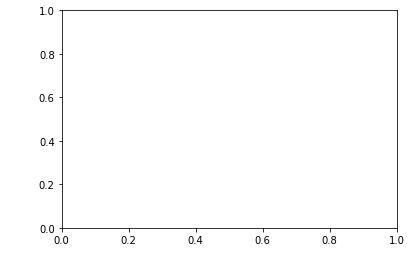

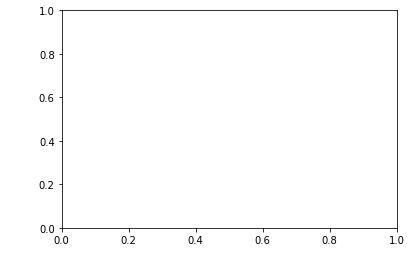

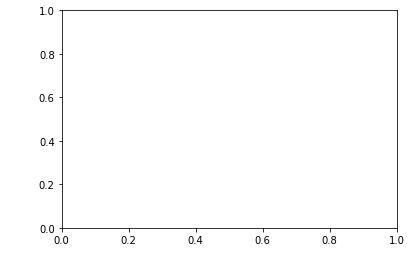

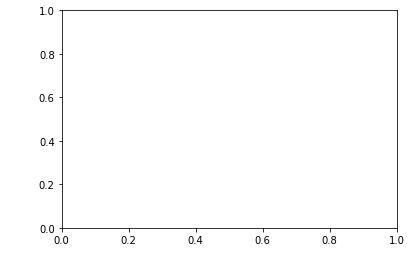

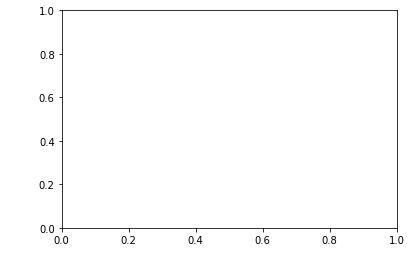

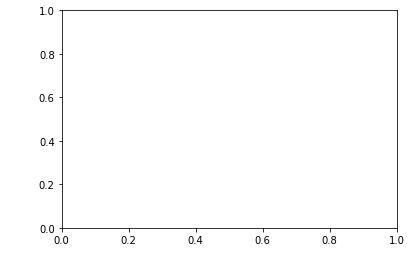

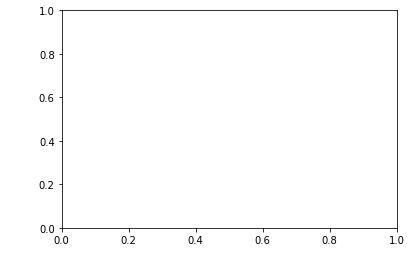

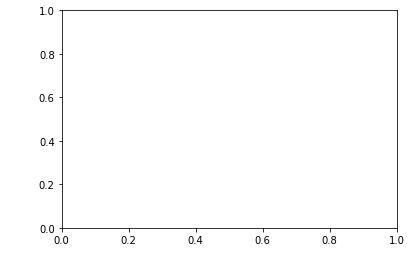

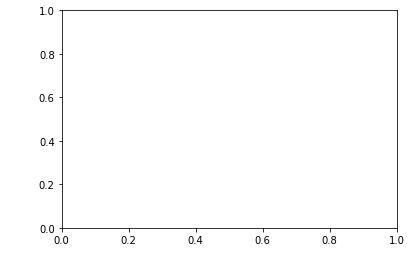

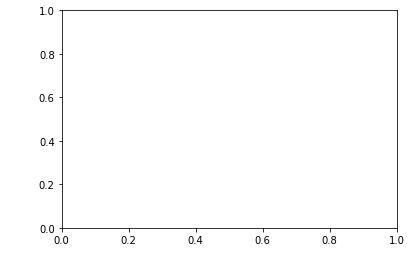

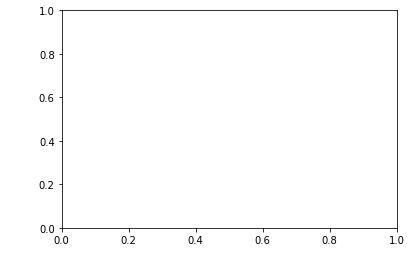

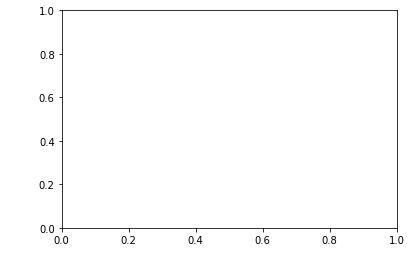

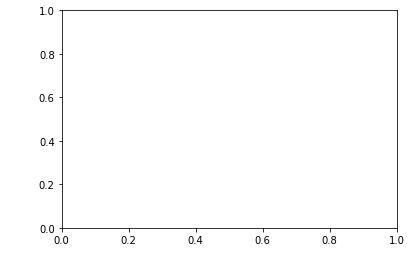

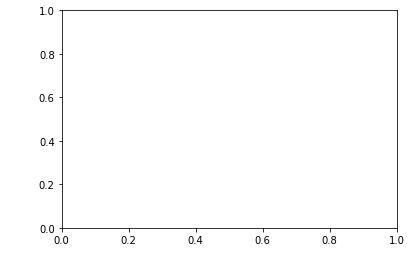

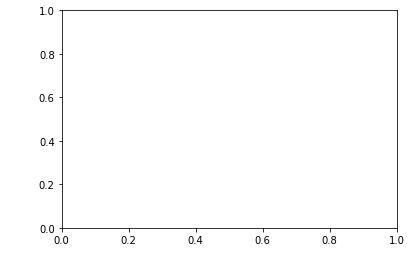

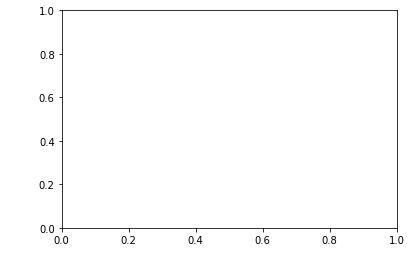

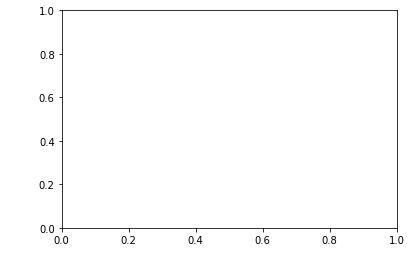

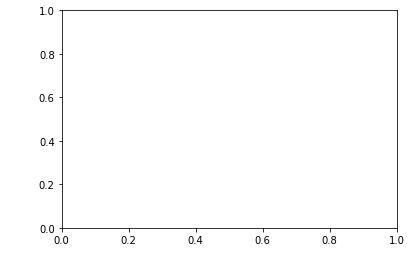

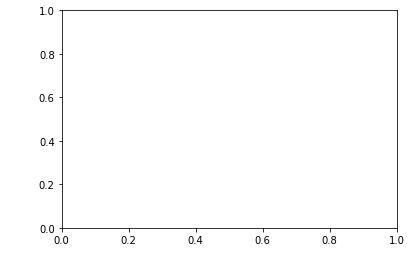

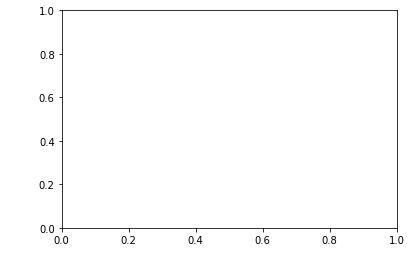

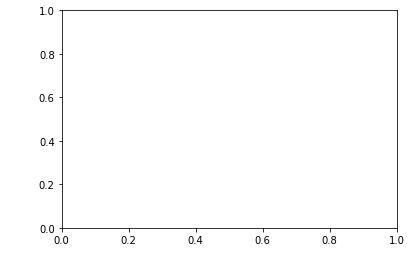

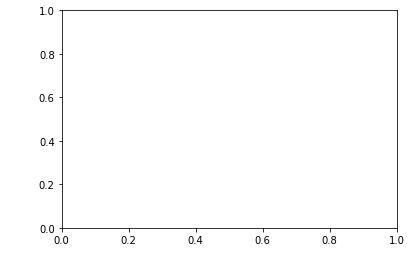

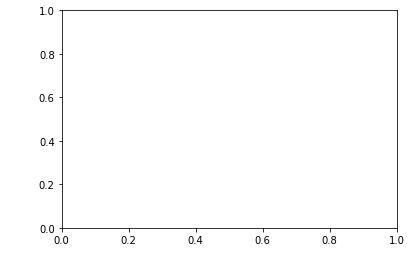

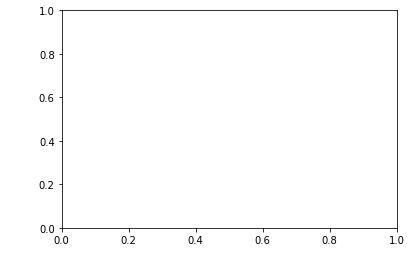

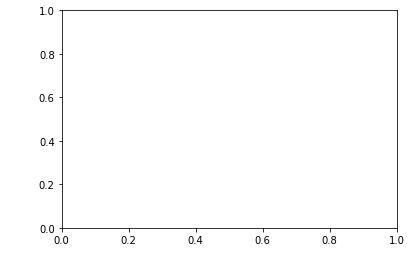

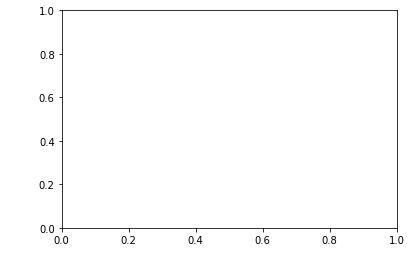

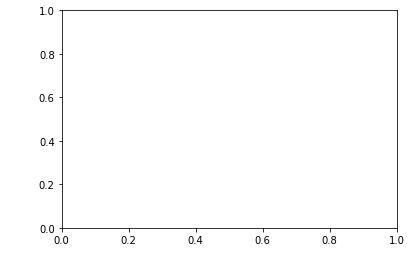

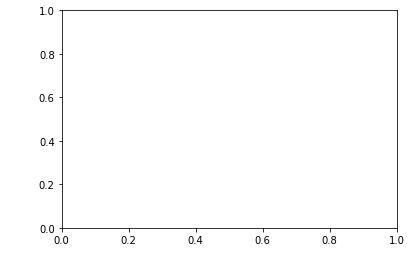

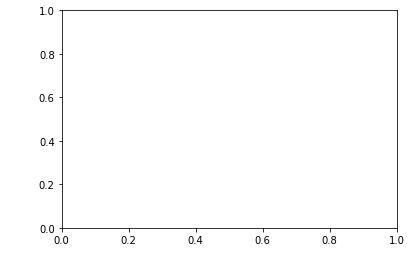

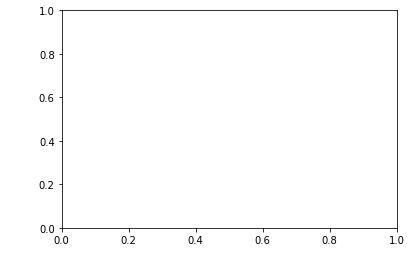

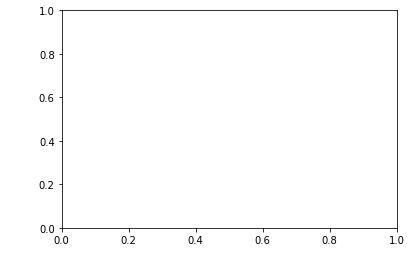

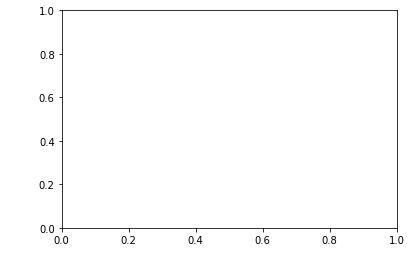

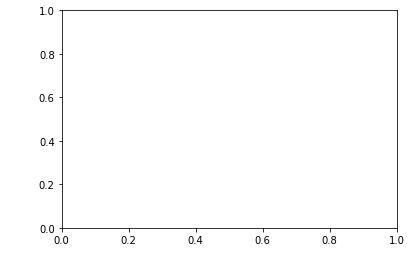

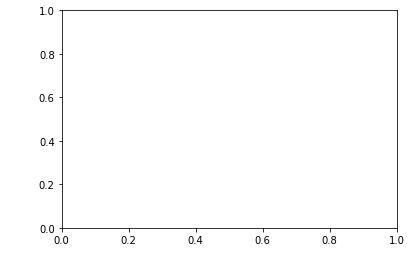

In [61]:
x3 = []
for i in range(0,len(record)-1):
    if(i>0 and i<len(record)-2):
        if(record[i]['close']>record[i-1]['close'] and record[i]['close']>record[i+1]['close']):
            x3.append(record[i]['close'])
        else
            x3.append(0)
            
            
print(x3)
plt.close()


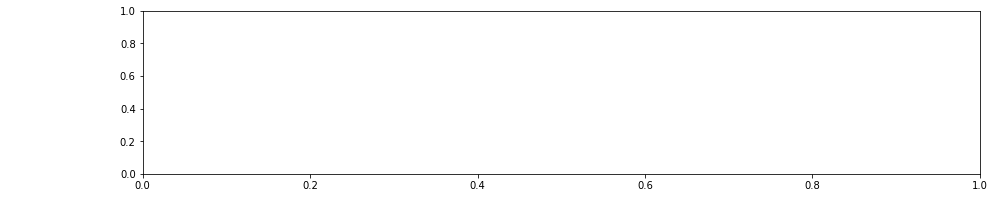

In [59]:
plt.show()

In [60]:
plt.scatter(x2,x3)#,s=5,c='red',marker='^')
#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.title("Stock Data of Titan Company")
plt.xlabel("Time")
plt.ylabel("Stock Price")

plt.figure(figsize=(5, 2))
plt.show()


ValueError: x and y must be the same size

In [32]:
upper_peak = []
t=0
flag = 'c'
difference = 100
pl = 0;



In [33]:
for i in range(0,len(record)-1):
    price = record[i]['close']
    if(i>1):
        if(record[i-1]['close']>record[i-2]['close'] and record[i-1]['close']>price):
            upper_peak.append(record[i-1]['close'])
            t+=1
    if(t>9):           
        if(price>upper_peak[t-1] and upper_peak[t-1]>upper_peak[t-2] and t>2 and flag == 'c'):
            flag = 'b'
            bought_price = price
            difference = int(upper_peak[t-1])-int(upper_peak[t-9])
        elif(flag=='b'):
            if(price - bought_price > 2*difference):
                flag = 'c';
                pl = pl+ price - bought_price
            elif(price-bought_price < -1*difference):
                flag = 'c'
                pl = pl+price - bought_price
print(pl)         
        
    
            

170.30000000000018


In [34]:
pl

170.30000000000018

In [70]:
def pl_function(a):
        upper_peak = []
        t=0
        flag = 'c'
        difference = 100
        pl = 0;

        for i in range(0,len(record)-1):
            price = record[i]['close']
            if(i>1):
                if(record[i-1]['close']>record[i-2]['close'] and record[i-1]['close']>price):
                    upper_peak.append(record[i-1]['close'])
                    t+=1
            if(t>a):           
                if(price>upper_peak[t-1] and upper_peak[t-1]>upper_peak[t-a] and t>2 and flag == 'c'):
                    flag = 'b'
                    bought_price = price
                    difference = int(upper_peak[t-1])-int(upper_peak[t-a])
                elif(flag=='b'):
                    if(price - bought_price > 2*difference):
                        flag = 'c';
                        pl = pl+ price - bought_price
                    elif(price-bought_price < -1*difference):
                        flag = 'c'
                        pl = pl+price - bought_price
        return pl

40.199999999999704
120.35000000000002
19.65000000000009
54.30000000000007
75.19999999999982
166.94999999999993
153.05000000000018
172.8499999999999
170.30000000000018
178.20000000000016
168.64999999999975
178.69999999999982
184.14999999999975
163.4999999999999
184.29999999999995
183.89999999999998
186.9499999999997
189.94999999999982
177.5999999999998
170.04999999999973
131.39999999999998
137.9000000000001
148.4999999999999
150.75
150.75
150.44999999999993
141.20000000000016
132.10000000000014
114.55000000000007
138.85000000000002
141.85000000000014
108.5
138.5
134.0000000000001
147.6500000000001
140.79999999999984
141.64999999999986
146.6500000000001
137.5999999999999
142.04999999999984
141.10000000000014
134.30000000000018
131.45000000000005
137.5999999999999
140.69999999999993
165.4499999999997
130.14999999999975
139.35000000000002
154.95000000000016
160.44999999999982
164.55000000000007
145.29999999999973
120.34999999999991
124.89999999999975
120.45000000000005
124.94999999999993
1

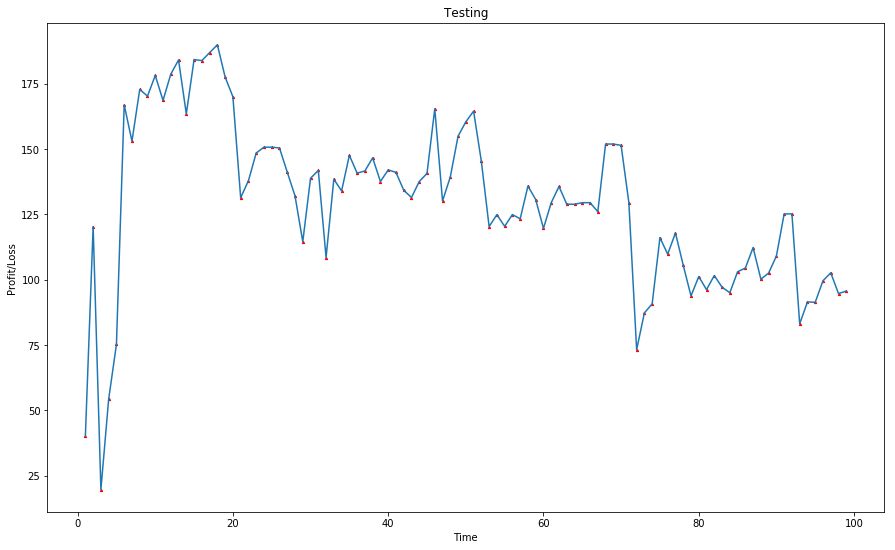

In [75]:
new_pl = []
x_axis = []
for i in range(1,100):
    new_pl.append(pl_function(i))
    x_axis.append(i)
    print(pl_function(i))
plt.scatter(x_axis,new_pl,s=5,c='red',marker='^')
plt.plot(x_axis,new_pl)
#plt.xlim(0,1000)
#plt.ylim(0,1000)
plt.title("Testing")
plt.xlabel("Time")
plt.ylabel("Profit/Loss")
plt.show()
plt.figure(figsize=(15, 9))

In [72]:
max(new_pl)

120.35000000000002

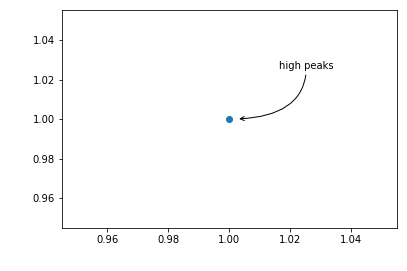

In [65]:
plt.plot([1], [1], "o")
ann = plt.annotate("high peaks",
                   xy=(1, 1), xycoords='data',
                   xytext=(50, 50), textcoords='offset points',
                   arrowprops=dict(arrowstyle="->", shrinkB=10,
                                   connectionstyle="angle3"),
                   size=10
                   )
ann1 = plt.annotate("high peaks",
                   xy=(1.5, 1), xycoords='data',
                   xytext=(50, 50), textcoords='offset points',
                   arrowprops=dict(arrowstyle="->", shrinkB=10,
                                   connectionstyle="angle3"),
                   size=10
                   )
plt.show()

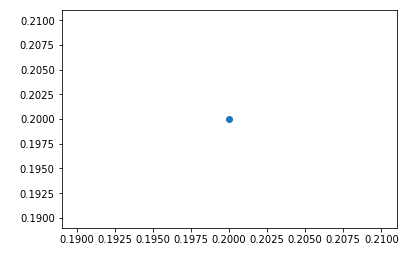

In [43]:
plt.show()